


<b>Задание</b>
1. Познакомьтесь с данными.
2. Добавьте информацию из датасета region.csv.
3. Восстановите пропуски в столбце kitchen_area. 
4. Исследуйте рынок недвижимости в РФ за представленный период. Величина исследования - цена за м2. Обработайте аномалии.
5. Когда выгодно покупать/продавать объект недвижимости? 
6. Определите от каких признаков зависит стоимость объекта недвижимости. Найдите скрытые закономерности.
7. Выдвинете и проверьте собственную гипотезу статистическими методами.
8. Создайте модель прогноза цены объекта недвижимости.



<a id='задачи'></a>

<b><h2>Навигация:</h2></b>

[1. Познакомьтесь с данными.](#1-знакомство)
   - [1.1 Приведем данные к нужному типу](#11)
   - [1.2 Очистим данные от дубликатов](#12)
   
[2. Добавьте информацию из датасета region.csv](#2-добавить-инфу)
   
[3. Восстановите пропуски в столбце kitchen_area.](#3-восстановить-пропуски)

[3.0 Восстановите пропуски в столбце kitchen_area (после очистки данных).](#30-восстановить-пропуски)

[4. Исследуйте рынок недвижимости в РФ за представленный период. Величина исследования - цена за м2. Обработайте аномалии.](#4-исследование-рынка)

[5. Когда выгодно покупать/продавать объект недвижимости? ](#5-когда-выгодно)

[6. Определите от каких признаков зависит стоимость объекта недвижимости. Найдите скрытые закономерности.](#6-признаки)

[7. Выдвинете и проверьте собственную гипотезу статистическими методами.](#7-своя-гипотеза)

[8. Создайте модель прогноза цены объекта недвижимости.](#8-модель-прогноза)

<a id='1-знакомство'></a>
<div style="background-color: lavender; padding: 15px; border-radius: 5px;">
<h1 style="color: black;">1. Познакомьтесь с данными. </h1>
</div>

[Вернуться к содержанию](#задачи)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats as st
import seaborn as sns

In [2]:
realty = pd.read_csv('realty_18_21.csv')

In [3]:
realty.head(3)

price        date  region  building_type  level  levels  rooms  area  \
0  6050000  2018-02-19    2661              1      8      10      3  82.6   
1  8650000  2018-02-27      81              3      5      24      2  69.1   
2  4000000  2018-02-28    2871              1      5       9      3  66.0   

   kitchen_area  object_type  
0          10.8            1  
1          12.0            1  
2          10.0            1

In [4]:
# посмотрим типы данных
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   region         int64  
 3   building_type  int64  
 4   level          int64  
 5   levels         int64  
 6   rooms          int64  
 7   area           float64
 8   kitchen_area   float64
 9   object_type    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 417.9+ MB


Нужно поменять тип данных столбца "date", остальные кажутся верными

In [5]:
# посмотрим размер нашего датафрейма
realty.shape

(5477006, 10)

In [6]:
# проверим, есть ли лишние значения - те, которые не указаны в описании к датафрейму
realty['building_type'].unique() # все верно

array([1, 3, 4, 2, 5, 0], dtype=int64)

In [7]:
realty['levels'].unique() 

array([10, 24,  9, 16, 14,  5, 25, 15, 17,  8,  2,  3, 18,  4, 22, 12, 20,
        7, 19,  6, 23, 27,  1, 21, 11, 28, 13, 36, 26, 33, 34, 30, 29, 35,
       32, 31, 37, 38, 39], dtype=int64)

In [8]:
realty['region'].nunique() 

84

In [9]:
# проверим, есть ли лишние значения - те, которые не указаны в описании к датафрейму
realty['level'].unique() # все верно

array([ 8,  5, 12, 13,  4,  1,  2,  9, 10, 25,  7,  6, 16, 17, 14, 11,  3,
       18, 15, 23, 21, 20, 22, 19, 28, 24, 26, 32, 30, 27, 31, 29, 34, 33,
       35, 37, 36, 39, 38], dtype=int64)

In [10]:
realty['rooms'].unique() # нашли что-то странное, в пункте 4 обработаем

array([ 3,  2,  1,  4, -1,  5,  7,  6,  8,  9, -2, 10], dtype=int64)

In [11]:
realty['object_type'].unique() # все верно

array([ 1, 11], dtype=int64)

<a id='11'></a>
<h2 style="color: black;">1.1. Приведем данные к нужному типу </h2>
</div>

[Вернуться к содержанию](#задачи)

In [12]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   region         int64  
 3   building_type  int64  
 4   level          int64  
 5   levels         int64  
 6   rooms          int64  
 7   area           float64
 8   kitchen_area   float64
 9   object_type    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 417.9+ MB


Не понравилось обозначение object_type - 1 - Вторичный рынок; 11 - Первичный рынок; хочу первичный рынок обозначать 1 (наличие признака "новое жилье" и вторичный рынок 0 "не новое жилье" (удобнее для работы с данными в дальнейшем)

In [13]:
# столбец "date" к типу datetime, столбец "building_type" переделаем
realty['date'] = pd.to_datetime(realty['date'], errors='coerce')  # Преобразуем дату
realty['object_type'] = (realty['object_type'] == 11).astype(int)  # 1 для первичного рынка, 0 для вторичного

In [14]:
realty.sample(3)

price       date  region  building_type  level  levels  rooms  \
4187142  11062170 2020-07-30       3              2     21      23      2   
4872506   3070000 2020-12-19   10160              3      1       5      2   
172867    1650000 2018-09-29    2843              2      2       4      1   

         area  kitchen_area  object_type  
4187142  56.7          19.0            1  
4872506  52.0           7.0            0  
172867   46.0          20.0            0

In [15]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   price          int64         
 1   date           datetime64[ns]
 2   region         int64         
 3   building_type  int64         
 4   level          int64         
 5   levels         int64         
 6   rooms          int64         
 7   area           float64       
 8   kitchen_area   float64       
 9   object_type    int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(6)
memory usage: 397.0 MB


Посмотрим период за который нам дана информация

In [16]:
realty['date'].max() - realty['date'].min() # данные за три с небольшим года

Timedelta('1167 days 00:00:00')

In [17]:
print(f"Последняя запись датируется {realty['date'].max()}, первая запись датируется {realty['date'].min()}")

Последняя запись датируется 2021-05-01 00:00:00, первая запись датируется 2018-02-19 00:00:00


In [18]:
realty.isna().sum() 

price                 0
date                  0
region                0
building_type         0
level                 0
levels                0
rooms                 0
area                  0
kitchen_area     253711
object_type           0
dtype: int64

Видим много пропусков в столбце "kitchen_area", рассмотрим и заполним их в пункте 3

<a id='12'></a>
<h2 style="color: black;">1.2. Очистим данные от дубликатов</h2>
</div>

[Вернуться к содержанию](#задачи)

In [19]:
# считаем и удаляем явные дубликаты
duplicates_count = realty.duplicated().sum()

print(f"Количество дубликатов в данных realty: {duplicates_count}")

Количество дубликатов в данных realty: 235655


In [20]:
# кол-во дубликатов не превышает 4,4 %, удаляем
realty = realty.drop_duplicates()

In [21]:
# теперь их нет
duplicates_count = realty.duplicated().sum()
duplicates_count

0

<div style="background-color: AliceBlue; padding: 15px; border-radius: 5px;">
<h2 style="color: black;">Вывод:</h2>
    
В столбце "rooms" обнаружили отрицательные значения. Обработаем их далее в пункте 4. В столбце "date" поменяли тип данных на datetime, в столбце 'object_type'немного поменяли наименования, как мне кажется, так удобнее.<br><br>
Дубликаты ( <4,4% ) удалены. Скорее всего не может быть двух похожих выставленных на продажу квартир (соседей), у которых одинаковы и площадь и цена и т.д. <br><br>
Обнаружены пропуски в столбце "kitchen_area" (235655 штук). Будут рассотрены в 3 пункте.<br><br>
Остальные аномалии будут рассмотрены в пункте 4.
</div>

<a id='2-добавить-инфу'></a>
<div style="background-color: lavender; padding: 15px; border-radius: 5px;">
<h1 style="color: black;">2. Добавьте информацию из датасета region.csv </h1>
</div>

[Вернуться к содержанию](#задачи)

In [22]:
region = pd.read_csv('region.csv')

In [23]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   code      83 non-null     object
 1   reg_name  83 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [24]:
region.sample(10)

code                   reg_name
73   4189        Костромская область
19   1010      Удмуртская Республика
30   9654      Новосибирская область
69   5703         Курганская область
62   5736       Новгородская область
20   7793          Псковская область
8    2922       Республика Татарстан
81   1901        Сахалинская область
82  61888  Ненецкий автономный округ
74   2814          Орловская область

### Посмотрим типы данных

In [25]:
# Проверка типов данных
print(realty['region'].dtype)
print(region['code'].dtype)

int64
object


In [26]:
print(f"Количество уникальных регионов в датафрейме с названиями регионов равно {realty['region'].nunique()}, а количество уникальных кодов в датафрейме с кодами регионов равно {region['code'].nunique()}")

print('Это нехорошо')

Количество уникальных регионов в датафрейме с названиями регионов равно 84, а количество уникальных кодов в датафрейме с кодами регионов равно 83
Это нехорошо


### Проверим уникальные значения

In [27]:
realty['region'].unique()

array([ 2661,    81,  2871,  2843,     3,  3106,  2922,  2900,  2722,
        6171,  3230,  4417,  5282,  5368,  3446,  5520,  6817,  9579,
        2604,  1010,  9648,  7793, 13919,  2860,  3019,  4982,  5241,
        3870,  3991,  2359,  9654,  2072,  8090,  4007, 11171, 10160,
        7873,  2594,  8509, 11416, 11991,  2880,  5178, 13913,  6309,
        5952,  6543,  2328,  5993,  2484, 13098,  4240,  5789,  1901,
       14880, 10201,  1491,  2885,  5794,  2528,  4374,  4695,  5143,
        6937,  2806, 14368,  5736,  7121,  4086,   821, 10582,  7896,
        8640,  5703,  8894,  4249,  3153,  4189,  2814,  7929, 16705,
          69,  4963, 61888], dtype=int64)

In [28]:
region['code'].unique() # todo: int not str

array(['2661', '3446', '3', '81', '2843', '2871', '3230', '3106', '2922',
       '2900', '2722', '6171', '4417', '5282', '5368', '5520', '6817',
       '9579', '2604', '1010', '7793', '13919', '2860', '3019', '4982',
       '9648', '5241', '3870', '3991', '2359', '9654', '2072', '8090',
       '4007', '11171', '10160', '7873, 6937', '2594', '8509', '11416',
       '11991', '5178', '13913', '6309', '5952', '6543', '2880', '5993',
       '2484', '4240', '5789', '14880', '1491', '2885', '5794', '2528',
       '4374', '4695', '2328', '5143', '2806', '14368', '5736', '7121',
       '4086', '821', '10582', '7896', '8640', '5703', '10201', '4249',
       '3153', '4189', '2814', '13098', '8894', '7929', '16705', '69',
       '4963', '1901', '61888'], dtype=object)

### Нашли странное значение " '7873, 6937' "

Нашли странное значение " '7873, 6937' ", надо эти коды разделить, и тогда их количество как раз и будет 84. Но так как мы не значем название региона для каждого из этих кодов, то сделать этого мы не можем

In [29]:
region[region['code']== '7873, 6937']

code         reg_name
36  7873, 6937  Республика Крым

In [30]:
region[region['reg_name']== 'Республика Крым']

code         reg_name
36  7873, 6937  Республика Крым

Проблема заключается в том, что для региона "Республика Крым" указаны два кода: 7873 и 6937

Посмотрим, встречаются ли и сколько раз данные коды регионов в нашем датафрейме "realty"

In [31]:
realty.loc[realty['region'] == 6937].shape[0]

4700

In [32]:
realty.loc[realty['region'] == 7873].shape[0]

2181

Код 7873: Имеет 2181 строку в realty.
Код 6937: Имеет 4700 строк в realty.

Скорее всего, код 6937 является более распространенным и, возможно, более корректным для обозначения "Республики Крым".
В нашем датафрейме присутствуют оба этих кода.
Как мне кажется, можно их совместить и присвоить им один код, это будет Республика Крым. При этом мы решим проблему разницы кол-ва кодов в обоих датафреймах : их станет 83.

Возьмем более распространенный код 6937

In [33]:
# Предположим, мы решили, что код 6937 является основным для "Республики Крым"
# заменим значения, явно указав, что сравниваем целые числа
realty.loc[realty['region'] == 7873, 'region'] = 6937

In [34]:
realty['region'].nunique()

83

In [35]:
# теперь заменим в этом датафрейме
region.loc[region['reg_name'] == 'Республика Крым', 'code'] = '6937'

In [36]:
region['code'].nunique()

83

Данные строкового типа меняем

In [37]:
# преобразование типа данных
region['code'] = region['code'].astype(int)
print(region['code'].dtype)

int32


In [38]:
# так как название столбца в одном из dataframe отличается, переименуем его
realty = realty.rename(columns={'region': 'code'})

In [39]:
# проведем merge данных по столбцу 'code'
# используем 'left' join, т.е. мы сохраним все строки из realty и добавим информацию из region
realty = pd.merge(realty, region, on='code', how='left')

In [40]:
# проверяем 
realty.sample(3)

price       date  code  building_type  level  levels  rooms  area  \
415893    8206640 2018-11-08    81              2     15      25      2  67.6   
4389702  10460000 2020-10-27  2661              2      2       7      2  62.5   
2947820   1680000 2020-01-21  6171              3      3       5      1  32.2   

         kitchen_area  object_type              reg_name  
415893           11.4            1    Московская область  
4389702          32.1            0       Санкт-Петербург  
2947820           6.0            0  Свердловская область

In [41]:
# посчитаем, есть ли у нас "потерянные" строки в столбце 'reg_name'
print(f"Количество незаполненных строк в столбце 'reg_name':{realty['reg_name'].isnull().sum()}")

Количество незаполненных строк в столбце 'reg_name':0


Таких нет, это здорово!

<div style="background-color: AliceBlue; padding: 15px; border-radius: 5px;">
<h2 style="color: black;">Вывод:</h2>
    
Соединили два датафрейма по общему столбцу (столбец в одном из датафреймов переименовали)

Для этого также исправили ошибку в кодах, которые были записаны как одно строка. Это Республика Крым, для нее оценили кол-во строк в датафрейме и приняли решение их не удалять, а просто оба кода заменить на один более популярный. Также поменяли тип данных на int для возможности дальнейшего мерджа.
</div>

<a id='3-восстановить-пропуски'></a>
<div style="background-color: lavender; padding: 15px; border-radius: 5px;">
<h1 style="color: black;">3. Восстановите пропуски в столбце kitchen_area. </h1>
</div>

[Вернуться к содержанию](#задачи)

In [42]:
realty.isna().sum() 

price                 0
date                  0
code                  0
building_type         0
level                 0
levels                0
rooms                 0
area                  0
kitchen_area     252682
object_type           0
reg_name              0
dtype: int64

#### Дело в том, что логично оставить обработку пропусков в kitchen_area после выбросов, так как у нас выбросы явно искажают данные. Также после обработки таких аномалий, как площадь кухни > площадь квартиры ( ведь иначе пропуски будут заполнены искаженными значениями). В то же время заполнить пропуски нужно до того момента, когда мы перейдем к анализу данных за м^2, то есть до второй части задания №4. Поэтому я сделаю задание №3 между первой и второй частью задания №4.

<a id='4-исследование-рынка'></a>
<div style="background-color: lavender; padding: 15px; border-radius: 5px;">
<h1 style="color: black;">4. Исследуйте рынок недвижимости в РФ за представленный период. Величина исследования - цена за м2. Обработайте аномалии.</h1>
</div>

[Вернуться к содержанию](#задачи)

Сначала обработаем некоторые аномалии по количеству комнат и этажу, чтобы потом корректно работать со всем остальным

<a id='41'></a>
<h2 style="color: black;">1. Обработка аномалий </h2>
</div>

[Вернуться к содержанию](#задачи)

<div>
<h3 style="color: black;"> 4.1. Аномалии в столбце "rooms" </h3>
</div>

In [43]:
# Посмотрим на столбец rooms
realty['rooms'].unique()

array([ 3,  2,  1,  4, -1,  5,  7,  6,  8,  9, -2, 10], dtype=int64)

In [44]:
realty[realty['rooms'] < -1] # единицу не трогаем, так как это студии по описанию

price       date  code  building_type  level  levels  rooms  \
61892     24912000 2018-09-17  2843              2     22      22     -2   
87352     25500000 2018-09-18  2661              3      1       7     -2   
108577     3150000 2018-09-21  2661              2      2      17     -2   
114224     4300000 2018-09-22    81              3      3       5     -2   
138061    57000000 2018-09-26    81              3      3       3     -2   
...            ...        ...   ...            ...    ...     ...    ...   
5123051    2350000 2021-04-19  3019              4      4       5     -2   
5139731  199000000 2021-04-21  2661              3      2       3     -2   
5157679   36874000 2021-04-24  2661              3      2       4     -2   
5197163    5200000 2021-04-29    81              2      7      17     -2   
5238856   23399000 2021-05-01  2843              2     24      24     -2   

          area  kitchen_area  object_type              reg_name  
61892    415.2          40.0            1    Краснодарский край  
87352    360.0          22.0            0       Санкт-Петербург  
108577    35.0           9.0            0       Санкт-Петербург  
114224    61.0           5.6            0    Московская область  
138061   300.0          30.0            0    Московская область  
...        ...           ...          ...                   ...  
5123051    9.0          10.7            0  Чувашская Республика  
5139731    9.0          25.0            0       Санкт-Петербург  
5157679    9.0          19.7            0       Санкт-Петербург  
5197163    9.0          10.7            0    Московская область  
5238856    9.0          40.0            1    Краснодарский край  

[343 rows x 11 columns]

In [45]:
print(f"Количество аномалий (кол-во комнат отрицательно) = {realty[realty['rooms'] < -1].shape[0]}")

Количество аномалий (кол-во комнат отрицательно) = 343


In [46]:
# преобразуем только строки, где rooms == -2, так как я предполагаю, что изначально это было тире, и люди при вводе с клавиатуры
# или при копировании его не убрали
realty.loc[realty['rooms'] == -2, 'rooms'] = 2

In [47]:
# теперь посмотрим на столбец rooms
realty['rooms'].unique()

array([ 3,  2,  1,  4, -1,  5,  7,  6,  8,  9, 10], dtype=int64)

<div>
<h3 style="color: black;"> 4.2. Аномалии в столбце "level" и "levels" </h3>
</div>

[Вернуться к содержанию](#задачи)

In [48]:
# проверяем level > levels
realty[realty['level'] > realty['levels']]

price       date   code  building_type  level  levels  rooms  \
25926    1850000 2018-09-12   3870              3     17      13      1   
35443    1100000 2018-09-13   9654              3      4       1      1   
114118    700000 2018-09-22   2722              3      2       1      2   
143680   3200000 2018-09-27  11171              2      4       3      1   
157470   1050000 2018-09-28   2843              4      2       1      2   
...          ...        ...    ...            ...    ...     ...    ...   
4711055  4750000 2021-01-19   2843              4     11      10      2   
4941723  6984180 2021-03-18     81              3      4       3      2   
4941727  7164620 2021-03-18     81              3      4       3      2   
4942535  4136487 2021-03-18     81              3      4       3      1   
5110764  2370000 2021-04-15   2900              1      5       4      3   

          area  kitchen_area  object_type                  reg_name  
25926    37.00         10.00            0         Красноярский край  
35443    30.00          8.00            0     Новосибирская область  
114118   40.00         11.00            0   Республика Башкортостан  
143680   31.00         10.00            0  Республика Саха (Якутия)  
157470   54.00         10.00            0        Краснодарский край  
...        ...           ...          ...                       ...  
4711055  54.00          6.00            0        Краснодарский край  
4941723  57.80         11.68            1        Московская область  
4941727  78.84         11.68            1        Московская область  
4942535  48.40          9.01            1        Московская область  
5110764  64.00          8.00            0       Ставропольский край  

[665 rows x 11 columns]

In [49]:
# меняем значения местами, если level > levels
realty.loc[realty['level'] > realty['levels'], ['level', 'levels']] = \
    realty.loc[realty['level'] > realty['levels'], ['levels', 'level']].values

In [50]:
realty[realty['level'] > realty['levels']] # теперь все хорошо

Empty DataFrame
Columns: [price, date, code, building_type, level, levels, rooms, area, kitchen_area, object_type, reg_name]
Index: []

### Вывод:
Нашли аномалию, где этаж больше числа этажей в доме (level > levels):
Удалили 665 строк (0,01%), так как это немного и такого не может быть, а заполнить данные строки просто "придуманными" этажами мы не можем.

<div>
<h3 style="color: black;"> 4.3. Аномалии в высоте дома и материале его постройке </h3>
</div>

[Вернуться к содержанию](#задачи)

Для обработки аномалии с этажами и материалом дома (например, деревянный дом с 20 этажами) необходимо реализовать проверку и корректировку данных на основе допустимых пределов этажности для каждого типа дома.

Примерные ограничения, которыми я буду руководствоваться:

- Тип "Другое" (0): Неопределен.

- Панельный (1): До 25 этажей.

- Кирпично-монолитный (2): До 30 этажей.

- Кирпичный (3): До 12 этажей.

- Блочный (4): До 9 этажей.

- Деревянный (5): До 3 этажей.

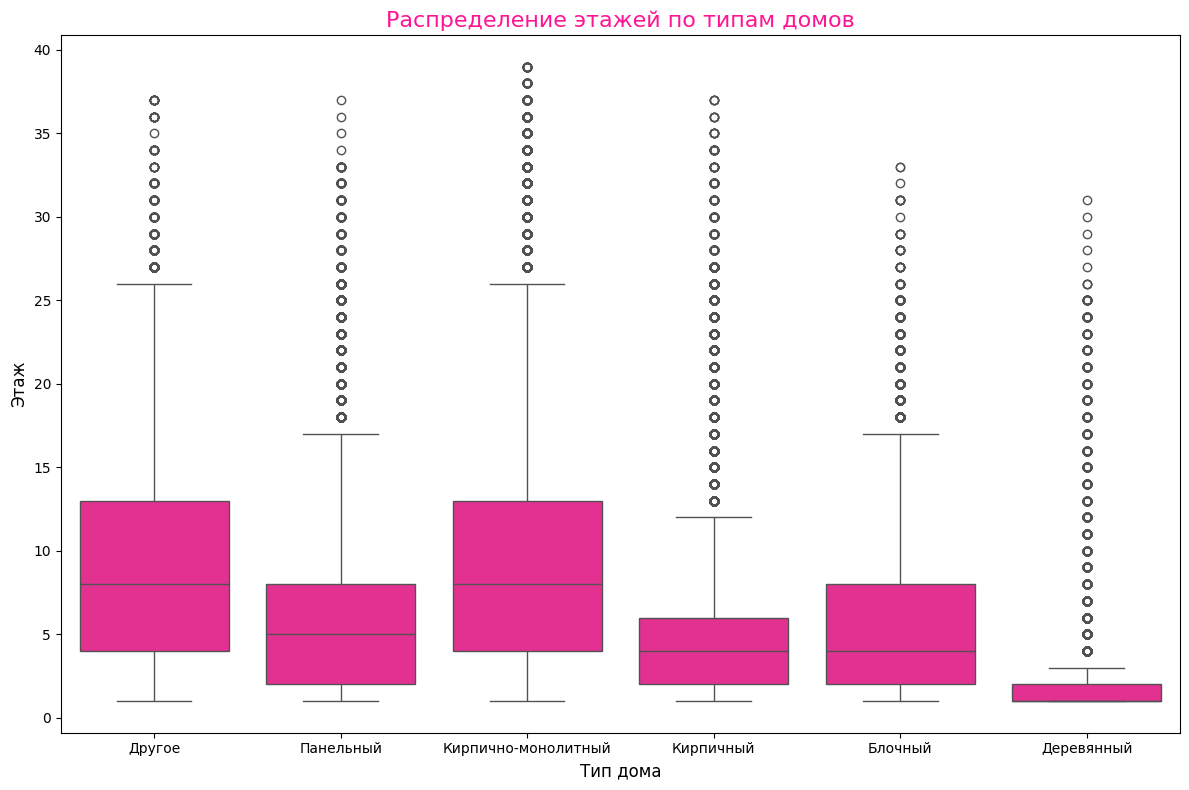

In [51]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=realty, x='building_type', y='level', color='DeepPink')
plt.title('Распределение этажей по типам домов', fontsize=16, color='DeepPink')
plt.xlabel('Тип дома', fontsize=12)
plt.ylabel('Этаж', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=[
    'Другое',
    'Панельный',
    'Кирпично-монолитный',
    'Кирпичный',
    'Блочный',
    'Деревянный'
])
plt.tight_layout()
plt.show()

Видим много странностей, например деревянные дома около 30-ти этажей

In [52]:
# словарь с максимальными этажами для каждого типа дома
max_floors = {
    0: None,   # Неограниченно
    1: 25,     # Панельный
    2: 30,     # Кирпично-монолитный
    3: 12,     # Кирпичный
    4: 9,      # Блочный
    5: 3       # Деревянный
}

In [53]:
# найдем аномалии: этаж больше, чем он может быть
anomalies = realty[
    (realty['building_type'] != 0) &  # Исключаем тип "Другое"
    (realty['levels'] > realty['building_type'].map(max_floors))  # Проверяем ограничения
]

anomalies

price       date  code  building_type  level  levels  rooms  \
1         8650000 2018-02-27    81              3      5      24      2   
3         1850000 2018-03-01  2843              4     12      16      2   
4         5450000 2018-03-01    81              3     13      14      2   
37        3160000 2018-04-11  5282              3     13      16      2   
42        4400000 2018-04-14    81              3     11      14      2   
...           ...        ...   ...            ...    ...     ...    ...   
5241319   7504290 2021-05-01     3              2      2      32     -1   
5241333  15720696 2021-05-01     3              2     33      33      3   
5241341   6400000 2021-05-01    81              3      4      17      3   
5241347  12503160 2021-05-01     3              2     17      32      2   
5241349  11831910 2021-05-01     3              1      8      33      2   

          area  kitchen_area  object_type             reg_name  
1        69.10         12.00            0   Московская область  
3        38.00          5.00            1   Краснодарский край  
4        60.00         10.00            0   Московская область  
37       56.00         11.00            1  Челябинская область  
42       54.00           NaN            0   Московская область  
...        ...           ...          ...                  ...  
5241319  19.90          5.80            1               Москва  
5241333  78.84          8.78            1               Москва  
5241341  82.00         10.60            0   Московская область  
5241347  45.90          6.60            1               Москва  
5241349  52.10         18.90            1               Москва  

[506879 rows x 11 columns]

#### 507 тысяч довольно много. Попробуем посмотреть аномалии по каждому типу по отдельности

In [54]:
# функция для нахождения аномалий по каждому типу дома
def analyze_anomalies_by_type(df, building_type, max_floor):
    filtered_df = df[df['building_type'] == building_type]
    # ищем аномалии
    if max_floor is not None:
        anomalies = filtered_df[filtered_df['levels'] > max_floor]
        print(f"Тип дома: {building_type} | Аномалий: {len(anomalies)}")
        return anomalies
    else:
        print(f"Тип дома: {building_type} | Ограничений нет.")
        return pd.DataFrame()  # Пустой DataFrame, если ограничений нет

In [55]:
# анализируем аномалии по каждому типу дома
all_anomalies = []
for b_type, max_floor in max_floors.items():
    anomalies = analyze_anomalies_by_type(realty, b_type, max_floor)
    all_anomalies.append(anomalies)

# объединим все аномалии в один датафрейм
all_anomalies_df = pd.concat(all_anomalies, ignore_index=True)

print(f"Общее количество аномалий: {all_anomalies_df.shape[0]}")

Тип дома: 0 | Ограничений нет.
Тип дома: 1 | Аномалий: 5194
Тип дома: 2 | Аномалий: 32766
Тип дома: 3 | Аномалий: 386900
Тип дома: 4 | Аномалий: 79934
Тип дома: 5 | Аномалий: 2085
Общее количество аномалий: 506879


Как мы можем видеть, меньше всего аномалий у тех типов домов, которые панельные или сделаны из дерева. Их можем удалить, так как не понятно, можно ли их чем-то заменить и как. Больше всего аномалий у домой с тпиом кирпичный (386 900) и блочный (79 934), можно предположить, что эти дома также кирпично-монолитные, но при парсинге данных с сайта или при вводе данных эта информация не сохранилась/житель дома при выставлении объявления на сайт сам этого не учел.

In [56]:
# удалим аномалии для типа 5 (деревянные)
realty = realty[
    ~(
        ((realty['building_type'] == 5) & (realty['levels'] > 3))    # деревянные дома
    )
]

In [57]:
print(f"После удаления аномалий для панельных и деревянных домов: {realty.shape[0]} строк")

После удаления аномалий для панельных и деревянных домов: 5239266 строк


In [58]:
# меняем тип дома для кирпичных домов (3) с этажностью > 12
realty.loc[
    (realty['building_type'] == 3) & (realty['levels'] > 12), 
    'building_type'
] = 2  # меняем на кирпично-монолитный

In [59]:
# заново анализируем аномалии по каждому типу дома
all_anomalies = []
for b_type, max_floor in max_floors.items():
    anomalies = analyze_anomalies_by_type(realty, b_type, max_floor)
    all_anomalies.append(anomalies)

# объединим все аномалии в один датафрейм
all_anomalies_df = pd.concat(all_anomalies, ignore_index=True)

print(f"Общее количество аномалий: {all_anomalies_df.shape[0]}")

Тип дома: 0 | Ограничений нет.
Тип дома: 1 | Аномалий: 5194
Тип дома: 2 | Аномалий: 33981
Тип дома: 3 | Аномалий: 0
Тип дома: 4 | Аномалий: 79934
Тип дома: 5 | Аномалий: 0
Общее количество аномалий: 119109


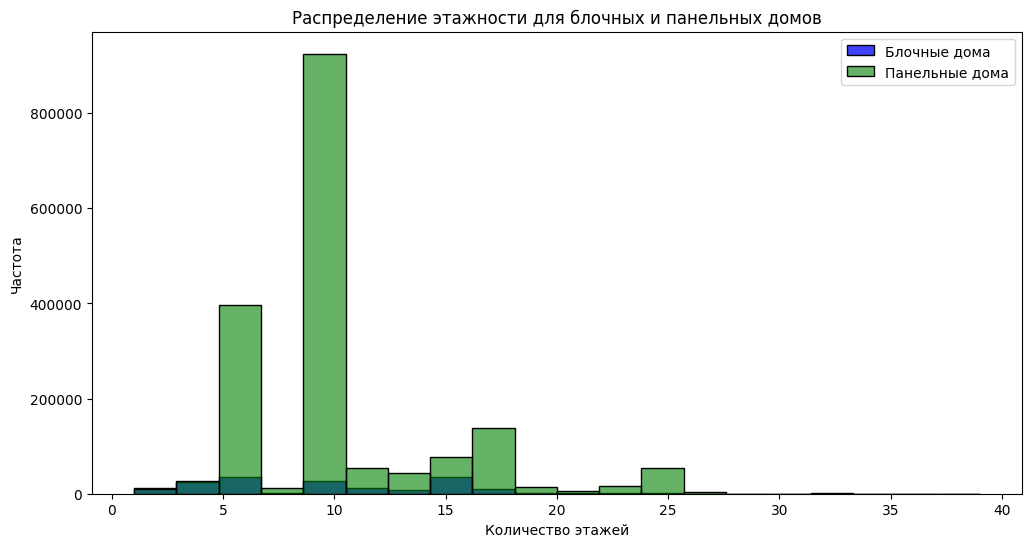

In [60]:
# построим гистограммы для блочных и панельных домов до обработки
plt.figure(figsize=(12, 6))
sns.histplot(realty[realty['building_type'] == 4]['levels'], bins=20, color='blue', label='Блочные дома')
sns.histplot(realty[realty['building_type'] == 1]['levels'], bins=20, color='green', label='Панельные дома', alpha=0.6)
plt.title("Распределение этажности для блочных и панельных домов")
plt.xlabel("Количество этажей")
plt.ylabel("Частота")
plt.legend()
plt.show()

Поискала информацию в интернете, можно ли спутать блочный и панельный дом.
Оказалось, что такое бывает, особенно в данных:
- Если этажность дома превышает 9, это может быть панельный дом, но записан как блочный.
- Для старых зданий, построенных до 1990-х годов, ошибки при классификации встречаются часто (видимо в самих документах).

Поэтому блочные дома выше 9 этажей чисто теоретически можно заменить на панельные дома. Но я возьму только вторичное жилье, так как первиное спутать явно не могли и построены они недавно.

In [61]:
# отфильтруем только блочные дома (building_type == 4) выше 9 этажей и вторичку (object_type == 0)
realty.loc[
    (realty['building_type'] == 4) & (realty['levels'] > 9) & (realty['object_type'] == 0),
    'building_type'
] = 1  # Заменяем на панельные дома (building_type = 1)

In [62]:
# посмотрим количество оставшихся блочных домов выше 9 этажей
remaining_anomalies = realty[
    (realty['building_type'] == 4) & (realty['levels'] > 9)
]
print(f"Осталось аномалий в блочных домах: {remaining_anomalies.shape[0]}")

Осталось аномалий в блочных домах: 15393


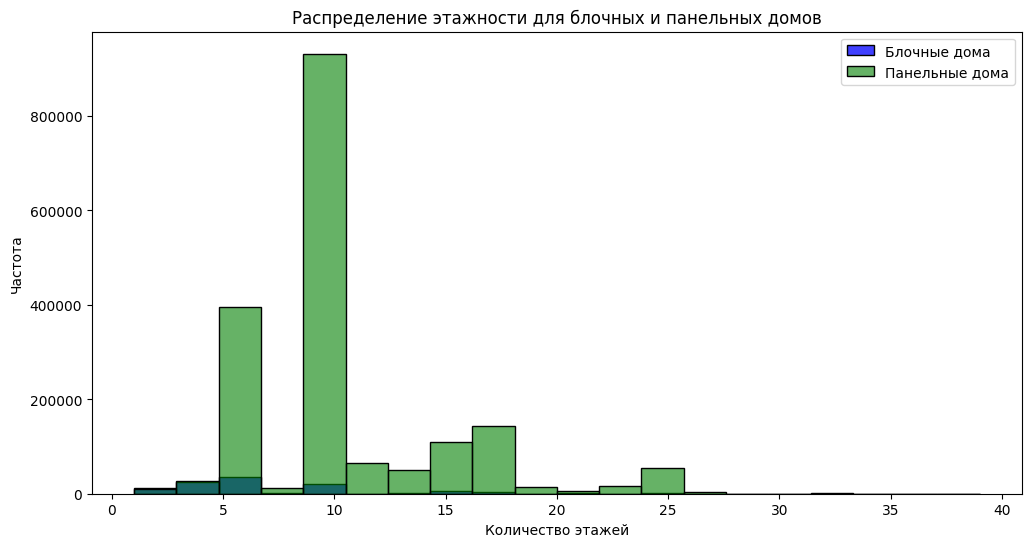

In [63]:
# Построим гистограммы для блочных и панельных домов
plt.figure(figsize=(12, 6))
sns.histplot(realty[realty['building_type'] == 4]['levels'], bins=20, color='blue', label='Блочные дома')
sns.histplot(realty[realty['building_type'] == 1]['levels'], bins=20, color='green', label='Панельные дома', alpha=0.6)
plt.title("Распределение этажности для блочных и панельных домов")
plt.xlabel("Количество этажей")
plt.ylabel("Частота")
plt.legend()
plt.show()

In [64]:
# теперь можем удалить оставшиеся аномалии для типов домов, которые не удалось исправить
realty = realty[
    ~(
        (realty['building_type'] == 3) & (realty['levels'] > 12) | # оставшиеся кирпичные дома
        ((realty['building_type'] == 1) & (realty['levels'] > 25)) |  # панельные дома
        (realty['building_type'] == 4) & (realty['levels'] > 9)    # блочные дома
        
    )
]
print(f"После удаления оставшихся аномалий: {realty.shape[0]} строк")

После удаления оставшихся аномалий: 5218388 строк


In [65]:
# заново анализируем аномалии по каждому типу дома
all_anomalies = []
for b_type, max_floor in max_floors.items():
    anomalies = analyze_anomalies_by_type(realty, b_type, max_floor)
    all_anomalies.append(anomalies)

# объединим все аномалии в один датафрейм
all_anomalies_df = pd.concat(all_anomalies, ignore_index=True)

print(f"Общее количество аномалий: {all_anomalies_df.shape[0]}")

Тип дома: 0 | Ограничений нет.
Тип дома: 1 | Аномалий: 0
Тип дома: 2 | Аномалий: 33981
Тип дома: 3 | Аномалий: 0
Тип дома: 4 | Аномалий: 0
Тип дома: 5 | Аномалий: 0
Общее количество аномалий: 33981


Остались аномалии только в типе 2 (Кирпично-монолитный)

Оказывается, в редких случаях кирпично-монолитные технологии позволяют строить здания до 50 этажей.
Однако такие дома чаще встречаются в крупных городах (например, Москва, Санкт-Петербург) и относятся к элитному или бизнес-классу.

Для реализации проверки этажности в зависимости от города мы можем создать список крупных городов, таких как Москва и Санкт-Петербург, и использовать это условие для фильтрации данных. Если дом находится в крупном городе, допускаем этажность до 50 этажей. В остальных случаях удаляем записи с этажностью выше 30 этажей.

In [66]:
# список крупных городов
major_cities = ['Москва', 'Санкт-Петербург']

# установим максимальную этажность для крупных и других городов
max_height_major = 50  # max для крупных городов
max_height_other = 30  # max для остальных

In [67]:
# фильтруем аномалии
monolithic_anomalies = realty[
    (realty['building_type'] == 2) & (  # кирпично-монолитные дома
    ((realty['reg_name'].isin(major_cities)) & (realty['levels'] > max_height_major)) |  
    (~realty['reg_name'].isin(major_cities) & (realty['levels'] > max_height_other))    
)]

In [68]:
print(f"Количество аномалий в кирпично-монолитных домах: {monolithic_anomalies.shape[0]}")

Количество аномалий в кирпично-монолитных домах: 9354


In [69]:
# теперь удалим аномалии
realty = realty[
    ~(
        (realty['building_type'] == 2) & (  # Кирпично-монолитные дома
        ((realty['reg_name'].isin(major_cities)) & (realty['levels'] > max_height_major)) |  # Крупные города
        (~realty['reg_name'].isin(major_cities) & (realty['levels'] > max_height_other))    # Другие города
    ))
]

In [70]:
print(f"Количество строк после удаления аномалий: {realty.shape[0]}")

Количество строк после удаления аномалий: 5209034


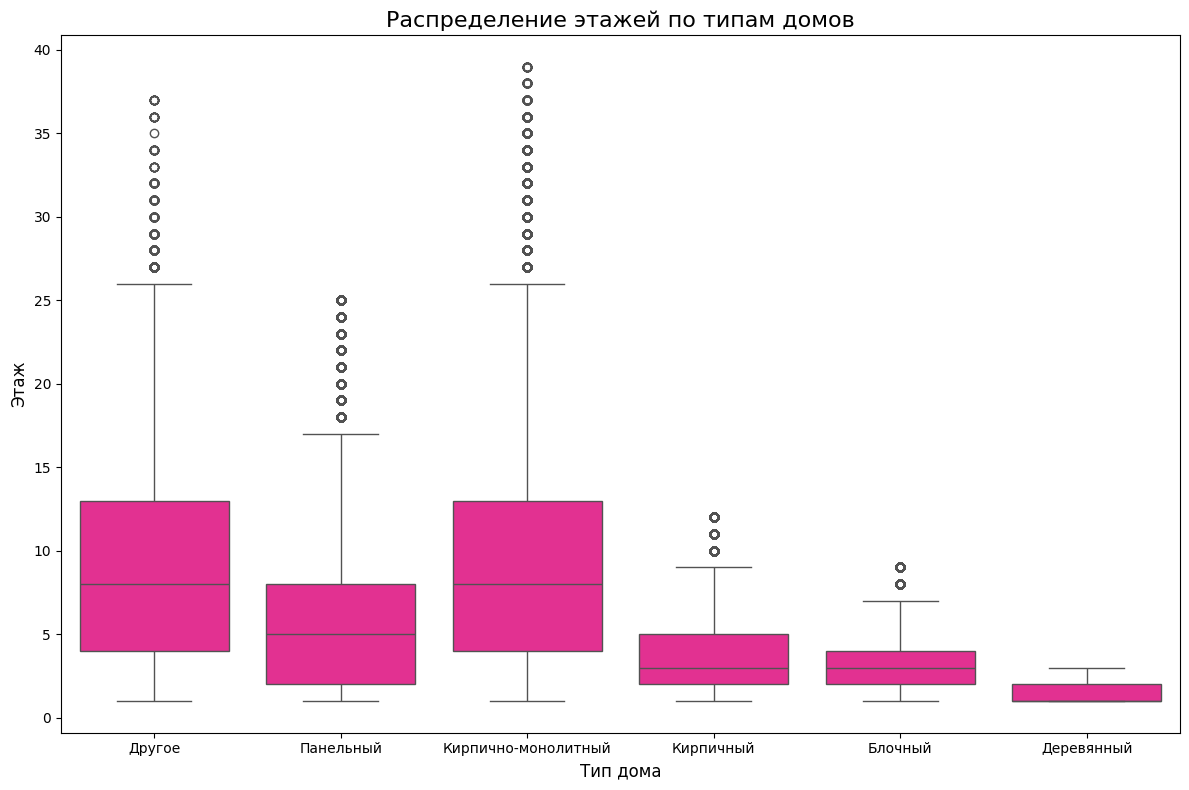

In [71]:
# проверим, остались ли забытые выбросы
plt.figure(figsize=(12, 8))
sns.boxplot(data=realty, x='building_type', y='level', color='DeepPink')
plt.title('Распределение этажей по типам домов', fontsize=16)
plt.xlabel('Тип дома', fontsize=12)
plt.ylabel('Этаж', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=[
    'Другое',
    'Панельный',
    'Кирпично-монолитный',
    'Кирпичный',
    'Блочный',
    'Деревянный'
])
plt.tight_layout()
plt.show()

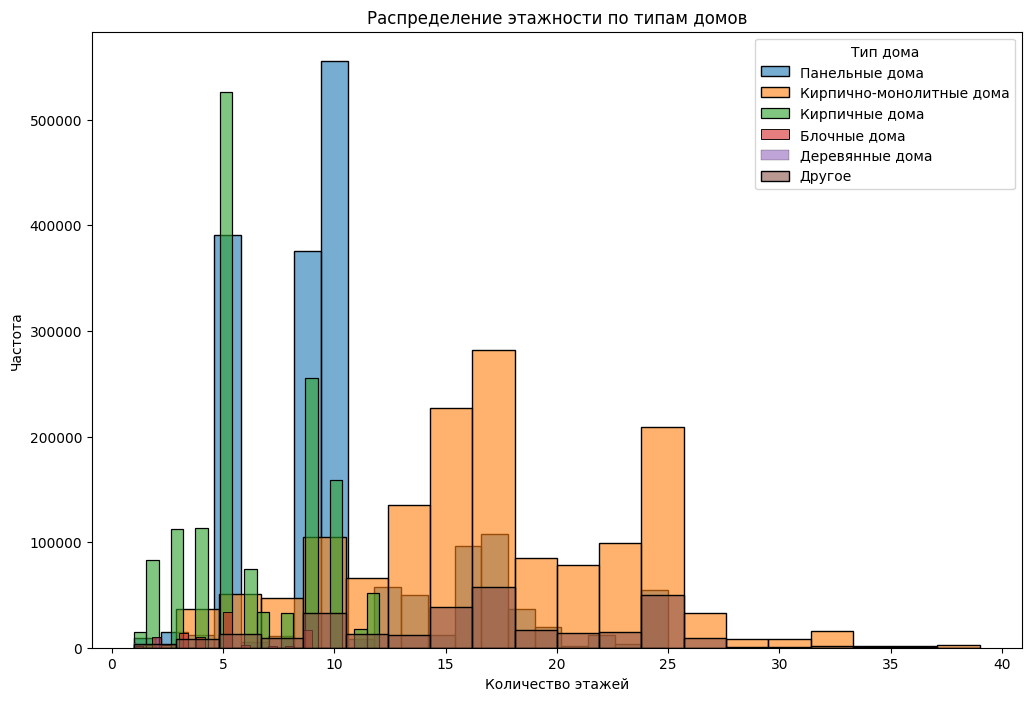

In [72]:
# Уникальные типы домов
building_types = realty['building_type'].unique()

# Названия типов домов для легенды
building_labels = {
    0: "Другое",
    1: "Панельные дома",
    2: "Кирпично-монолитные дома",
    3: "Кирпичные дома",
    4: "Блочные дома",
    5: "Деревянные дома"
}

# Построение гистограмм
plt.figure(figsize=(12, 8))
for b_type in building_types:
    sns.histplot(
        realty[realty['building_type'] == b_type]['levels'], 
        bins=20, 
        label=building_labels.get(b_type, f"Тип {b_type}"), 
        alpha=0.6
    )

# Настройки графика
plt.title("Распределение этажности по типам домов")
plt.xlabel("Количество этажей")
plt.ylabel("Частота")
plt.legend(title="Тип дома")
plt.show()

#### Описание графика:
На графике показано распределение этажности (levels) по различным типам домов (building_type). Каждый цвет на графике соответствует конкретному типу дома, а высота столбцов отражает частоту этажей в данных.

- Панельные дома (оранжевый): Распределение имеет пик в диапазоне от 9 до 25 этажей, что соответствует известной характеристике панельных домов.

- Кирпично-монолитные дома (синий): Чаще всего встречаются дома с этажностью до 30 этажей, но есть небольшое количество домов до 40 этажей.

- Кирпичные дома (зеленый): Большая часть кирпичных домов имеет 3–10 этажей. Выбросы выше 12 этажей были обработаны.

- Блочные дома (розовый): Основное распределение ограничено этажами до 9. Выбросы выше 9 этажей были переклассифицированы или удалены.

- Деревянные дома (фиолетовый): Практически все деревянные дома имеют от 1 до 3 этажей, что соответствует норме.

- Другие дома (коричневый): Распределение сильно размыто, что логично, так как этот тип не конкретизируется.

### Вывод:

Аномалии в этажности были обнаружены у всех типов домов. Выбросы могут быть связаны с неверной классификацией или ошибками при вводе данных. Наибольшее количество выбросов было обнаружено у блочных, кирпичных и кирпично-монолитных домов.
Принятые меры:

- Блочные дома: Дома выше 9 этажей были переклассифицированы как панельные или удалены.
- Кирпичные дома: Дома выше 12 этажей были переклассифицированы как кирпично-монолитные.
- Кирпично-монолитные дома: Для крупных городов (Москва, Санкт-Петербург) этажность ограничена 50 этажами. Для остальных регионов ограничение — 30 этажей. Аномалии выше этих значений были удалены.
- Деревянные дома: Удалены дома выше 3 этажей.


<div>
<h3 style="color: black;"> 4.4. Аномалии в столбце "kitchen_area" </h3>
</div>

[Вернуться к содержанию](#задачи)

<Axes: xlabel='kitchen_area'>

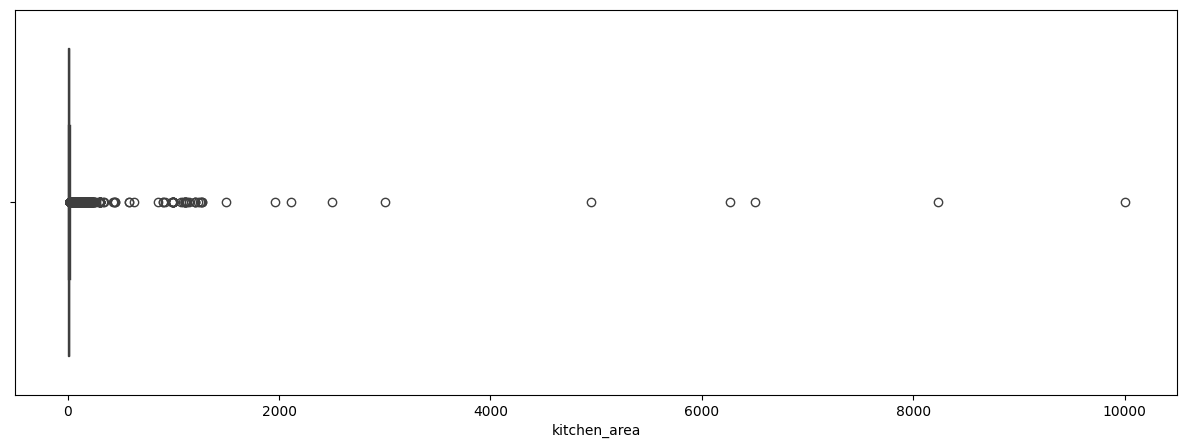

In [73]:
# посмотрим boxplot столбца kitchen_area
plt.figure(figsize=(15,5))
sns.boxplot(realty['kitchen_area'], orient='h')

In [74]:
realty[realty['kitchen_area'] <= 0 ] # как видим, отрицательных или нулевых значений нет

Empty DataFrame
Columns: [price, date, code, building_type, level, levels, rooms, area, kitchen_area, object_type, reg_name]
Index: []

На boxplot видим большие выбросы, посмотрим на них повнимательнее

In [75]:
realty[realty['kitchen_area'] >= 2000]

price       date   code  building_type  level  levels  rooms  \
788317   2650000 2018-12-28  13913              3      7       8      2   
979183   3200000 2019-01-31  11171              1      6       9      1   
1188227  2110000 2019-02-28   5282              1      1      10      2   
1470205  1900000 2019-04-10   5282              1      1       5      2   
1639341  1350000 2019-05-09   2860              3      4       5      2   
2976957  3500000 2020-01-27   2843              2      2       9      2   
3437641     1100 2020-04-24   9579              3      3       5      1   
3482256  2300000 2020-05-03   1010              1      2       5      2   

            area  kitchen_area  object_type                  reg_name  
788317     76.00        2500.0            0      Республика Ингушетия  
979183     37.00        9999.0            0  Республика Саха (Якутия)  
1188227     0.07        2110.0            0       Челябинская область  
1470205    44.00        6500.0            0       Челябинская область  
1639341  5644.00        4949.0            0       Кемеровская область  
2976957    51.00        8235.0            0        Краснодарский край  
3437641    22.00        6270.0            0        Республика Бурятия  
3482256    43.00        3000.0            0     Удмуртская Республика

Видно, что практически у всех квартир тут площадь кухни огромная и намного больше, чем площадь самой квартиры. А цены достаточно малы для такой площади, это очень странно. От 1100 рублей (!!!) всего до 3,5 млн рублей.

На авито по запросу квартира площадью от 500 м^2 по Москве и МО нашлось всего 58 объявлений, стоимостью 805 млн рублей и т д. Во первых, явно площадь кухни не может быть больше площади квартиры, поэтому поменяем в дальнейшем площади кухни и площади квартир там, где значение площади кухни больше, чем площадь квартиры. Во вторых, разберемся с этими выбросами площади квартир после замены

In [76]:
# проверяем kitchen_area > area
realty[realty['kitchen_area'] >= realty['area']]

price       date  code  building_type  level  levels  rooms  \
501       4599000 2018-09-08  9654              3      6      10      2   
668       1350000 2018-09-08  9654              1      5      10      1   
3010       950000 2018-09-08  9654              3      2       9     -1   
4056      1200000 2018-09-08  2359              3      3       9     -1   
4444      1570000 2018-09-08  1010              3      4       5      1   
...           ...        ...   ...            ...    ...     ...    ...   
5223825   2300000 2021-04-30  3991              0      5      16      1   
5225085   1050000 2021-04-30  3991              0      4       5      1   
5230476   1800000 2021-05-01  9654              2      4      18      1   
5238856  23399000 2021-05-01  2843              2     24      24      2   
5239890   4500000 2021-05-01  1010              2     10      17      3   

          area  kitchen_area  object_type               reg_name  
501       5.60          7.70            0  Новосибирская область  
668      13.78         48.02            1  Новосибирская область  
3010     22.00         22.00            0  Новосибирская область  
4056     23.00         23.00            1     Республика Хакасия  
4444     32.00         65.00            0  Удмуртская Республика  
...        ...           ...          ...                    ...  
5223825  23.50         23.50            0      Тюменская область  
5225085  18.00         18.00            0      Тюменская область  
5230476  18.50         18.50            0  Новосибирская область  
5238856   9.00         40.00            1     Краснодарский край  
5239890  69.00         91.00            0  Удмуртская Республика  

[4190 rows x 11 columns]

In [77]:
100 * realty[realty['kitchen_area'] >= realty['area']].shape[0] /realty.shape[0] # таких квартир 8 %

# но мы уже приняли решение сначала поменять их местами и потом уже смотреть выбросы

0.08043717894719059

In [78]:
# фильтр для строк, где kitchen_area >= area
mask = realty['kitchen_area'] >= realty['area']

# меняем значения kitchen_area и area местами
realty.loc[mask, ['kitchen_area', 'area']] = realty.loc[mask, ['area', 'kitchen_area']].values

In [79]:
# проверим наши преобразования
realty[realty['kitchen_area'] >= realty['area']]

price       date   code  building_type  level  levels  rooms  area  \
3010      950000 2018-09-08   9654              3      2       9     -1  22.0   
4056     1200000 2018-09-08   2359              3      3       9     -1  23.0   
7293      450000 2018-09-09   6171              3      1       2      1  30.6   
12479    1600000 2018-09-10   2604              3      1       5     -1  26.5   
16017    1650000 2018-09-10  10160              1      3       5      2   6.0   
...          ...        ...    ...            ...    ...     ...    ...   ...   
5179177  1600000 2021-04-27   9654              1     10      17     -1  20.0   
5213846  1958000 2021-04-30   5282              2      5      14      1  37.0   
5223825  2300000 2021-04-30   3991              0      5      16      1  23.5   
5225085  1050000 2021-04-30   3991              0      4       5      1  18.0   
5230476  1800000 2021-05-01   9654              2      4      18      1  18.5   

         kitchen_area  object_type               reg_name  
3010             22.0            0  Новосибирская область  
4056             23.0            1     Республика Хакасия  
7293             30.6            0   Свердловская область  
12479            26.5            0    Ярославская область  
16017             6.0            0     Забайкальский край  
...               ...          ...                    ...  
5179177          20.0            0  Новосибирская область  
5213846          37.0            0    Челябинская область  
5223825          23.5            0      Тюменская область  
5225085          18.0            0      Тюменская область  
5230476          18.5            0  Новосибирская область  

[1208 rows x 11 columns]

Тут осталось 1208 квартир, где площадь кухни = площади квартиры. Как это возможно? Кажется, возможен такой вариант, что эти квартиры - студии (проверим). Такая ситуация может быть правдой для малогабаритных студий, где кухня занимает всё пространство квартиры.

In [80]:
realty[realty['kitchen_area'] >= realty['area']]['rooms'].unique()

array([-1,  1,  2,  4,  3,  5], dtype=int64)

Кажется тут есть не только студии, оставим студии (немного логики) и удалим все остальные

In [81]:
# количество квартир не студий, где площади равны
realty[(realty['kitchen_area'] >= realty['area']) & (realty['rooms'] != -1)]['area'].count()

834

Условие для фильтрации:
- выбираем строки, где площадь кухни больше или равна площади квартиры.
- выбираем строки, где количество комнат не равно 1.

In [82]:
# удаляем строки, где kitchen_area >= area и rooms != -1
realty = realty[~((realty['kitchen_area'] >= realty['area']) & (realty['rooms'] != -1))]

In [83]:
realty[realty['kitchen_area'] >= realty['area']]['rooms'].unique()

array([-1], dtype=int64)

Теперь остались только студии, супер

<Axes: xlabel='kitchen_area'>

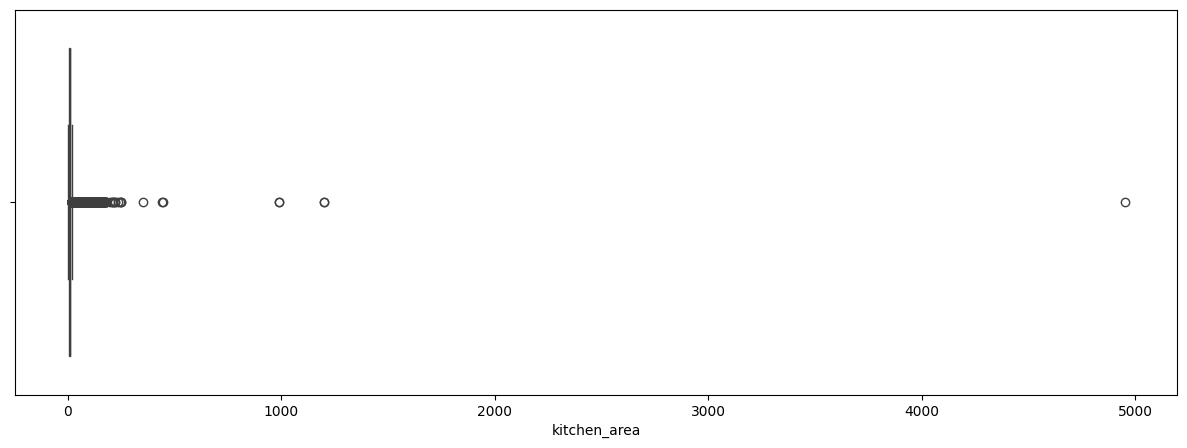

In [84]:
# посмотрим boxplot столбца kitchen_area
plt.figure(figsize=(15,5))
sns.boxplot(realty['kitchen_area'], orient='h')

In [85]:
# самые явные выбросы посмотрим
realty[realty['kitchen_area'] >= 250]

price       date  code  building_type  level  levels  rooms  \
175163   1070000 2018-10-02  4007              3      5       5      2   
259822   4444444 2018-10-15  2871              2      4       4      3   
532270   3600000 2018-11-25    81              1     11      16      1   
1639341  1350000 2019-05-09  2860              3      4       5      2   
1704208  8990000 2019-05-21  6171              3      2      10      2   
1704481   290000 2019-05-21  4417              3      4       5      2   
2461834   650000 2019-09-30     3              3      2       9      1   
2719605  1360000 2019-11-24  3230              3      5       5      2   
3067102  2200000 2020-02-13  2843              2     20      24      1   

           area  kitchen_area  object_type               reg_name  
175163   3800.0        1200.0            0    Республика Дагестан  
259822   4444.0         444.0            0  Нижегородская область  
532270   1131.0         353.0            0     Московская область  
1639341  5644.0        4949.0            0    Кемеровская область  
1704208   780.0         250.0            0   Свердловская область  
1704481   580.0         440.0            0        Республика Коми  
2461834  5200.0        1200.0            0                 Москва  
2719605  4970.0         990.0            1     Ростовская область  
3067102  3793.0         989.0            1     Краснодарский край

Цена несоответствующая для такой площади и региона

Решила поискать информацию о площади кухни на сайте Циан, чтобы убедиться в том, какая максимальная площадь кухни вообще существует в объявлениях

В Санкт-Петербурге нашла квартиру с площадью кухни 149 м^2 стоимостью 370 000 000 ₽, и в Москве и МО пентхаус с площадью кухни 168 м^2 стоимостью 3 306 270 000 ₽

In [86]:
# посмотрим сколько выбросов. Поставим максимально возможную площадь кухни по объявлениям
realty[realty['kitchen_area'] >= 168.7]

price       date  code  building_type  level  levels  rooms  \
175163     1070000 2018-10-02  4007              3      5       5      2   
259822     4444444 2018-10-15  2871              2      4       4      3   
316388    14033250 2018-10-23  3106              3      5       9      5   
532270     3600000 2018-11-25    81              1     11      16      1   
1639341    1350000 2019-05-09  2860              3      4       5      2   
1703649    7700000 2019-05-21  5282              2      2      24      4   
1703792    7000000 2019-05-21    81              2      6      17      2   
1703917    3000000 2019-05-21  3230              1      1      10      2   
1704208    8990000 2019-05-21  6171              3      2      10      2   
1704481     290000 2019-05-21  4417              3      4       5      2   
1707657    3400000 2019-05-22    81              2      8      14      2   
1708865    4500000 2019-05-22  2843              2      6      12      2   
1710586   17500000 2019-05-22  2843              2     16      25      4   
1711240    4500000 2019-05-22  2843              2      5      16      1   
2461834     650000 2019-09-30     3              3      2       9      1   
2655385  240000000 2019-11-11  2661              0      8      13      4   
2655392  323000000 2019-11-11  2661              0     13      13      3   
2719605    1360000 2019-11-24  3230              3      5       5      2   
3023722    5300000 2020-02-03  2843              4      6       6      2   
3067102    2200000 2020-02-13  2843              2     20      24      1   
3330078  323000000 2020-03-31  2661              0     13      13      3   
3333146   65950000 2020-03-31  6171              3      8      11      5   
3470444  323000000 2020-05-01  2661              0     13      13      3   
3686405  323000000 2020-06-17  2661              0     13      13      3   
3819478    4000000 2020-07-07  2843              2      5       5      2   
4647260   38900000 2020-12-21  9654              0      7      24     -1   
4866051   37884000 2021-03-01  2871              2      3       6      3   
4957847  323000000 2021-03-20  2661              0     13      13      3   
5025619  140000000 2021-04-01  2661              2      4      15      3   

            area  kitchen_area  object_type               reg_name  
175163   3800.00       1200.00            0    Республика Дагестан  
259822   4444.00        444.00            0  Нижегородская область  
316388    170.10        170.00            0      Самарская область  
532270   1131.00        353.00            0     Московская область  
1639341  5644.00       4949.00            0    Кемеровская область  
1703649  1260.00        210.00            0    Челябинская область  
1703792   750.00        180.00            1     Московская область  
1703917   620.00        180.00            0     Ростовская область  
1704208   780.00        250.00            0   Свердловская область  
1704481   580.00        440.00            0        Республика Коми  
1707657   520.00        180.00            0     Московская область  
1708865   710.00        210.00            0     Краснодарский край  
1710586  1300.00        220.00            0     Краснодарский край  
1711240   550.00        180.00            0     Краснодарский край  
2461834  5200.00       1200.00            0                 Москва  
2655385   342.00        200.00            0        Санкт-Петербург  
2655392   424.60        168.80            0        Санкт-Петербург  
2719605  4970.00        990.00            1     Ростовская область  
3023722   468.00        248.00            0     Краснодарский край  
3067102  3793.00        989.00            1     Краснодарский край  
3330078   424.60        168.80            0        Санкт-Петербург  
3333146   263.80        236.00            0   Свердловская область  
3470444   424.60        168.80            0        Санкт-Петербург  
3686405   424.60        168.80            0        Санкт-Петербург  
3819478

In [87]:
# записи, где площадь кухни превышает 168.7
large_kitchen_outliers = realty[realty['kitchen_area'] >= 168.7]

# группируем данные по регионам (reg_name)
grouped_outliers = (
    large_kitchen_outliers
    .groupby('reg_name')
    .agg(
        outlier_count=('kitchen_area', 'size'),      # Количество выбросов
        avg_price=('price', 'mean'),                # Средняя цена за квартиру
        avg_kitchen_area=('kitchen_area', 'mean'),  # Средняя площадь кухни
        avg_total_area=('area', 'mean')             # Средняя площадь квартиры
    )
    .reset_index()
    .sort_values(by='outlier_count', ascending=False)  # Сортировка по количеству выбросов
)

# сделаем формат отображения чисел в pandas
pd.options.display.float_format = '{:,.0f}'.format

grouped_outliers

reg_name  outlier_count   avg_price  avg_kitchen_area  \
10        Санкт-Петербург              7 285,000,000               179   
1      Краснодарский край              6   6,333,333               345   
3      Московская область              3   4,666,667               238   
4   Нижегородская область              2  21,164,222               308   
8      Ростовская область              2   2,180,000               585   
11   Свердловская область              2  37,470,000               243   
0     Кемеровская область              1   1,350,000             4,949   
2                  Москва              1     650,000             1,200   
5   Новосибирская область              1  38,900,000               244   
6     Республика Дагестан              1   1,070,000             1,200   
7         Республика Коми              1     290,000               440   
9       Самарская область              1  14,033,250               170   
12    Челябинская область              1   7,700,000               210   

    avg_total_area  
10             401  
1            1,288  
3              800  
4            2,392  
8            2,795  
11             522  
0            5,644  
2            5,200  
5              250  
6            3,800  
7              580  
9              170  
12           1,260

In [88]:
print(f"Наблюдаем {realty[realty['kitchen_area'] >= 168.7].shape[0]} выбросов")

Наблюдаем 29 выбросов


#### NaN значения считаются неопределенными, и при любой операции сравнения, как в случае <=, результатом будет False. Таким образом, строки с пропущенными значениями в kitchen_area автоматически удаляются при фильтрации. Нам этого не надо, поэтому сделаем так:

Чтобы сохранить строки с пропущенными значениями (NaN), добавим условие, которое явно разрешает строки с NaN

Теперь точно можем их удалить

In [89]:
realty = realty[(realty['kitchen_area'] <= 168.7) | realty['kitchen_area'].isna()]
realty.shape[0]  

5208171

Теперь разберемся с аномалиями в площади квартиры (столбец 'area')

<div>
<h3 style="color: black;"> 4.5 Аномалии в столбце "area" </h3>
</div>

[Вернуться к содержанию](#задачи)

<Axes: xlabel='area'>

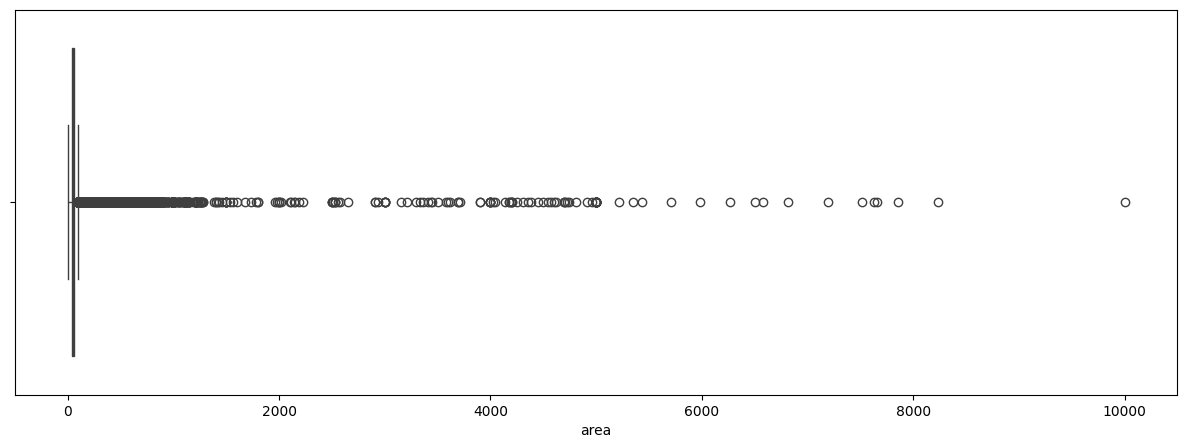

In [90]:
# посмотрим boxplot столбца area
plt.figure(figsize=(15,5))
sns.boxplot(realty['area'], orient='h')

In [91]:
realty[realty['area'] >= 1500]

price       date   code  building_type  level  levels  rooms  \
128519    3600000 2018-09-25   3991              0     12      17      2   
237727    1350000 2018-10-11   2922              3      2       5      1   
448140     999000 2018-11-13   2871              3      1       2      2   
622883    2150000 2018-12-05   2843              2     15      17      1   
788317    2650000 2018-12-28  13913              3      7       8      2   
...           ...        ...    ...            ...    ...     ...    ...   
5108345  14685000 2021-04-15   2661              0      2      12      2   
5125844   5540000 2021-04-20   2661              3     10      12      1   
5139134   1500000 2021-04-21   2843              3      9      10      1   
5158690   4500000 2021-04-25   4007              3      4       5      2   
5206700   5800000 2021-04-29   2661              1     12      12      1   

         area  kitchen_area  object_type               reg_name  
128519  3,600            20            0      Тюменская область  
237727  1,958            19            0   Республика Татарстан  
448140  4,180            10            0  Нижегородская область  
622883  3,366             9            0     Краснодарский край  
788317  2,500            76            0   Республика Ингушетия  
...       ...           ...          ...                    ...  
5108345 7,513            29            0        Санкт-Петербург  
5125844 4,382             7            0        Санкт-Петербург  
5139134 3,690            37            1     Краснодарский край  
5158690 5,000             9            0    Республика Дагестан  
5206700 4,693            10            0        Санкт-Петербург  

[131 rows x 11 columns]

#### Обработка аномалий с площадью :
Посмотрела максимально возможные площади квартир по Санкт-Петербургу, Москве и МО.

##### Санкт-Петербург:
Было найдено 3 объявления с квартирами по площади = 1800 м^2(как оказалось, в объявлении продается весь этаж, у этого здания 3 этажа - 3 объявления.). При поиске объявлений квартиры с площадью >= 550 нашлось 14 объявлений. Нашлась и первая "ошибка" в данных. 
Пример ошибки:
- "Продается 45/579 квартиры, 993,6 м²", то есть продается квартира площадью 62,1 м^2, но так как это доля в бывшем общежитии, то по документам это именно квартира с площадью 993,6 м². Стоит всего 7,1 млн. руб.
- Очень интересное объявление! "Продается 25% квартиры, 1 598,1/695/70 м². !!Продается доля под прописку (часть комнаты)!! 60.000 за 1 квадратный метр. Общая площадь комнаты: 40.90 кв. м., с учетом антресоли 81.80 кв. м. Размер доли: 6.05 кв. м. по документам, за счет антресоли получается 12.10 кв. м." Цена в объявлении всего 360 тысяч руб. Циан же считает цену за м^2 как цену объявления делить на площадь (1 598,1), вот и получается 225 руб/м^2!

После просмотра всех объявлений оказалось, что не считая первых трех объявлений (=1800 м^2), все остальные - это вот такие доли. У них достаточно низкая цена (которая не соответствует фактической площади). Их выдает маленькая (особенно относительно общей площади) площадь кухни.

Если ставить площадь <= 500 м^2 то появляется уже намного больше адекватных объявлений. 

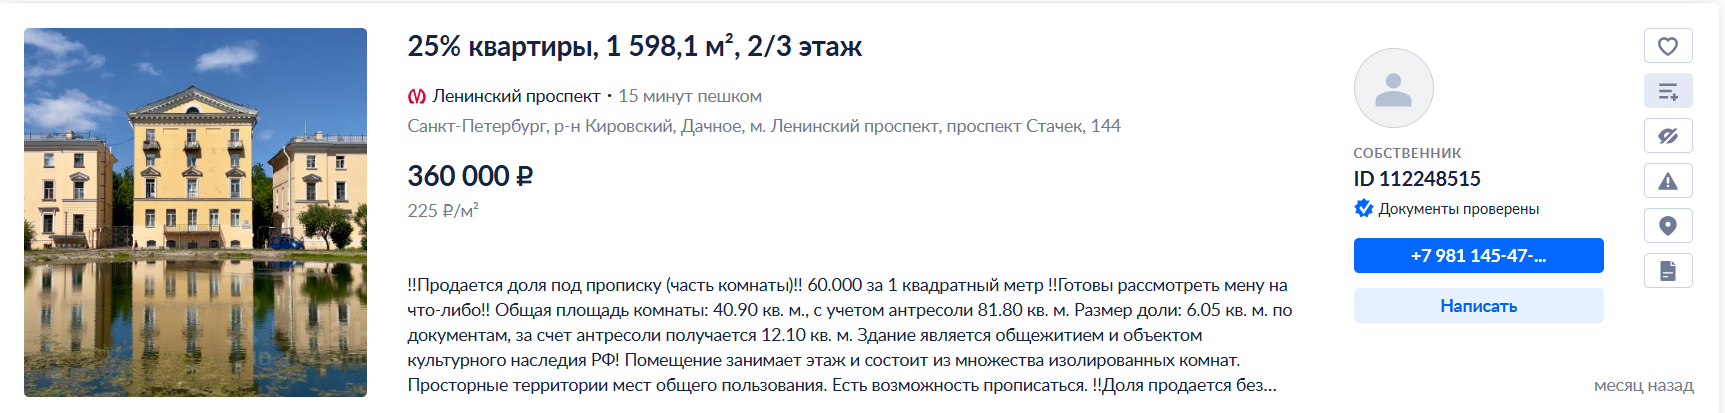
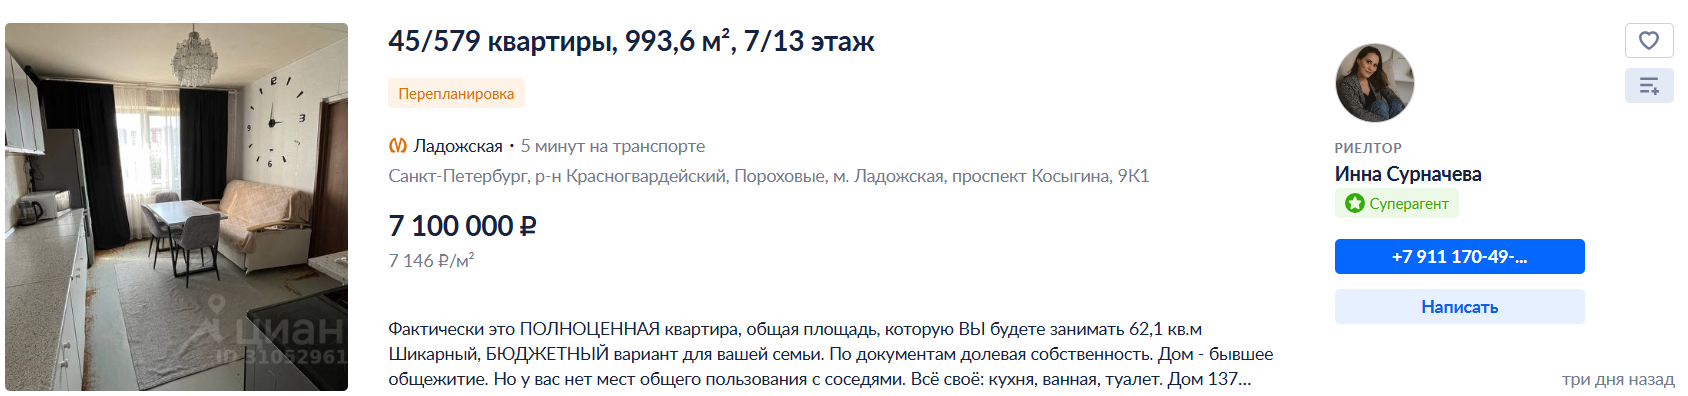

##### Москва:
В Москве по такому запросу было найдено также 4 объявления с площадью "квартиры" более 1100 м^2 (один особняк, городская резиденция, королевский пентхаус в Москва сити и четырехэтажный особняк на 8 квартир). При запросе площади >= 900 м^2 можно увидеть всего 15 объявлений квартир стоимостью в среднем 3,5 млрд руб., но не менее 350 млн. руб.
Также найдены еще пару "ошибок":
- Продажа "Продается 18/492 квартиры, 802/15 м². "Комната имеет общую площадь 18,3 кв. м, расположена на третьем этаже пятиэтажного кирпичного дома 1953 года постройки."  (т. е. по факту площадь всего 18,3 м^2)  Стоимость такой квартиры всего 2,6 млн.руб. Площадь кухни соответственно 15 м^2. Вот откуда выброс!
- 
Если поставить площадь >= 700, видим уже 36 объявлений, среди которых так же пентхаусы или целые этажи в доме, записанные как одна квартира.

При установлении площади на уровне 650 и ниже начинают появляться те самые доли в квартире, которые имеют маленькую цену и неправильно большом метраж.


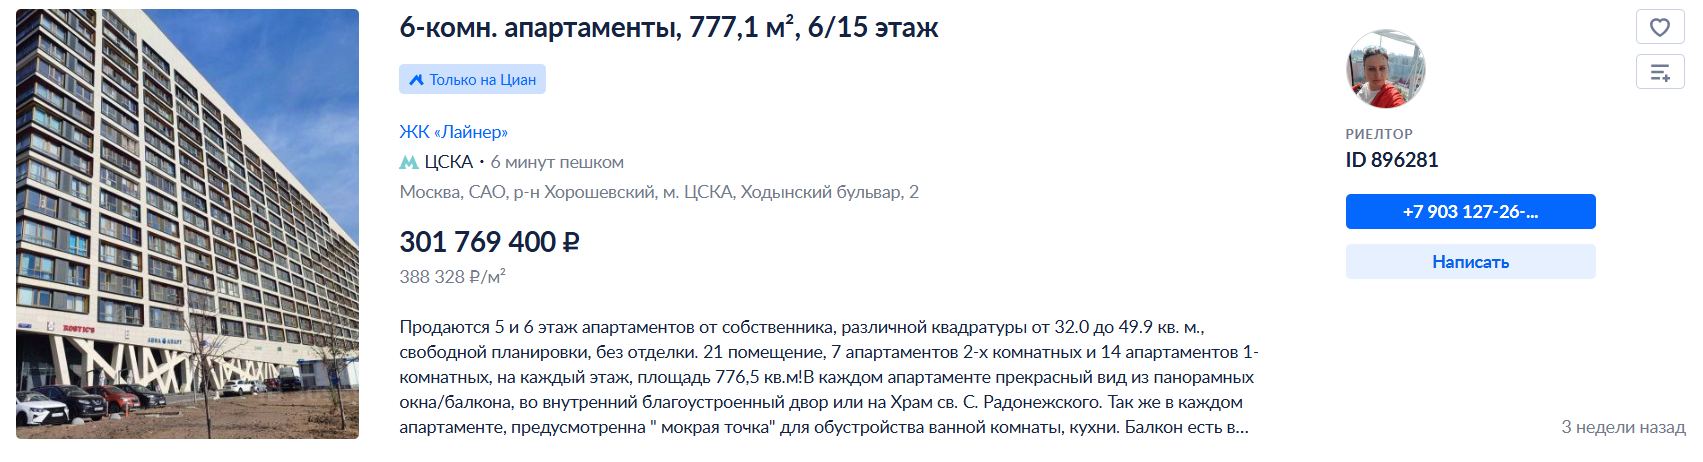
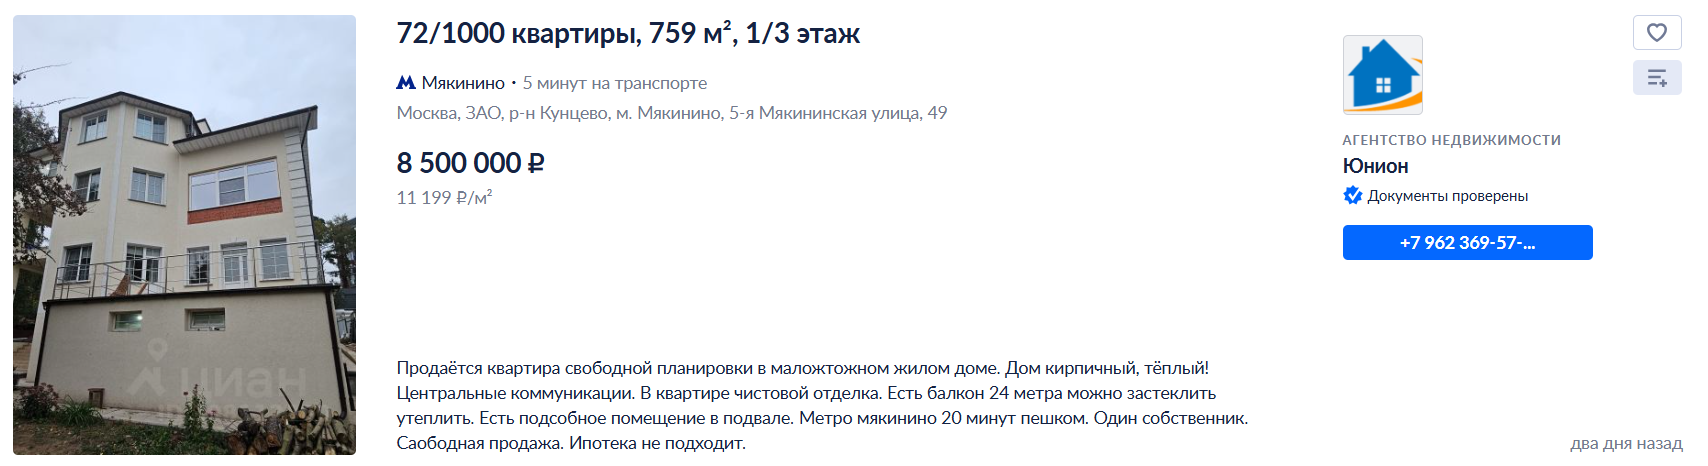

После проведенного "анализа" можно сделать вывод, что в Санкт-Петербурге намного больше таких "долей", чем в Москве, где зачастую встречается просто очень дорогая элитная недвижка с видом на Кремль.

В связи с этим квартиры площадью более 500 м^2 в Санкт-Петербурге, более 750 в Москве буду считать выбросами

#### Остальные регионы:
Посмотрим пару больших регионов и пару маленьких, чтобы сделать каие-то выводы.
- ЛО: 2 объекта площадью более 300 м^2.
- МО: 27 объектов площадью более 300 м^2.
- Новосибирская область: 12 объектов площадью более 300 м^2.
- Республика Саха (Якутия): 0 объектов площадью более 200 м^2.
- Республика Саха (Якутия): 4 объектов площадью более 300 м^2.

...и т д
Можно сделать вывод, что в остальных регионах, а также в МО и ЛО таких больших квартир почти нет.

### Выводы по выбросам:

#### Санкт-Петербург:

- Квартиры площадью более 500 м² зачастую являются либо долями в квартирах, либо продаются как целые этажи зданий, что вводит в заблуждение.
- Рекомендуемое ограничение: площадь <= 500 м² для адекватных объявлений.

#### Москва:

- В Москве элитная недвижимость имеет площадь около 700-800 м². Однако квартиры с большей площадью, как правило, включают ошибочные данные или относятся к уникальным объектам, таким как особняки или пентхаусы.
- Рекомендуемое ограничение: площадь <= 750 м².

#### Остальные регионы:

- В регионах, как правило, площади квартир значительно меньше, чем в столицах. Даже в случае элитной недвижимости, площади редко превышают 300–400 м².
- Рекомендуемое ограничение: площадь <= 400 м².

In [92]:
# зафиксируем размер датафрейма
realty_before_area = realty.shape[0]
realty_before_area

5208171

In [93]:
# Установим максимальные пределы площади для каждого региона
max_area_limits = {
    'Москва': 750,
    'Санкт-Петербург': 500,
    'default': 400  # Для остальных регионов
}

In [94]:
# Функция для определения допустимой максимальной площади
def get_max_area_limit(region_name):
    return max_area_limits.get(region_name, max_area_limits['default'])

In [95]:
# Фильтрация данных
realty['max_area_limit'] = realty['reg_name'].apply(get_max_area_limit)
realty = realty[realty['area'] <= realty['max_area_limit']]

In [96]:
# Удаляем временный столбец
realty = realty.drop(columns=['max_area_limit'])

In [97]:
# Проверяем результат
print(f"Количество строк до фильтрации: {realty_before_area}")
print(f"Количество строк после фильтрации: {realty.shape[0]}")

Количество строк до фильтрации: 5208171
Количество строк после фильтрации: 5206225


In [98]:
realty[realty['area'] >= 500].sample(3)

price       date  code  building_type  level  levels  rooms  \
3496254    7350000 2020-05-08     3              1     10      12      2   
3791339   12500000 2020-07-02     3              1      6      16      3   
3316749  857922000 2020-03-27     3              2      3       5      5   

         area  kitchen_area  object_type reg_name  
3496254   515            97            0   Москва  
3791339   686            90            0   Москва  
3316749   533            30            0   Москва

<Axes: xlabel='area'>

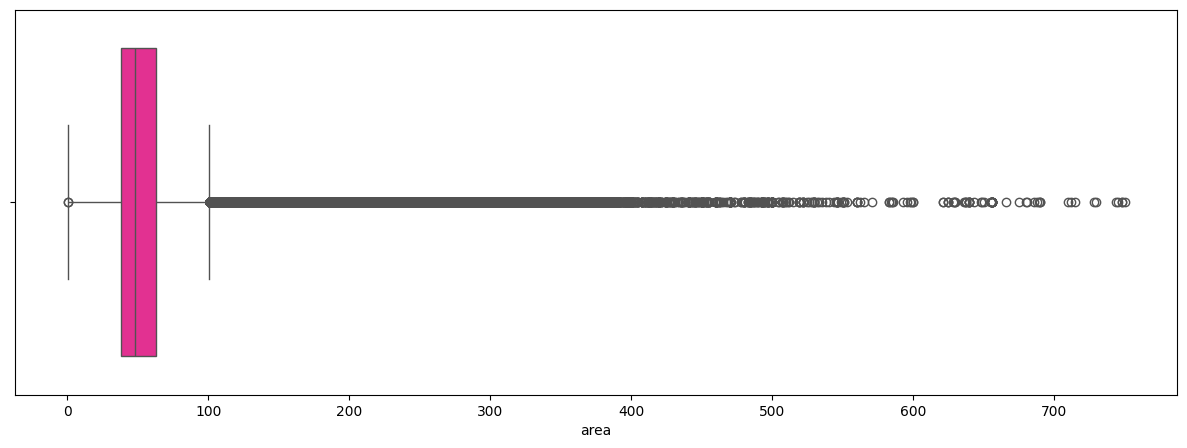

In [99]:
# посмотрим boxplot столбца area
plt.figure(figsize=(15,5))
sns.boxplot(realty['area'], orient='h', color='DeepPink')

In [100]:
realty.shape[0]

5206225

In [101]:
# код работал очень долго, его скрин в картинке

# plt.figure(figsize=(10, 20))  
# sns.boxplot(data=realty, y='reg_name', x='area', showfliers=True, orient='h', color='DeepPink')
# plt.title('Распределение площади по регионам (выбросы)', fontsize=16)
# plt.xlabel('Площадь (м^2)', fontsize=12)
# plt.ylabel('Регион', fontsize=12)
# plt.tight_layout()
# plt.show()

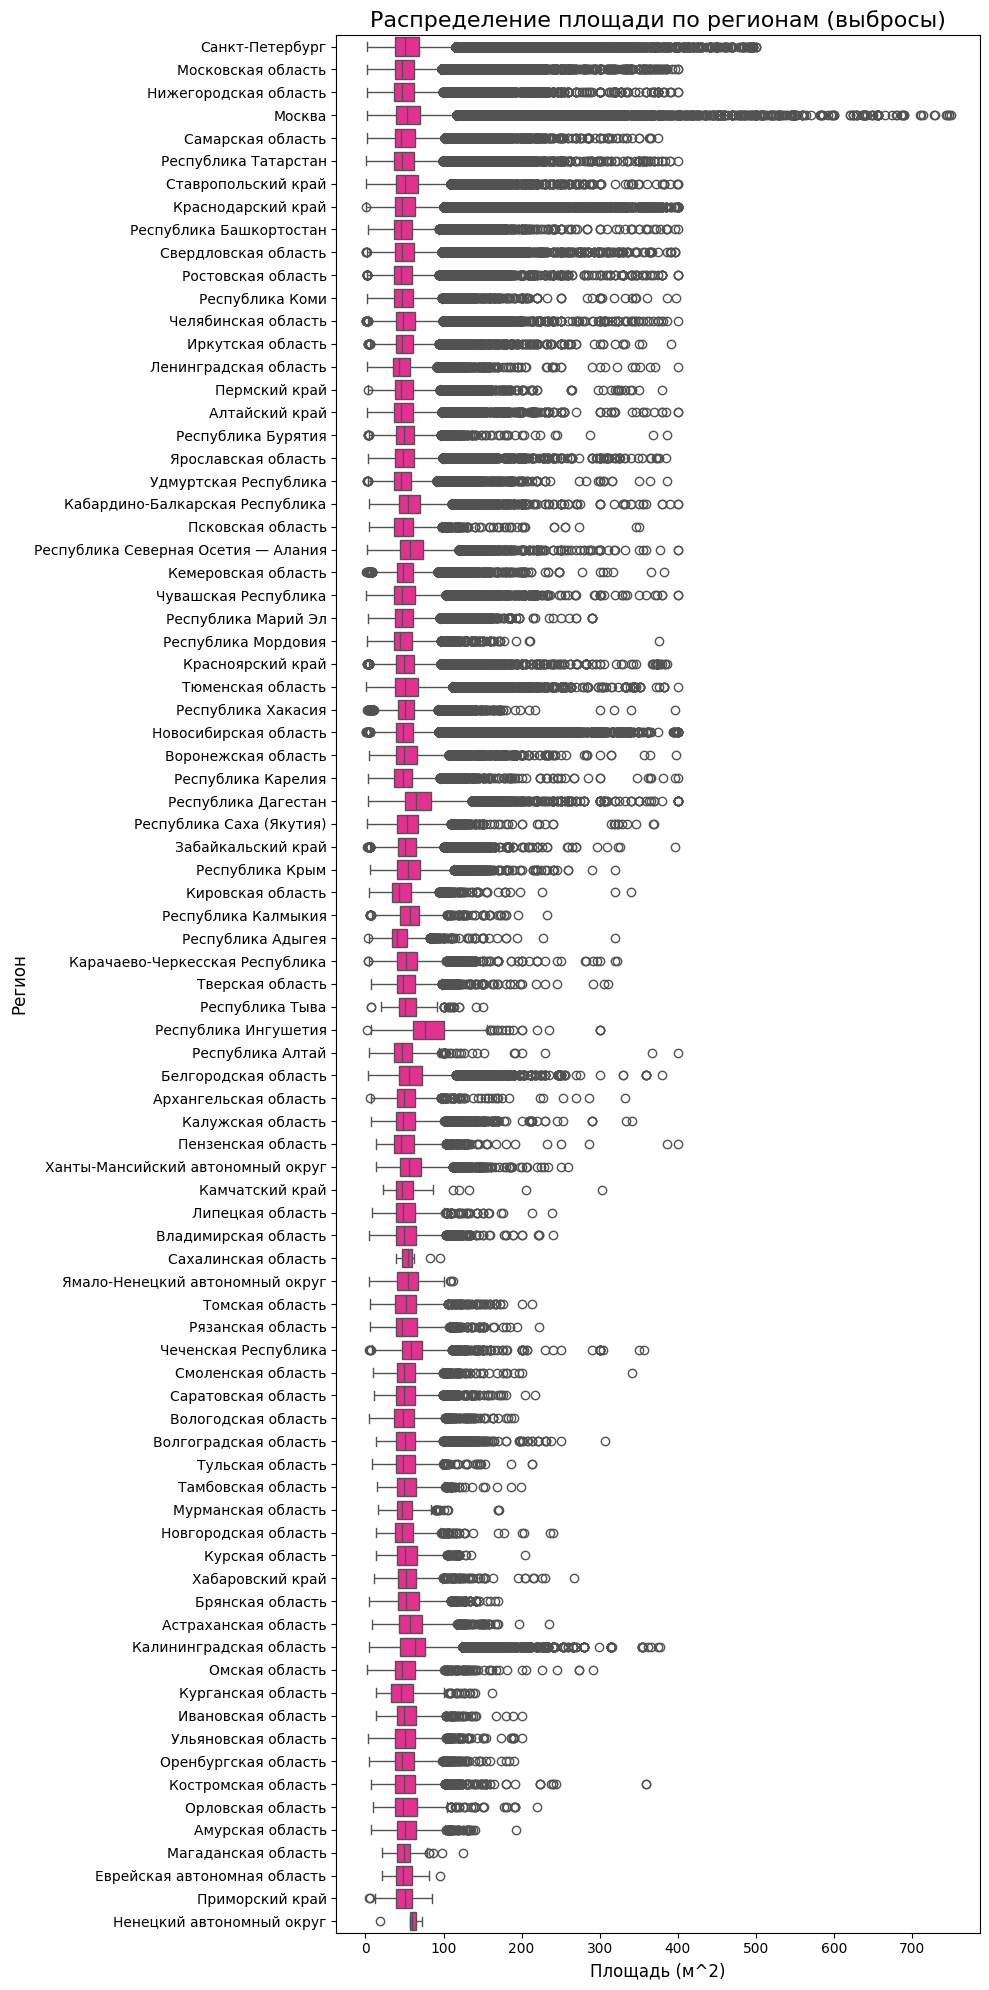

Смотрим выбросы в площади с другой стороны (которые приближаются к 0), так как они также могут оказать влияние на расчет цены за м^2.

ЦИАН

##### Санкт-Петербург:
По запросу площадь квартиры менее 15 м^2 было найдено 8 объявлений. Цена небольшая, это все студии или 1-комнатные апартаменты. Также снова были найдены доли. По объялению площадь, к примеру, 13 м^2, а на самом деле 25% от 13 м^2.  Минимальная 8,5 м^2.
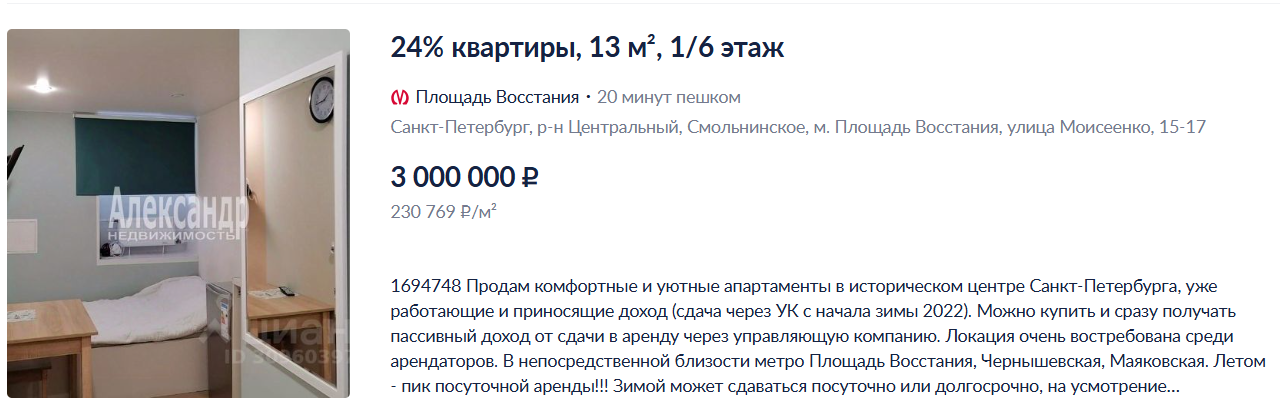
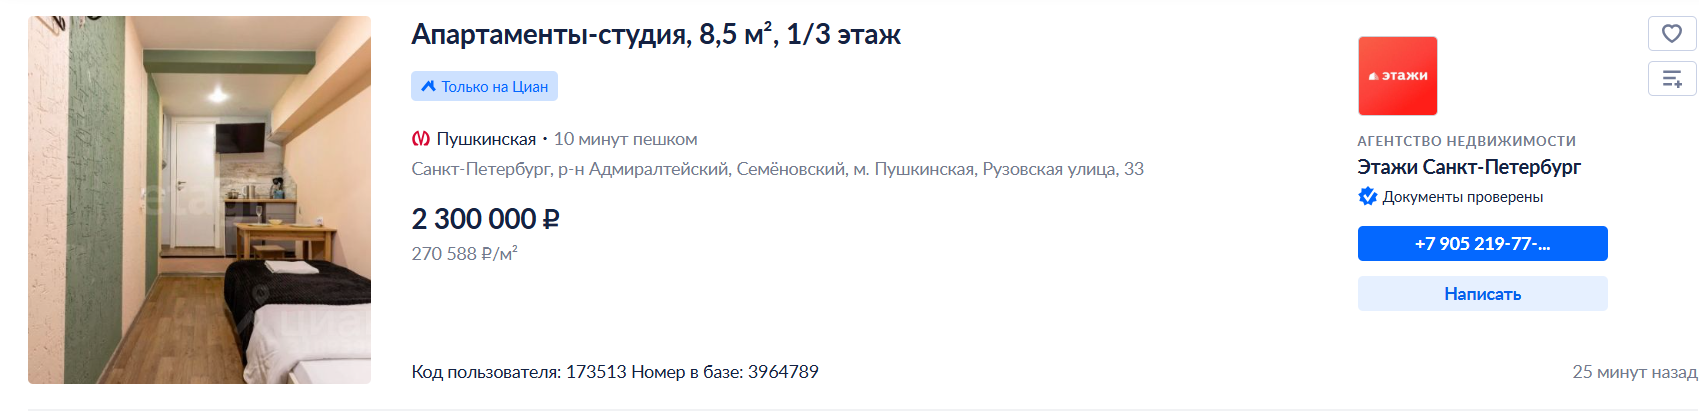

##### Москва:
В Москве по такому запросу было найдено около 14 объявлений с площадью "квартиры" <= 13 м^2 (опять же доли, только теперь правильно оформленные, и однакомнатные квартиры или студии). Самая минимальная площадь это 10 м^2. Цены от 2,5 до 7,5 млн. руб.
Минимальная 8 м^2.

На АВИТО так же минимальная площадь 10 м^2 (в Москве около 420 объявлений, в Санкт-Петербурге около 65).
Установлю минимальную площадь 8 м^2.
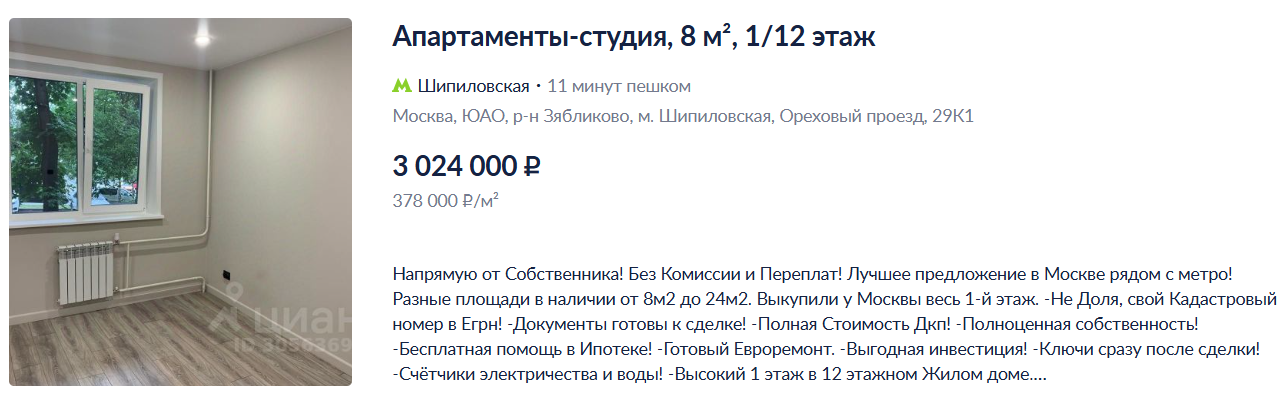

In [102]:
# найдем все записи с маленькой площадью
realty[realty['area'] < 8]

price       date  code  building_type  level  levels  rooms  area  \
501       4599000 2018-09-08  9654              3      6      10      2     8   
6113      4599000 2018-09-09  9654              3      6      10      2     8   
10922     4599000 2018-09-10  9654              3      6      10      2     8   
18842     4599000 2018-09-11  9654              3      6      10      2     8   
201283    6290000 2018-10-06  2661              1      3      12      3     8   
...           ...        ...   ...            ...    ...     ...    ...   ...   
4630220    300000 2020-12-16  3991              3      2       5      1     4   
4843249  10000000 2021-02-26  6171              2      5      16      1     2   
4876773    550000 2021-03-05  3991              3      5       5      1     8   
5064475   2650000 2021-04-08  5282              3      2       5      3     6   
5191891   7500000 2021-04-27  2661              0     10      11      1     4   

         kitchen_area  object_type               reg_name  
501                 6            0  Новосибирская область  
6113                6            0  Новосибирская область  
10922               6            0  Новосибирская область  
18842               6            0  Новосибирская область  
201283              8            0        Санкт-Петербург  
...               ...          ...                    ...  
4630220             1            0      Тюменская область  
4843249             1            0   Свердловская область  
4876773             7            0      Тюменская область  
5064475             5            0    Челябинская область  
5191891             0            0        Санкт-Петербург  

[5174 rows x 11 columns]

In [103]:
# сгруппируем по количеству комнат и подсчитываем количество записей
grouped_by_rooms = realty[realty['area'] < 8].groupby('rooms').size().reset_index(name='count')

In [104]:
print("Группировка квартир с площадью < 8 м² по количеству комнат:")
grouped_by_rooms

Группировка квартир с площадью < 8 м² по количеству комнат:


rooms  count
0     -1    153
1      1   1766
2      2   2070
3      3   1073
4      4    110
5      5      2

Предполагаю, что такая маленькая площадь может быть лишь у студий (на циане они часто называются однокомнатными апартаментами, по факту это студия, но стоит 1). Поэтому оставим только их. 2,3 и тем более комнат в такой квартире быть не может.
По идее минимально возможная площадь 10 м^2, но студии нашлись и поменьше. Их оставим, а остальные удалим.
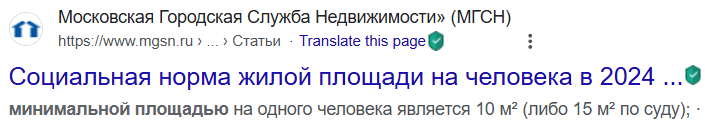

In [105]:
realty[realty['area'] == 8] # такие записи можем оставить

price       date  code  building_type  level  levels  rooms  area  \
541589    240000 2018-11-26  9654              1      5       9      1     8   
691019   2700000 2018-12-14  1010              1      1       9      5     8   
962418    780000 2019-01-28  4417              1      4       5      3     8   
1315710   190000 2019-03-21  9654              1      5       9      1     8   
1376981   510000 2019-03-29  2843              3      1       5      1     8   
...          ...        ...   ...            ...    ...     ...    ...   ...   
4060865  3200000 2020-08-28  5282              5      2       2      3     8   
4137557  1810000 2020-09-09  8090              1      1      10      1     8   
4234991   900000 2020-09-28  3230              3      1       2      2     8   
4497132   190000 2020-11-18  9654              1      9      10      1     8   
5016781   600000 2021-03-31  3230              3      2       5      1     8   

         kitchen_area  object_type               reg_name  
541589              1            1  Новосибирская область  
691019              7            0  Удмуртская Республика  
962418              7            0        Республика Коми  
1315710             1            0  Новосибирская область  
1376981             2            0     Краснодарский край  
...               ...          ...                    ...  
4060865             6            0    Челябинская область  
4137557             4            0     Республика Карелия  
4234991             4            0     Ростовская область  
4497132             1            0  Новосибирская область  
5016781             1            0     Ростовская область  

[330 rows x 11 columns]

In [106]:
# исключаем записи с площадью < 8 м² если это не студии
realty = realty[(realty['area'] > 8) | (realty['rooms'] == -1)]

In [107]:
print(f"Количество строк после фильтрации: {realty.shape[0]}")

Количество строк после фильтрации: 5200876


<div>
<h3 style="color: black;"> 4.6 Аномалии в столбце "price" </h3>
</div>

[Вернуться к содержанию](#задачи)

In [108]:
# проверяем значения price
price_threshold = 150000  # min разумная цена
realty_strange = realty[realty['price'] < price_threshold]
realty_strange

price       date  code  building_type  level  levels  rooms  area  \
2277        800 2018-09-08  6171              1      3       5      1    32   
7133       1000 2018-09-09  3991              1     10      16      1    36   
8125       1750 2018-09-09  2843              3      1       2      3    76   
8353     100000 2018-09-09  4417              1      2       5      2    48   
8704     100000 2018-09-09  4417              1      4       5      1    25   
...         ...        ...   ...            ...    ...     ...    ...   ...   
5226593    3100 2021-04-30  2843              1      2       9      1    32   
5228841  141509 2021-04-30  6171              1      1       3      2    59   
5237699    6700 2021-05-01  2661              4      3       5      2    44   
5240450    6300 2021-05-01    81              2     15      17      1    33   
5240504   11000 2021-05-01  4695              2     18      18      1    38   

         kitchen_area  object_type               reg_name  
2277                6            0   Свердловская область  
7133               16            1      Тюменская область  
8125                8            0     Краснодарский край  
8353                8            0        Республика Коми  
8704                9            0        Республика Коми  
...               ...          ...                    ...  
5226593            12            0     Краснодарский край  
5228841             9            0   Свердловская область  
5237699             7            0        Санкт-Петербург  
5240450             9            0     Московская область  
5240504            11            0  Волгоградская область  

[4584 rows x 11 columns]

<Axes: xlabel='price'>

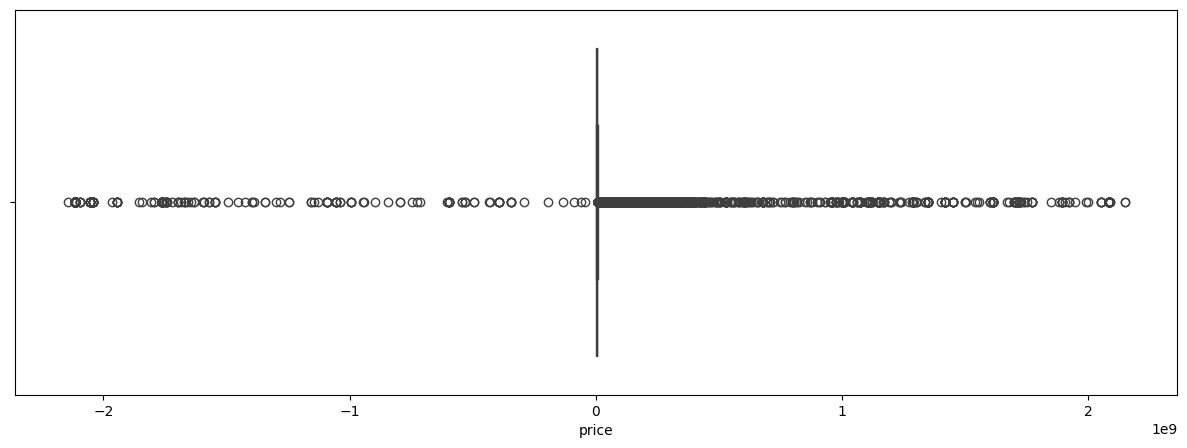

In [109]:
plt.figure(figsize=(15,5))
sns.boxplot(realty['price'], orient='h')

In [110]:
# проверяем значения price на отрицательные значения и значения = 0, так как они есть на boxplot
realty[realty['price'] <= 0]['price'].count()

333

In [111]:
# У нас 333 отрицательных и нулевых значений. Посмотрим на них повнимательнее

In [112]:
realty_negative = realty[realty['price'] < 0]
print(f" Минимальное значение: {realty_negative['price'].min()}, максимальное значение: {realty_negative['price'].max()}")

 Минимальное значение: -2144967296, максимальное значение: -44967296


Отрицательные значения цены колеблются от почти 45 млн до 2,1 млрд, что очень много. Можно предположить, что это небольшое кол-во данных - просто ошибка , и поставить модуль. Но тогда эти значения могут стать выбросами, так как для некоторых регионов они очень велики. И так как их немного (<0,007%), то примем решение об их удалении

In [113]:
realty = realty[realty['price'] > 0]
# строки с отрицательной ценой удалены

<Axes: xlabel='price'>

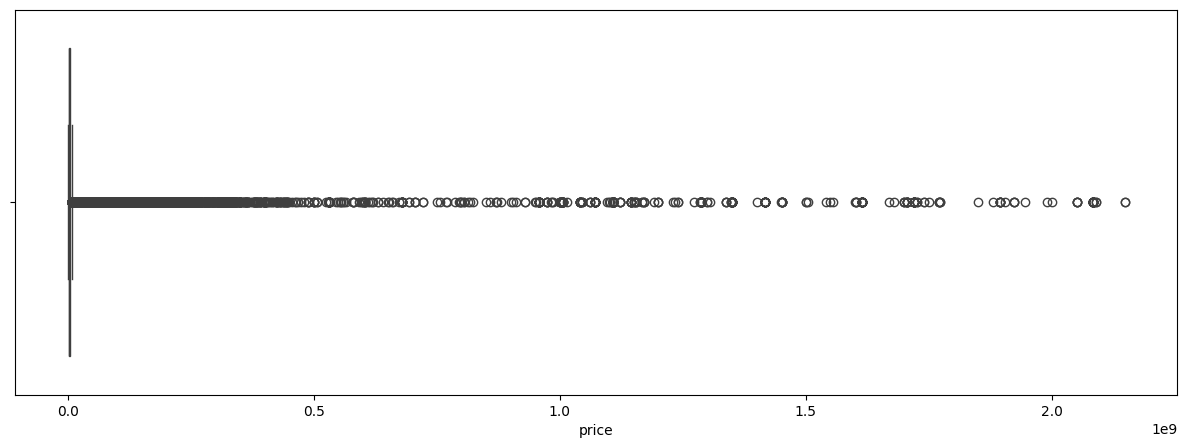

In [114]:
plt.figure(figsize=(15,5))
sns.boxplot(realty['price'], orient='h')

#### Посмотрим выбросы для каждого региона:

In [115]:
# plt.figure(figsize=(10, 20))  # Уменьшаем ширину и увеличиваем высоту
# sns.boxplot(data=realty, y='reg_name', x='price', showfliers=True, orient='h')
# plt.title('Распределение цен по регионам (выбросы)', fontsize=16)
# plt.xlabel('Цена (руб.)', fontsize=12)
# plt.ylabel('Регион', fontsize=12)
# plt.tight_layout()
# plt.show()

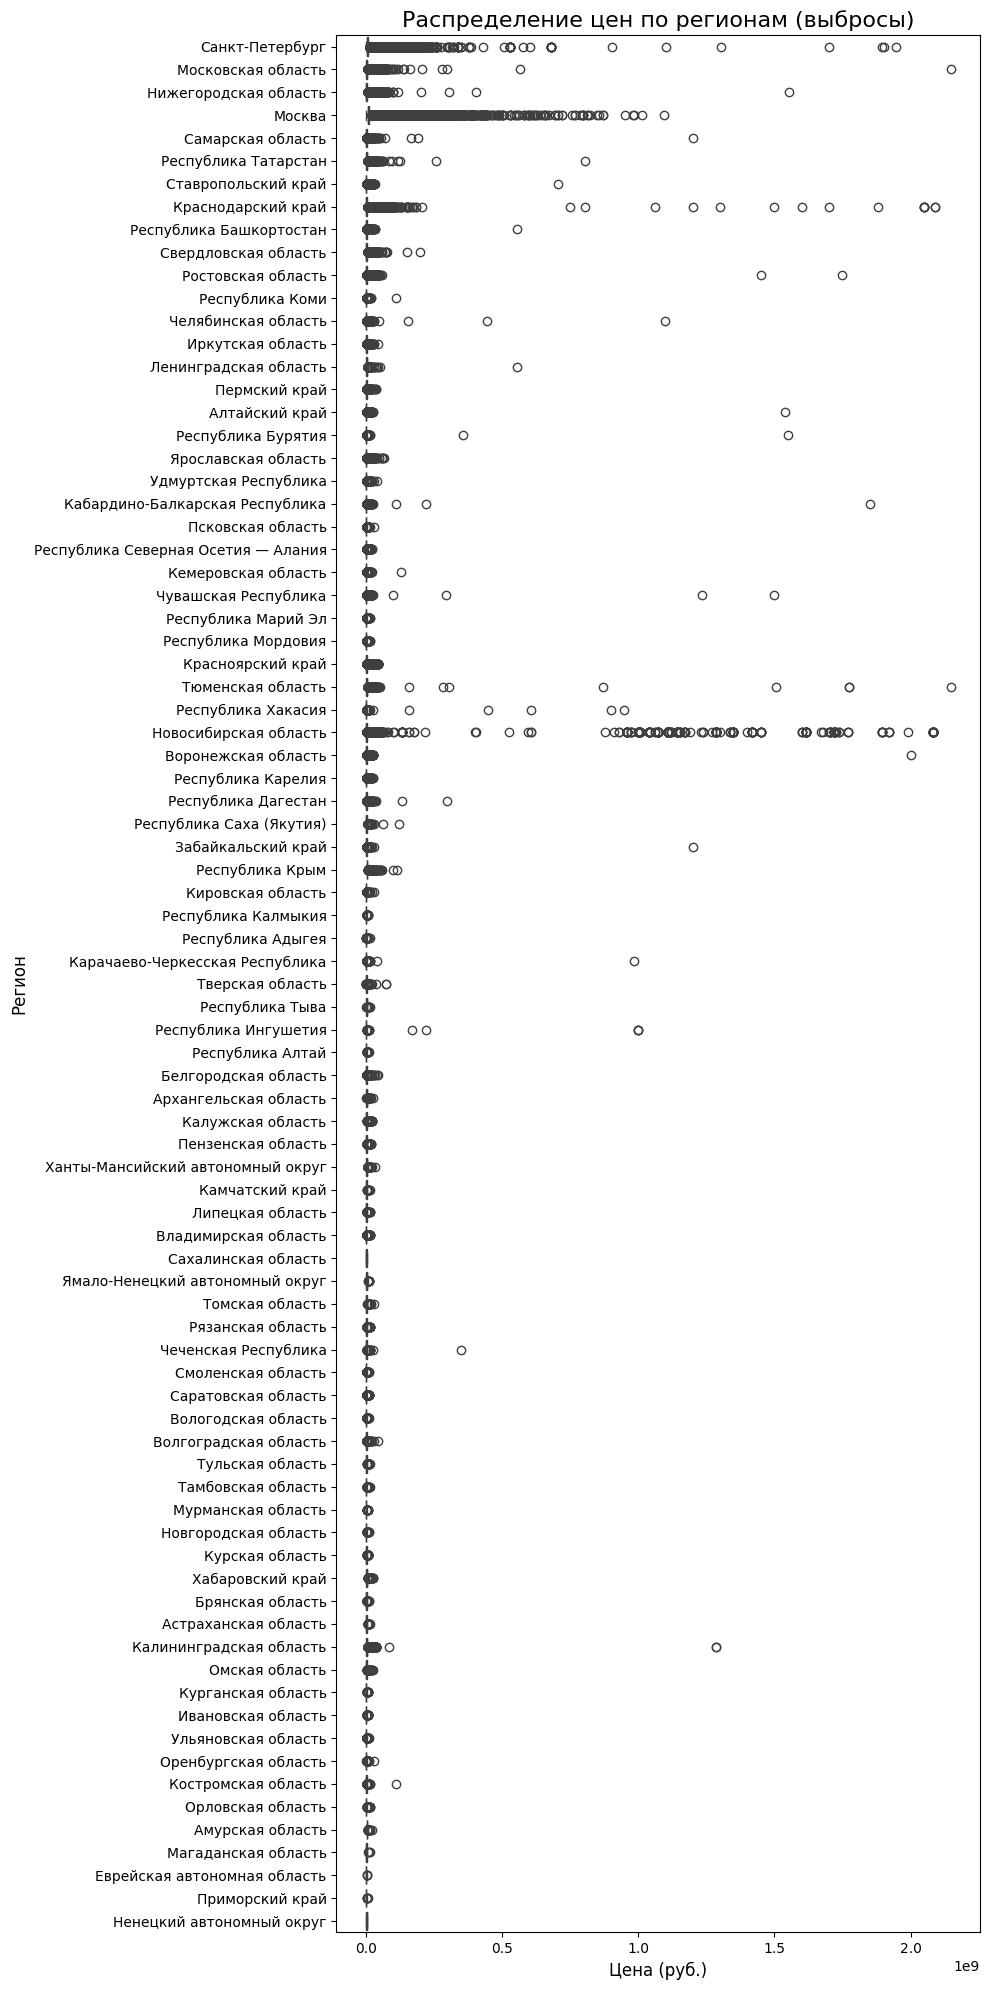

Что мы здесь видим? Кажется что есть очень много выбросов, особенно в таких регионах как:
- Москва
- МО
- Ленинградская область
- Санкт-Петербург
- Нижегородская обл
- Краснодарский край
- Новосибирская область

Также есть множество других более точечных выбросов.

#### Найдем цену за м^2 для каждой квартиры и с учетом всех параметром определим разумные пределы для цены и сможем почистить выбросы

In [116]:
# добавляем столбец price_per_m2 (цена за метр квадратный)
realty['price_per_m2'] = realty['price'] / realty['area']

In [117]:
realty.sample(3)

price       date  code  building_type  level  levels  rooms  area  \
2165698  1700000 2019-08-06  2843              3      1       3      2    41   
644720   1460000 2018-12-07  6817              1      7       9      1    33   
5099936  2600000 2021-04-12  3230              2     10      22      1    37   

         kitchen_area  object_type            reg_name  price_per_m2  
2165698             7            0  Краснодарский край        41,463  
644720              8            0      Алтайский край        44,242  
5099936            10            1  Ростовская область        70,270

При первой попытке появились отрицательные значения. В этой попытке их обработаем. Отрицательные значения для нижней границы (lower_bound) появляются, если:

- Квартильные значения низкие: Если распределение цен за квадратный метр скошено в сторону низких значений, 1-й квартиль (q1) становится небольшим, а межквартильный размах (iqr) увеличивает отрицательное значение границы.
- Широкий разброс значений: Если цены сильно варьируются, нижняя граница может уйти в отрицательные значения, особенно в регионах с очень низкими ценами.

In [118]:
# import matplotlib.ticker as ticker

# plt.figure(figsize=(12, 20))

# sns.boxplot(
#     data=realty, 
#     y='reg_name', 
#     x='price_per_m2', 
#     showfliers=True,  # Показываем выбросы
#     orient='h'        # Горизонтальная ориентация
# )

# #формат оси X для отображения цен в рублях
# plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'.replace(',', ' ')))

# # настройки графика
# plt.title('Боксплот цен за квадратный метр по регионам (выбросы)', fontsize=16)
# plt.xlabel('Цена за м² (руб.)', fontsize=12)
# plt.ylabel('Регион', fontsize=12)
# plt.tight_layout()

# plt.show()

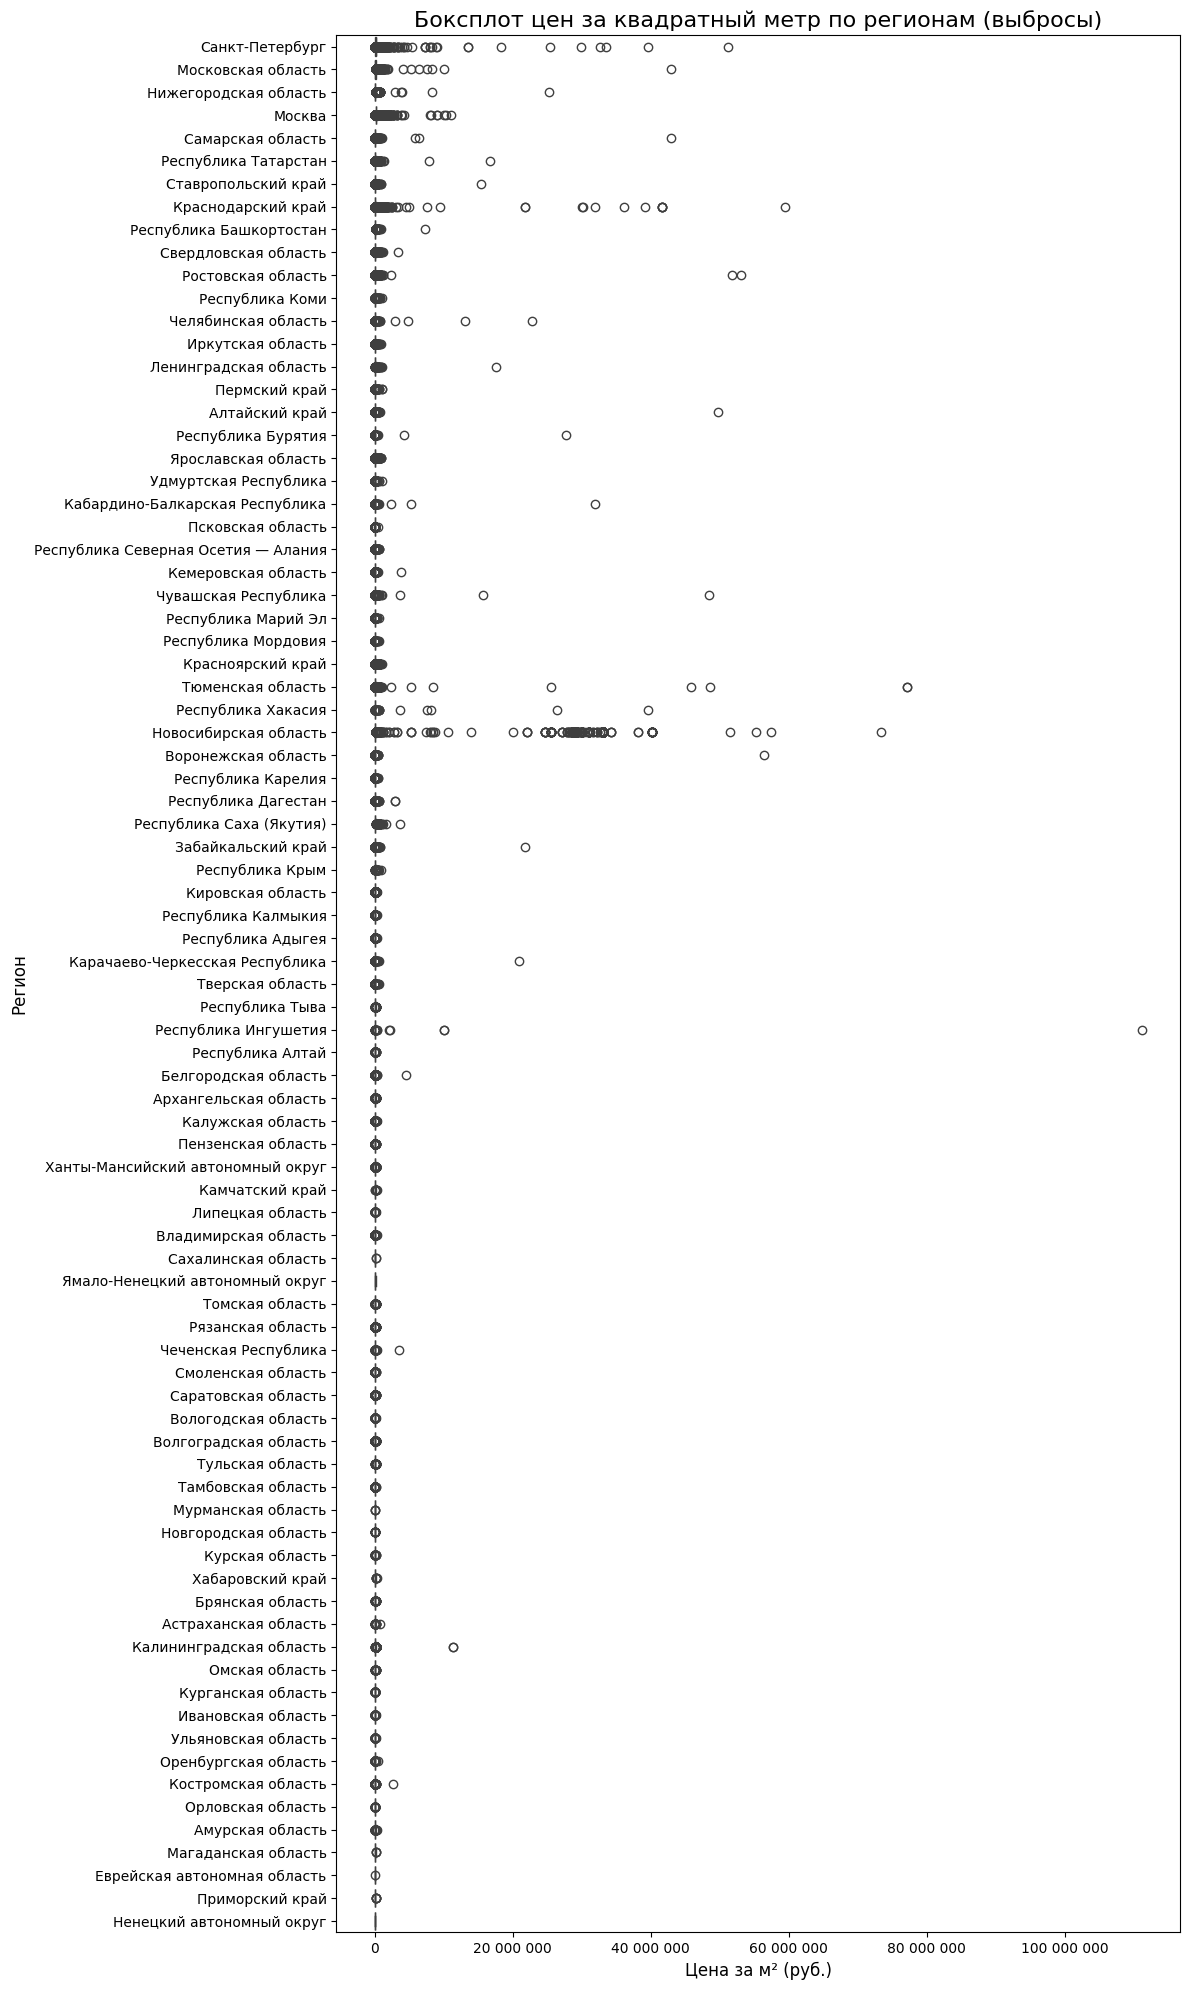

Посмотри цены за м^2 на сайте циан

##### Санкт-Петербург и ЛО:
По запросу площадь квартиры менее 20000 руб/м^2 было найдено 93 объявления. Цена от 225 и следующая от 2500, это все доли. Также снова были найдены доли. Максимум 1,5 млн.руб/м^2
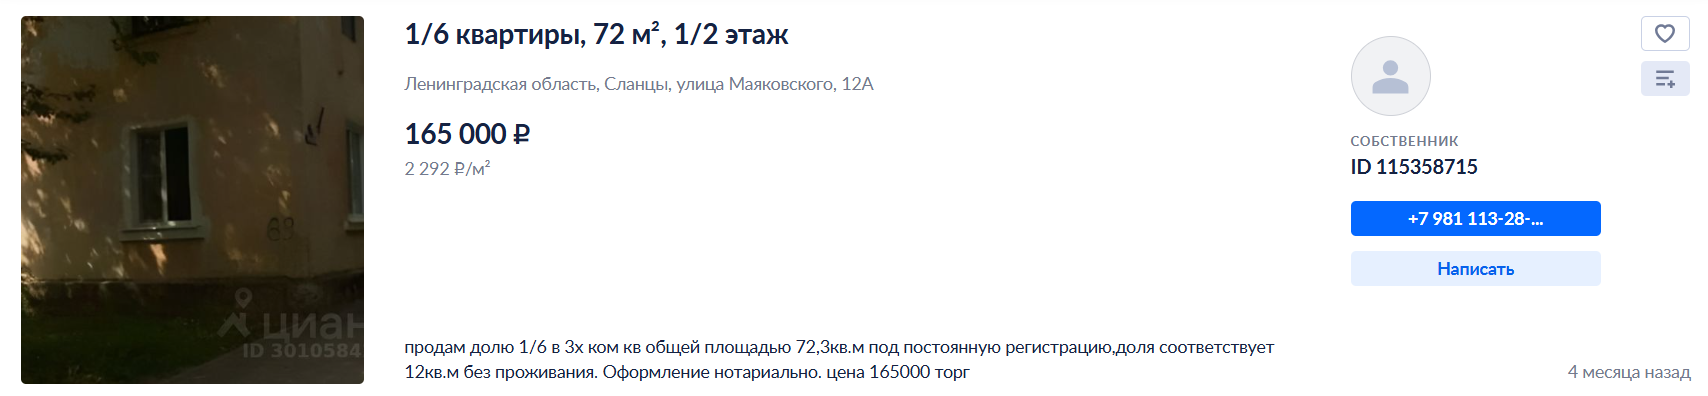


##### Москва и МО:
В Москве по такому запросу было найдено около 36 объявлений (опять же доли). Самая минимальная цена это 1600 руб/м^2. Цены от 2,5 до 7,5 млн. руб. При цене более 3 млн.руб/м^2 видим 294 объявления элитного жилья.


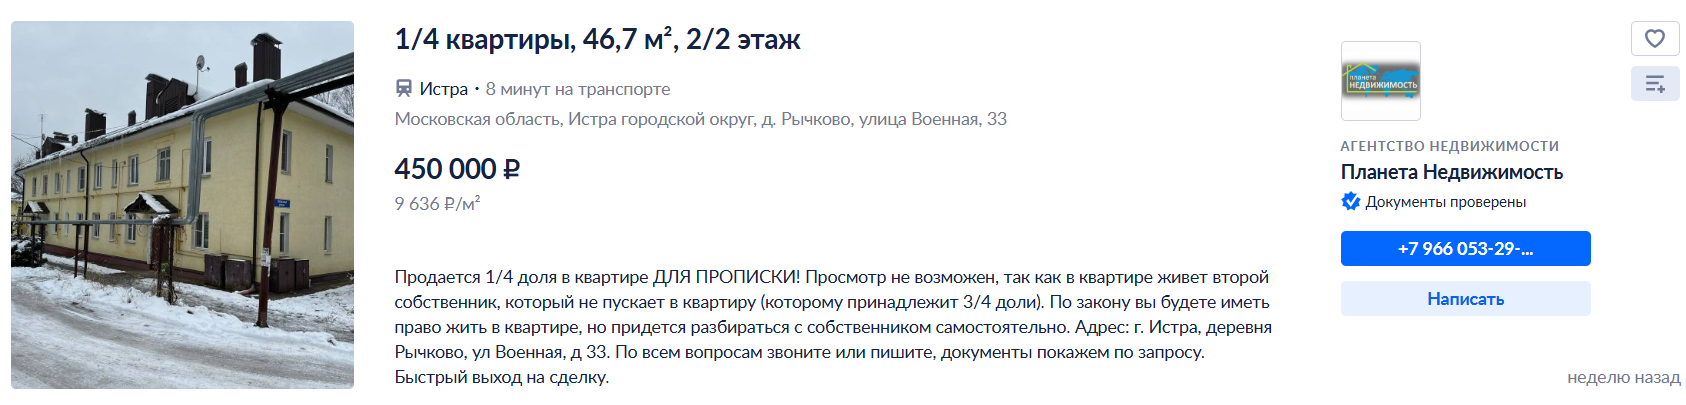


Исходя из анализа цен за квадратный метр на сайте Циан, для Москвы и Санкт-Петербурга, можно сделать вывод, что записи с очень низкими значениями (менее 20,000 руб/м²) в основном связаны с долями в квартирах, а не полноценными объектами недвижимости.

Посмотрим и для других регионов:
    
    - Новосибирская область: порог 6500 минимум, 600000 максимум
    - Красноярский край: порог 3500 минимум, 300000 максимум

### Регионы с определенными границами:
#### Москва и Санкт-Петербург:

Минимум: 20,000 руб/м².
Максимум:
Санкт-Петербург — 1,500,000 руб/м².
Москва — 3,000,000 руб/м² (для основной выборки).

#### Новосибирская область:

Минимум: 6,500 руб/м².
Максимум: 600,000 руб/м².

#### Красноярский край:

Минимум: 3,500 руб/м².
Максимум: 300,000 руб/м².
Остальные регионы:

Определим минимумы и максимумы, ориентируясь на межквартильный размах или добавим дополнительные границы при необходимости.

In [119]:
before_filter_by_region = realty.shape[0]

Кажется что при размахе 1,5 × IQR мы можем удалить слишком много выбросов. Попробуем его увеличить. Вместо стандартного 1,5 × IQR используем более широкий диапазон, например, 2 × IQR. Это позволит сохранить больше данных, оставив только самые экстремальные выбросы.

In [120]:
# теперь для всех оставшихся регионово сделаем с помощью межквартильного размаха
# перепишем функцию
def calculate_limits_with_fixed(group):
    # Ваши фиксированные границы
    region_limits = {
        'Москва': {'min': 20000, 'max': 3000000},
        'Санкт-Петербург': {'min': 20000, 'max': 1500000},
        'Новосибирская область': {'min': 6500, 'max': 600000},
        'Красноярский край': {'min': 3500, 'max': 300000}
    }
    
    region_name = group.name  # Получаем название региона
    
    if region_name in region_limits:
        # Возвращаем фиксированные границы для указанных регионов
        return pd.Series({
            'lower_bound': region_limits[region_name]['min'],
            'upper_bound': region_limits[region_name]['max']
        })
    else:
        # Рассчитываем границы на основе IQR для остальных регионов
        q1 = group['price_per_m2'].quantile(0.25)
        q3 = group['price_per_m2'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = max(q1 - 2 * iqr, 0)  # Нижняя граница не может быть отрицательной
        upper_bound = q3 + 2 * iqr
        return pd.Series({'lower_bound': lower_bound, 'upper_bound': upper_bound})

In [121]:
# границы для всех регионов
region_limits_df = realty.groupby('reg_name').apply(calculate_limits_with_fixed).reset_index()

region_limits_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_3756\934569244.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  region_limits_df = realty.groupby('reg_name').apply(calculate_limits_with_fixed).reset_index()


reg_name  lower_bound  upper_bound
0         Алтайский край            0       88,851
1       Амурская область       14,782      157,579
2  Архангельская область       13,708      133,982
3   Астраханская область            0       98,604
4   Белгородская область        7,309      102,498

In [122]:
# Объединяем границы с realty
realty = realty.merge(region_limits_df, on='reg_name', how='left')

In [123]:
# Проверяем регионы без границ
missing_limits = realty[realty['lower_bound'].isna() | realty['upper_bound'].isna()]['reg_name'].unique()
print(f"Регионы без границ: {missing_limits}")

Регионы без границ: []


In [124]:
realty.sample(3)

price       date  code  building_type  level  levels  rooms  area  \
257257   6250000 2018-10-15  2661              1     16      18      3    80   
5051934  7884946 2021-04-10  2661              2      2      18      1    38   
1550235  1170000 2019-04-26  9654              1      7      10     -1    32   

         kitchen_area  object_type               reg_name  price_per_m2  \
257257             21            0        Санкт-Петербург        78,125   
5051934            12            1        Санкт-Петербург       209,150   
1550235             2            1  Новосибирская область        36,562   

         lower_bound  upper_bound  
257257        20,000    1,500,000  
5051934       20,000    1,500,000  
1550235        6,500      600,000

Результат:
Для 4 регионов используются фиксированные границы.
Для остальных — границы рассчитываются на основе IQR с учетом более широкого диапазона (2 × IQR).
Все регионы должны иметь определенные границы (lower_bound и upper_bound). 

#### Теперь удалим выбросы

In [125]:
# выбросы
realty['is_outlier'] = (realty['price_per_m2'] < realty['lower_bound']) | (realty['price_per_m2'] > realty['upper_bound'])

outliers_count = realty['is_outlier'].sum()
print(f"Количество выбросов: {outliers_count}")

Количество выбросов: 57196


In [126]:
# посчитаем выбросы по регионам
outliers_by_region = realty[realty['is_outlier']].groupby('reg_name')['is_outlier'].count().reset_index()
outliers_by_region.columns = ['reg_name', 'outlier_count']

# регионы с выбросами
outliers_by_region

reg_name  outlier_count
0                      Алтайский край            458
1                    Амурская область             21
2               Архангельская область             58
3                Астраханская область             19
4                Белгородская область            253
..                                ...            ...
75  Ханты-Мансийский автономный округ             59
76                Челябинская область           3290
77               Чеченская Республика             43
78               Чувашская Республика            811
79                Ярославская область           2143

[80 rows x 2 columns]

In [127]:
realty_shape_b = realty.shape[0]

In [128]:
# удалим выбросы (оставляем строки, где is_outlier == False)
realty = realty[~realty['is_outlier']]

In [129]:
print(f"Количество строк до удаления выбросов: {realty_shape_b}")
print(f"Количество строк после удаления выбросов: {realty.shape[0]}")

Количество строк до удаления выбросов: 5200543
Количество строк после удаления выбросов: 5143347


In [130]:
# удалим временный столбец is_outlier
realty.drop(columns=['is_outlier'], inplace=True)

In [131]:
# эти тоже удалим
realty.drop(columns=['lower_bound', 'upper_bound'], inplace=True)

In [132]:
realty.sample(3)

price       date  code  building_type  level  levels  rooms  area  \
2449638  2080000 2019-10-01  9654              1      1       9      1    30   
399200   2600000 2018-11-06  2843              3      4       5      3    65   
1925000  2228200 2019-06-30    81              2      1       6     -1    26   

         kitchen_area  object_type               reg_name  price_per_m2  
2449638             6            0  Новосибирская область        69,333  
399200              7            0     Краснодарский край        40,000  
1925000             2            1     Московская область        84,402

<div style="background-color: AliceBlue; padding: 15px; border-radius: 5px;">
<h2 style="color: black;">Вывод по обработке аномалий в данных:</h2>
    
- Аномалии в столбце level и levels (этаж и этажность дома):

Были удалены строки, где этаж превышает этажность дома.
Для деревянных, блочных и других типов домов с несоответствующей этажностью (например, деревянные дома с более чем 3 этажами) проведена корректировка на основе максимальной реальной этажности.

- Аномалии в столбце rooms (количество комнат):

Обнаружены квартиры с отрицательным количеством комнат (например, -2). Все отрицательные значения заменены их модулями.
Квартиры с количеством комнат > 1 (не считая студий) были удалены, так как такие данные неадекватны.
    
- Аномалии в столбце kitchen_area (площадь кухни):

У квартир, где kitchen_area > area (площадь кухни больше общей площади), значения были заменены местами.
    
- Аномалии в столбце price (цена квартиры):

Удалены строки с отрицательными значениями цены.
Проведен расчет цены за квадратный метр (price_per_m2) и на основе межквартильного размаха (IQR) определены разумные границы для каждого региона.
Для Москвы, Санкт-Петербурга, Новосибирской области и Красноярского края были вручную заданы минимальные и максимальные границы цены за квадратный метр. Для остальных регионов границы рассчитаны на основе данных.
    
- Выбросы по цене за квадратный метр:

Квартиры с ценой за квадратный метр ниже минимального значения или выше максимального (согласно региональным границам) были удалены.
Для более точной очистки использовался расширенный размах 2 × IQR вместо стандартного 1,5 × IQR, чтобы сохранить больше данных и исключить только самые экстремальные выбросы.
    
- Аномалии в общей площади квартир (area):

Были выявлены и удалены объявления с аномально большой площадью, например, более 900 м² для Москвы или более 500 м² для Санкт-Петербурга, так как это были объявления о продаже долей или целых этажей. Квартиры с площадью менее 10 м² были удалены, так как такие данные неадекватны.
    

#### Выводы:

Проведенная очистка данных позволила избавиться от наиболее очевидных аномалий и выбросов, сохранив при этом большую часть адекватных данных.
Финальный датафрейм стал более качественным для анализа, сохраняя значительное количество строк без искажений, вызванных выбросами.
    
#### Результаты:
Общая доля удаленных строк (выбросов) составила 6.09 % (5477006-5143347=333659), если учитывать удаленные дубликаты. Если же смотреть после удаления дубликатов, то общая доля удаленных строк будет еще меньше.
Все ключевые признаки, такие как этажность, количество комнат, площадь и цена, были очищены от аномалий, что делает данные готовыми для дальнейшего анализа.
</div>

### А вот теперь, прежде, чем приступать к анализу, сделаем задание 3 и заполним пропущенные значения в столбце площадь кухни

<a id='30-восстановить-пропуски'></a>
<div style="background-color: lavender; padding: 15px; border-radius: 5px;">
<h1 style="color: black;">3.0 Восстановите пропуски в столбце kitchen_area (после очистки данных). </h1>
</div>

[Вернуться к содержанию](#задачи)

Для начала посмотрим, сколько пропусков осталось после удаления выбросов и очистки данных от аномалий

In [133]:
realty.isna().sum()

price                 0
date                  0
code                  0
building_type         0
level                 0
levels                0
rooms                 0
area                  0
kitchen_area     248148
object_type           0
reg_name              0
price_per_m2          0
dtype: int64

Мы не можем заполнить пропуски просто медианным значением, так как площади кухни зависят от многих факторов, поэтому поступим следующим образом:

Сначала с помощью матрицы корреляций посмотрим, от чего сильнее всего зависит площадь кухни

### Корреляция

Кажется стоит оставить не все признаки. Больше всего 'kitchen_area' зависит от 'area', 'rooms', 

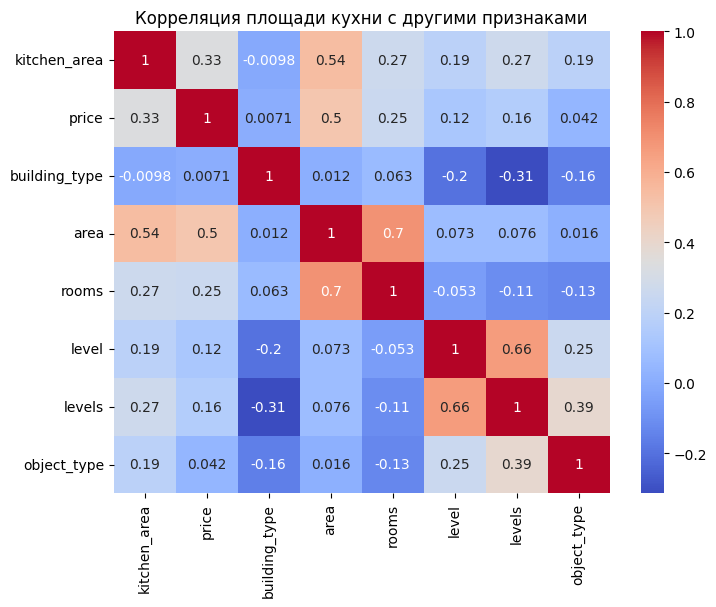

In [134]:
# выбираем числовые признаки
numeric_features = ['kitchen_area', 'price', 'building_type', 'area', 'rooms', 'level', 'levels' , 'object_type']
corr_matrix = realty[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляция площади кухни с другими признаками')
plt.show()

### Анализ матрицы корреляций:

- area (общая площадь): Самая высокая корреляция с kitchen_area (0.54). Это главный признак для заполнения.

- price (цена) — важный уточняющий признак, значимая корреляция (0.33).

- rooms (количество комнат): Умеренная корреляция (0.27). Можно использовать в дополнение к общей площади.

- levels (этажность дома): Умеренная корреляция (0.27). Можно включить для уточнения.

- level (номер этажа): Низкая корреляция (0.19). Его можно опустить, так как он незначительно влияет.

- building_type (тип дома): Практически отсутствует корреляция (-0.0098). Этот признак можно исключить.

- object_type: Низкая корреляция (0.19), но его также можно исключить из-за слабого влияния.



Лучше всего использовать:

- area (общая площадь) — основной признак.

- price (цена) — важный уточняющий признак.

- rooms (количество комнат) — дополнительный уточняющий признак.

- levels (этажность дома) — для более точного заполнения.

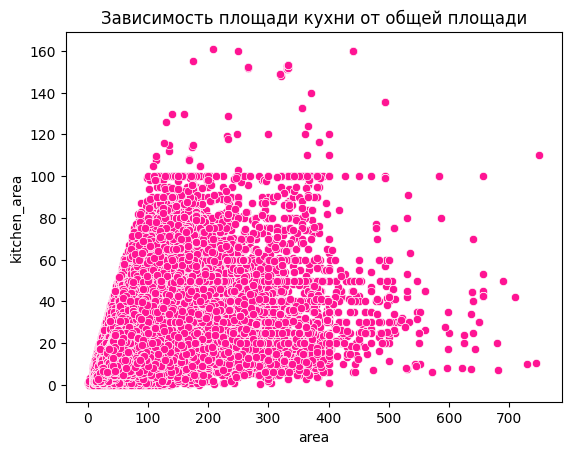

In [135]:
sns.scatterplot(data=realty, x='area', y='kitchen_area', color='deeppink')
plt.title('Зависимость площади кухни от общей площади')
plt.show()

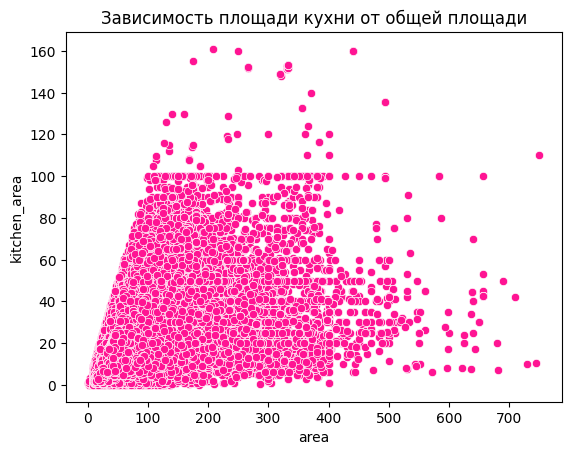

Для заполнения пропусков в столбце kitchen_area, учитывая корреляционную матрицу и scatterplot, наиболее разумным шагом будет заполнение пропусков медианным значением, сгруппированным по коррелирующим признакам. Поскольку корреляция с area (общей площадью) самая сильная, ее стоит использовать как основной фактор. Также добавим price (цена), rooms (количество комнат) и levels (этажность дома) для более точного прогноза.


Для начала такую категорию как кол-во этажей также разобъем на группы, так как  так как в противном случае множество уникальных значений будет усложнять обработку и увеличивать время выполнения

In [136]:
# Создание категорий для levels
realty['levels_group'] = pd.cut(realty['levels'], bins=[0, 1, 5, 15, 39], 
                                labels=['Одноэтажные дома', 'Малая этажность', 'Средняя этажность', 'Многоэтажный дом'], 
                                right=True)

# Создание категорий для rooms
realty['rooms_group'] = pd.cut(realty['rooms'], bins=[-2, 0, 1, 3, 10], 
                               labels=['Студии', 'Однокомнатные', 'Несколько комнат', 'Много комнат'], 
                               right=True)

# Создание категорий для area
realty['area_group'] = pd.cut(realty['area'], bins=[0, 50, 100, realty['area'].max()], 
                              labels=['Маленькая площадь', 'Средняя площадь', 'Большая площадь'], 
                              right=True)

# Заполнение пропусков в kitchen_area
realty['kitchen_area'] = realty.groupby(['levels_group', 'rooms_group', 'area_group'])['kitchen_area'].transform(
    lambda group: group.fillna(group.mean())
)

C:\Users\User\AppData\Local\Temp\ipykernel_3756\3176666366.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  realty['kitchen_area'] = realty.groupby(['levels_group', 'rooms_group', 'area_group'])['kitchen_area'].transform(


In [137]:
realty.sample(3)

price       date  code  building_type  level  levels  rooms  area  \
2021428  2534000 2019-07-16  9654              1      7      10      3    87   
3629068  1650000 2020-06-11  3230              3      5       6      4    62   
4576105  1870000 2020-12-11  5282              1      5       5      3    69   

         kitchen_area  object_type               reg_name  price_per_m2  \
2021428            13            1  Новосибирская область        28,996   
3629068             6            0     Ростовская область        26,613   
4576105             9            0    Челябинская область        27,101   

              levels_group       rooms_group       area_group  
2021428  Средняя этажность  Несколько комнат  Средняя площадь  
3629068  Средняя этажность      Много комнат  Средняя площадь  
4576105    Малая этажность  Несколько комнат  Средняя площадь

In [138]:
# # Проверка оставшихся пропусков
# print(f"Оставшиеся пропуски в kitchen_area: {realty['kitchen_area'].isna().sum()}")

# # Проверка распределения kitchen_area после заполнения
# plt.figure(figsize=(10, 6))
# sns.histplot(data=realty, x='kitchen_area', kde=True, bins=30)
# plt.title('Распределение kitchen_area после заполнения пропусков')
# plt.xlabel('Площадь кухни (кв. м)')
# plt.ylabel('Частота')
# plt.show()

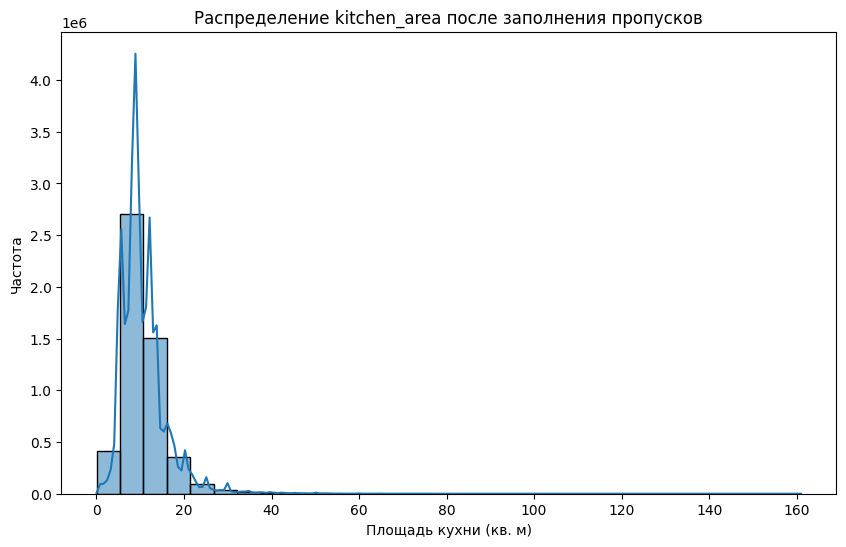

In [139]:
print(f"Пропуски в kitchen_area после заполнения: {realty['kitchen_area'].isna().sum()}")

Пропуски в kitchen_area после заполнения: 0


<a id='41'></a>
<h2 style="color: black;"> 2. Исследуйте рынок недвижимости в РФ за представленный период. Величина исследования - цена за м2 </h2>
</div>

[Вернуться к содержанию](#задачи)

Цель анализа:

Понять, как цена за квадратный метр (price_per_m2) изменяется в зависимости от:

- Времени (динамика цен в разных периодах).
- Регионов (сравнение цен по субъектам РФ).
- Признаков недвижимости (площадь, количество комнат, тип дома и т.д.).

Также проведем корреляционный анализ:

- Построим корреляционную матрицу, чтобы увидеть, какие признаки имеют сильную взаимосвязь с ценой за м².

Регрессионный анализ:

- Построим простую линейную регрессию для предсказания цены за м².
- Проверим значимость факторов с помощью мультиколлинеарности и коэффициентов.
- Визуализация результатов:

Построим графики зависимости между основными факторами и ценой за м².

### Общий анализ:

In [140]:
# посмотрим по всей выборке

mean_price_per_m2 = realty['price_per_m2'].mean()
median_price_per_m2 = realty['price_per_m2'].median()
print(f"Средняя цена за м²: {mean_price_per_m2}, Медианная: {median_price_per_m2}")

Средняя цена за м²: 78716.07373294463, Медианная: 61643.83561643836


<a id='41'></a>
<h3 style="color: black;"> Исследование динамики цен </h3>
</div>

Столбец date уже имеет формат datetime

In [141]:
# создаем новые столбцы для года и месяца
realty['year'] = realty['date'].dt.year
realty['month'] = realty['date'].dt.month
realty.sample()

price       date  code  building_type  level  levels  rooms  area  \
4179209  5900000 2020-09-23  2661              2      2       4      1    35   

         kitchen_area  object_type         reg_name  price_per_m2  \
4179209            14            1  Санкт-Петербург       168,571   

            levels_group    rooms_group         area_group  year  month  
4179209  Малая этажность  Однокомнатные  Маленькая площадь  2020      9

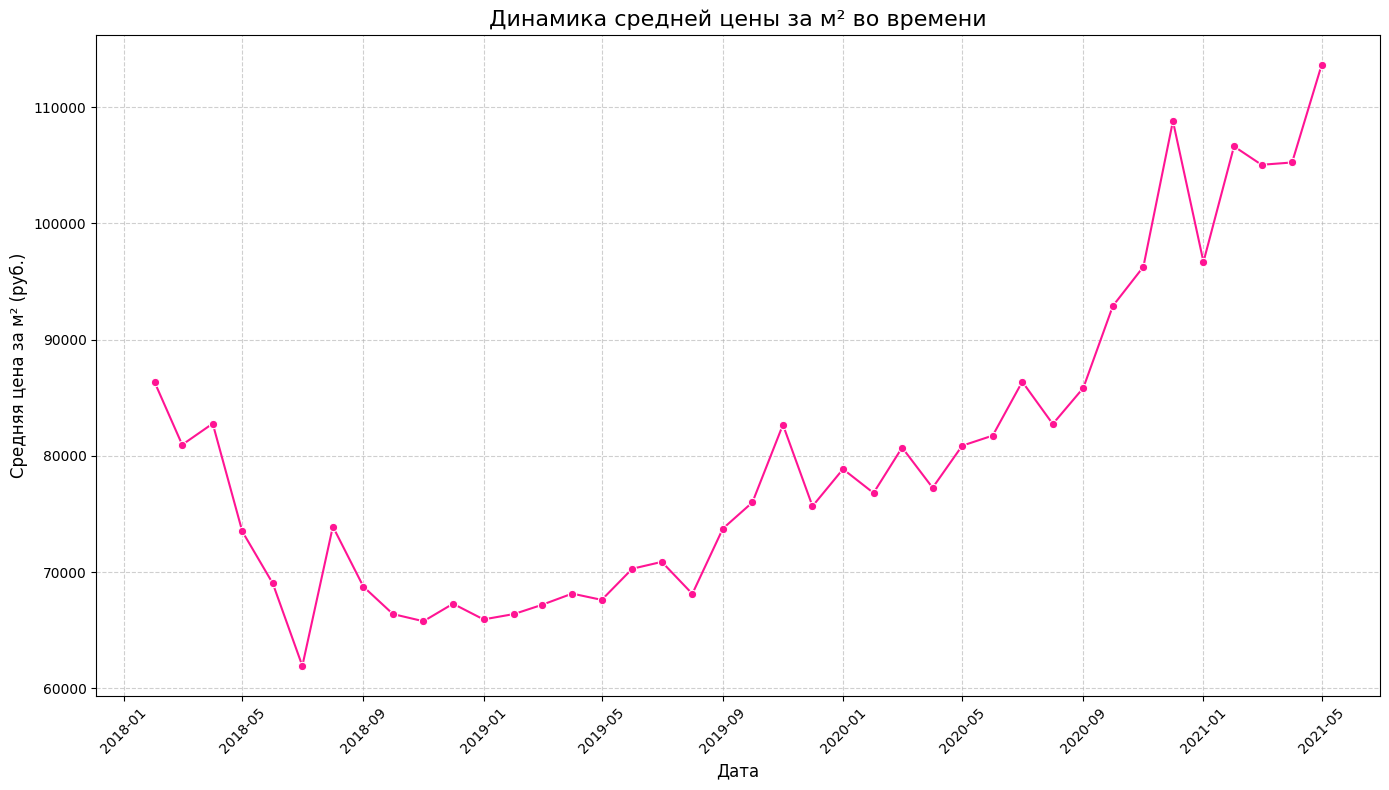

In [142]:
# группировка и расчет средней цены за м^2 по месяцам
monthly_prices = realty.groupby(['year', 'month'])['price_per_m2'].mean().reset_index()
monthly_prices['date'] = pd.to_datetime(monthly_prices[['year', 'month']].assign(day=1))

# график
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_prices, x='date', y='price_per_m2', marker='o', color='DeepPink')

# настройки
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Динамика средней цены за м² во времени', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средняя цена за м² (руб.)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<h4>Вывод по графику "Распределение цен за м² по регионам"</h4>

- Снижение цен в 2018 году:

В первой половине 2018 года наблюдается заметное снижение средней цены за м² с около 87,000 рублей до примерно 60,000 рублей.
Это может быть связано с сезонными факторами или экономическими изменениями в тот период.

- Стабилизация цен в 2019 году:

В течение 2019 года цены на квадратный метр остаются относительно стабильными на уровне 60,000–70,000 рублей, без значительных колебаний.

- Рост цен с 2020 года:

С начала 2020 года наблюдается устойчивый рост цен, который ускоряется ближе к концу года.
К 2021 году цены за м² достигают более 110,000 рублей.
Этот рост может быть вызван повышением спроса, изменениями в законодательстве, или последствиями пандемии COVID-19, когда спрос на жильё в определённых сегментах вырос.

- Пики и спады:

На графике видно несколько коротких спадов (например, в середине 2020 года) и резких подъемов, что может указывать на сезонные колебания или разовые экономические события.


Для более детального анализа изучим различия в динамике цен между регионами.

### Региональный анализ:

In [143]:
# средняя цена за м^2 в каждом регионе
regional_avg_price = realty.groupby('reg_name')['price_per_m2'].mean().sort_values(ascending=False)
regional_avg_price.head(10) # Топ-10 регионов с самыми высокими ценами

reg_name
Москва                              210,001
Санкт-Петербург                     132,484
Московская область                   91,915
Амурская область                     85,375
Республика Крым                      84,909
Ленинградская область                83,330
Ямало-Ненецкий автономный округ      73,407
Архангельская область                73,131
Хабаровский край                     71,883
Ханты-Мансийский автономный округ    70,950
Name: price_per_m2, dtype: float64

Построим боксплот для сравнения цен за м² по регионам:

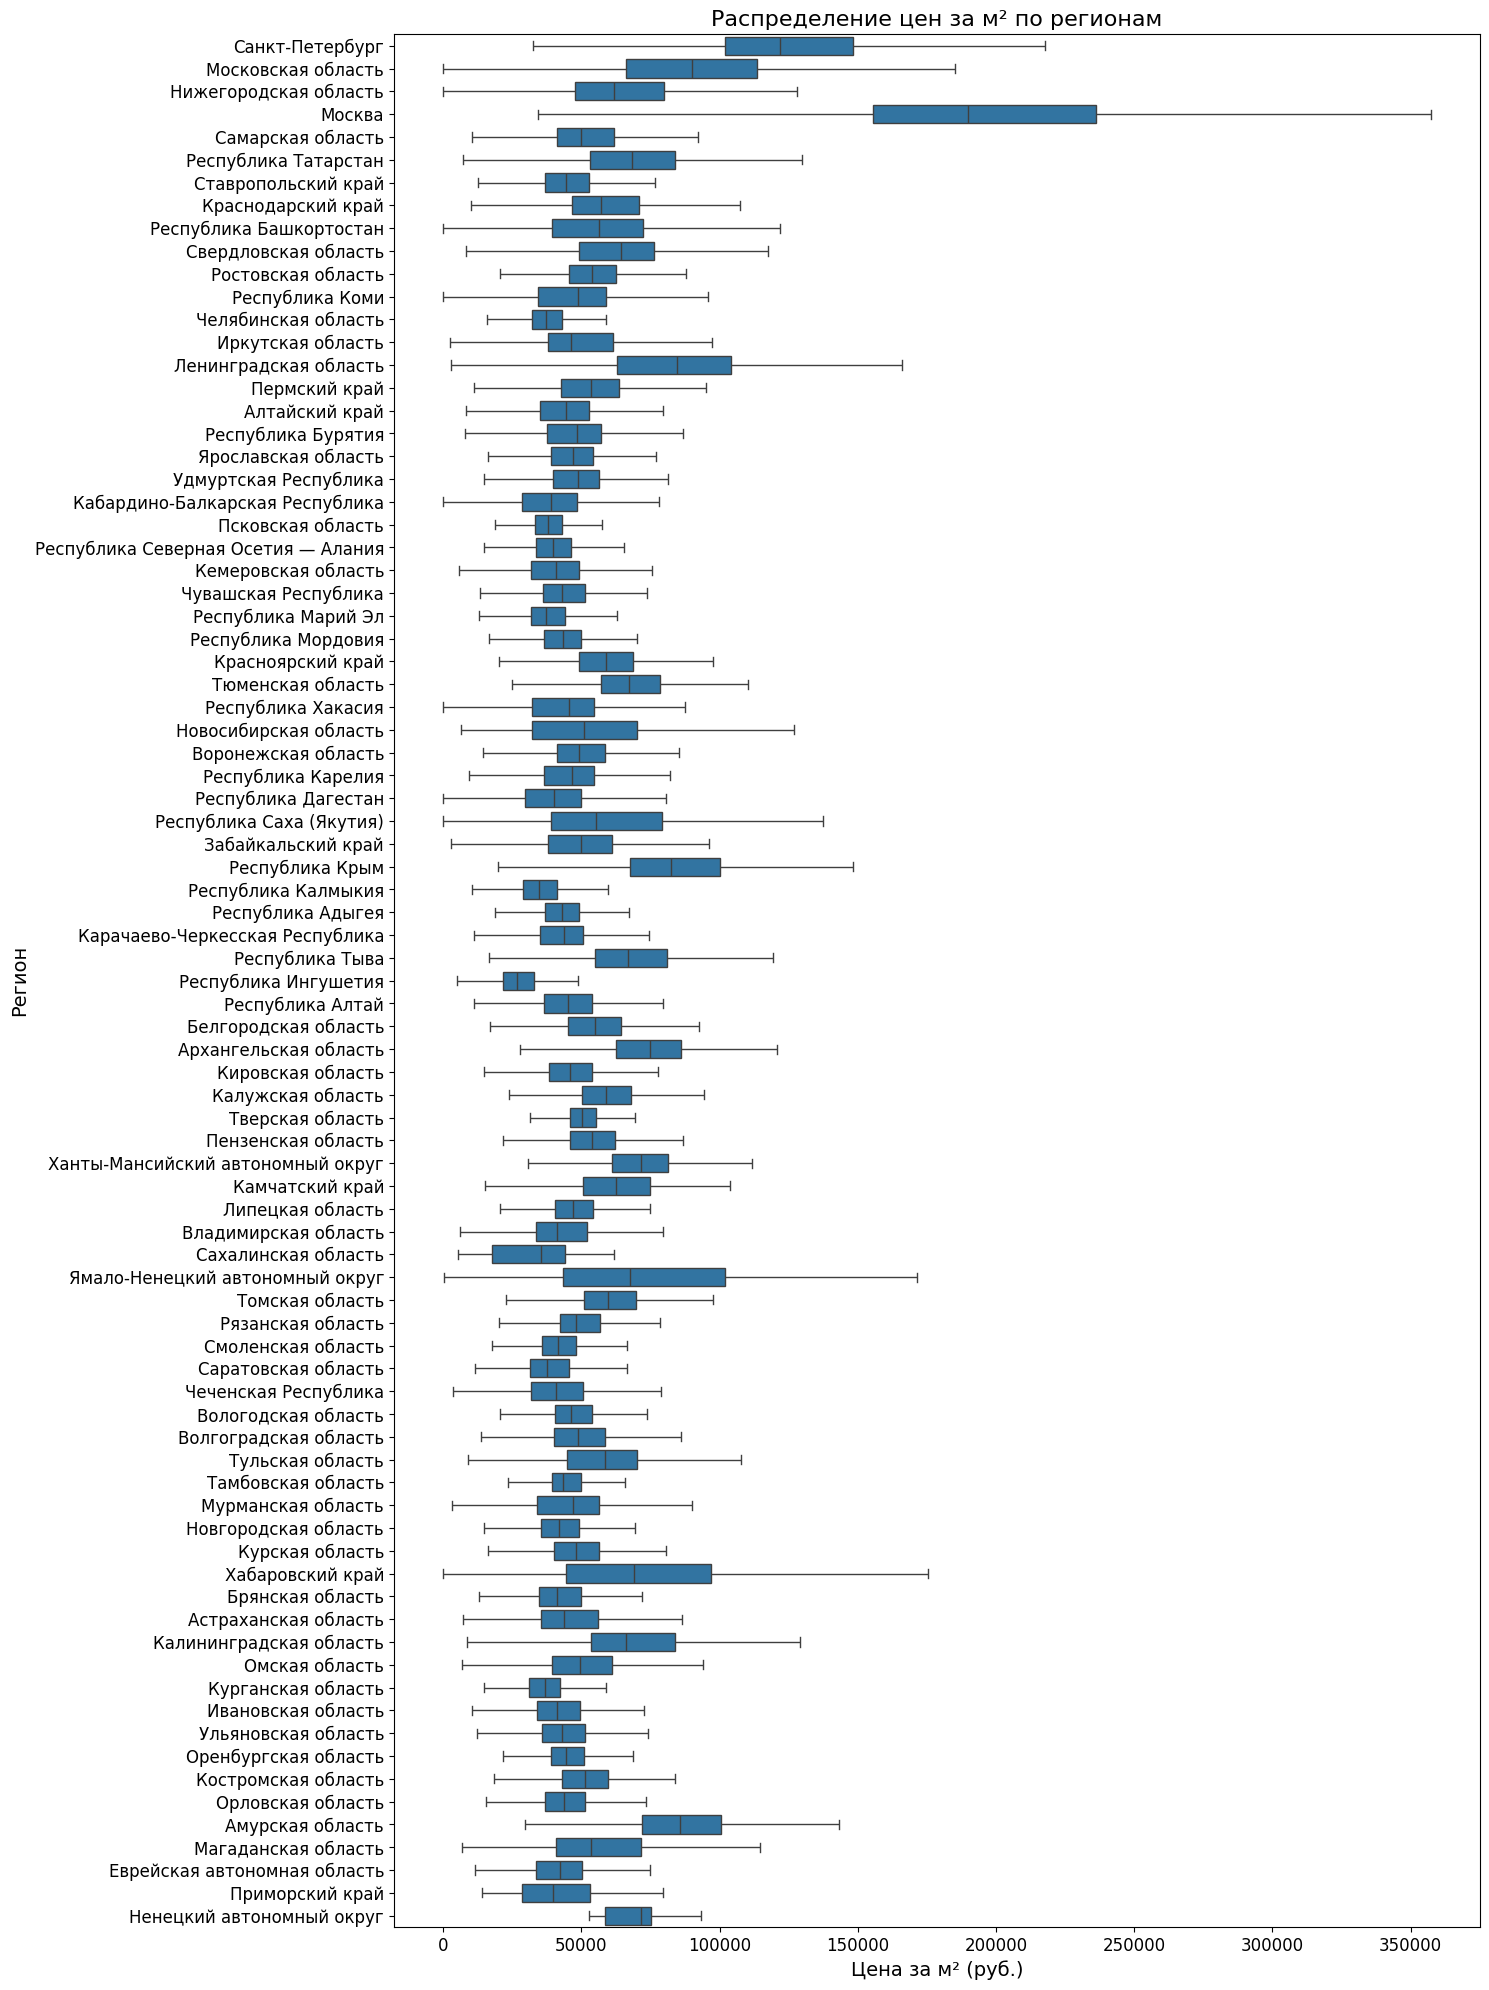

In [144]:
plt.figure(figsize=(15, 20))  # Увеличиваем ширину и высоту графика
sns.boxplot(data=realty, x='price_per_m2', y='reg_name', showfliers=False)
plt.title('Распределение цен за м² по регионам', fontsize=16)
plt.xlabel('Цена за м² (руб.)', fontsize=14)
plt.ylabel('Регион', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)  
plt.tight_layout()
plt.show()

Так как в данных есть выбросы (например, регионы с экстремально высокими ценами, Москва...), используем медиану как основную метрику для разделения регионов на выше/ниже среднего.

C:\Users\User\AppData\Local\Temp\ipykernel_3756\3700189838.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_regions, x='median_price_per_m2', y='reg_name', palette=colors)


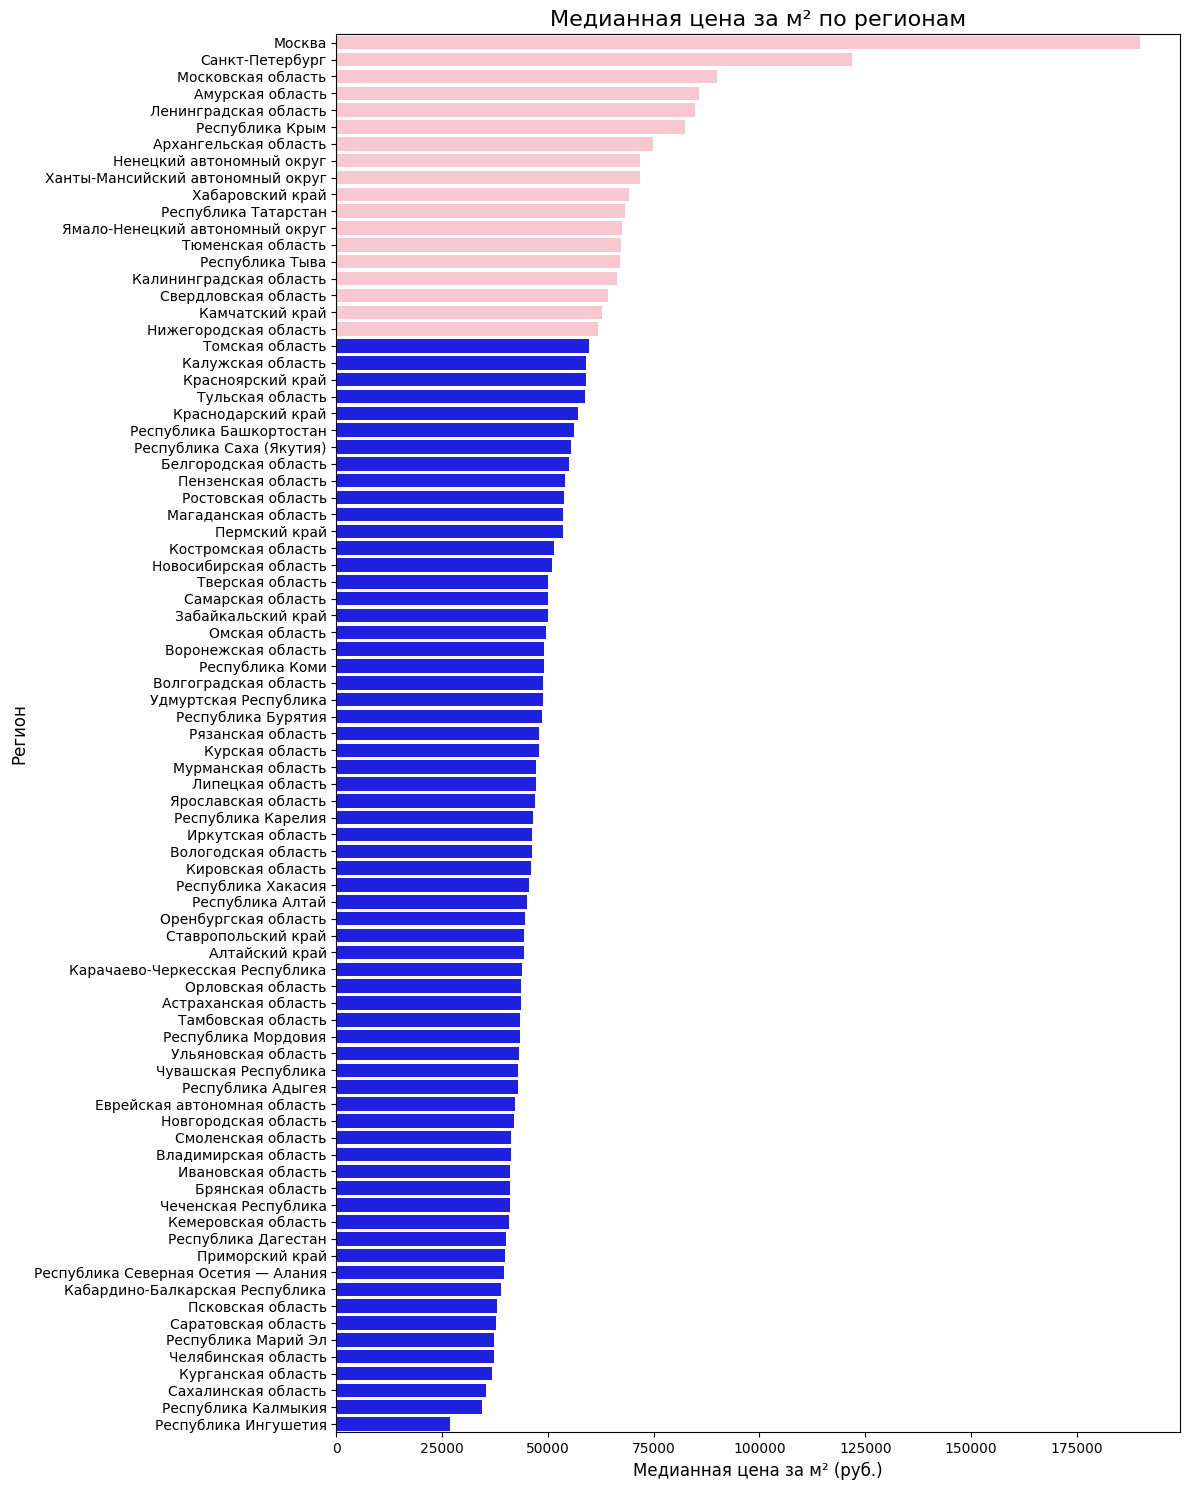

In [145]:
# Рассчитываем медианную цену за м² по регионам
region_prices = realty.groupby('reg_name')['price_per_m2'].median().reset_index()
region_prices = region_prices.rename(columns={'price_per_m2': 'median_price_per_m2'})

# уже рассчитанная медиана
# median_price_per_m2 = realty['price_per_m2'].median() # 61643.83561643836

# Добавляем колонку "above_avg" для отметки выше/ниже общей медианы
region_prices['above_avg'] = region_prices['median_price_per_m2'] > median_price_per_m2

# Берем топ-20 регионов с самой высокой медианной ценой
top_regions = region_prices.sort_values(by='median_price_per_m2', ascending=False).head(83)

# Определяем цвета для баров: розовый - выше медианы, синий - ниже медианы
colors = ['pink' if above else 'blue' for above in top_regions['above_avg']]

# Построение графика
plt.figure(figsize=(12, 15))
sns.barplot(data=top_regions, x='median_price_per_m2', y='reg_name', palette=colors)

# Настройка графика
plt.title('Медианная цена за м² по регионам', fontsize=16)
plt.xlabel('Медианная цена за м² (руб.)', fontsize=12)
plt.ylabel('Регион', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Показываем график
plt.show()


In [146]:
region_prices

reg_name  median_price_per_m2  above_avg
0                    Алтайский край               44,262      False
1                  Амурская область               85,714       True
2             Архангельская область               74,892       True
3              Астраханская область               43,548      False
4              Белгородская область               54,918      False
..                              ...                  ...        ...
78              Челябинская область               37,143      False
79             Чеченская Республика               40,941      False
80             Чувашская Республика               43,027      False
81  Ямало-Ненецкий автономный округ               67,437       True
82              Ярославская область               46,991      False

[83 rows x 3 columns]

<h4>Вывод по графику "Распределение цен за м² по регионам"</h4>

- Москва и Санкт-Петербург:

Москва и Санкт-Петербург имеют самые высокие медианные цены за м².
В Москве диапазон цен за м² значительно шире, что объясняется наличием как элитной недвижимости, так и бюджетных квартир.
Санкт-Петербург демонстрирует более компактное распределение цен, но верхние выбросы всё равно присутствуют.

- Московская и Ленинградская области:

Цены за м² в этих регионах ниже, чем в столицах, но всё же заметно выше среднего по стране.
Московская область имеет большой диапазон, что может быть связано с пригородной недвижимостью.

- Средние цены по регионам:

Большинство регионов демонстрируют умеренные цены, концентрирующиеся в диапазоне от 20 до 50 тысяч рублей за м².
Исключения составляют регионы с развитой инфраструктурой или высокой популярностью для туристов и инвесторов.

- Регионы с низкими ценами:

Некоторые регионы, такие как Республика Алтай, Еврейская автономная область и другие дальневосточные регионы, имеют самые низкие цены за м², что отражает их удалённость и низкий спрос.

In [147]:
# рассчитаем динамику цен для нескольких ключевых регионов (Москва, Санкт-Петербург).

key_regions = ['Москва', 'Санкт-Петербург']
regional_trends = realty[realty['reg_name'].isin(key_regions)].groupby(['reg_name', 'year', 'month'])['price_per_m2'].mean().reset_index()
regional_trends

# Объединяем год и месяц в единую временную метку
regional_trends['date'] = pd.to_datetime(regional_trends[['year', 'month']].assign(day=1))

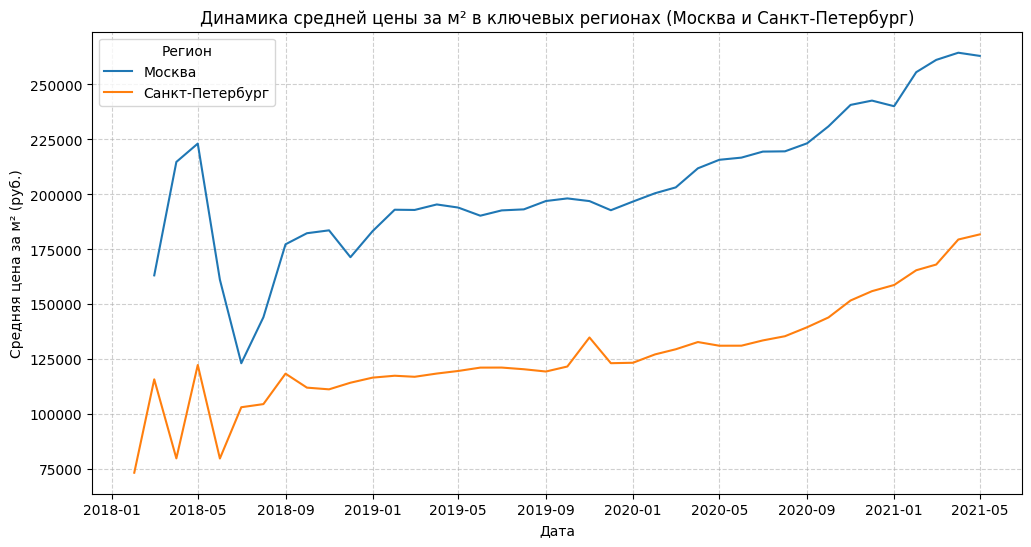

In [148]:
# Строим график с правильной временной шкалой
plt.figure(figsize=(12, 6))
sns.lineplot(data=regional_trends, x='date', y='price_per_m2', hue='reg_name')
plt.title('Динамика средней цены за м² в ключевых регионах (Москва и Санкт-Петербург)')
plt.xlabel('Дата')
plt.ylabel('Средняя цена за м² (руб.)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Регион')
plt.show()

####  Этот график иллюстрирует динамику средней цены за квадратный метр недвижимости в Москве и Санкт-Петербурге с 2018 по 2021 годы.

####  Основные выводы:

- Москва:

Средняя цена за м² в Москве значительно выше, чем в Санкт-Петербурге, что соответствует статусу города как экономического и делового центра.
В начале 2018 года наблюдается резкий скачок, который затем сменяется снижением. После 2019 года цены начинают стабильно расти, с ускорением роста в 2020–2021 годах.

- Санкт-Петербург:

Цены на недвижимость растут более плавно и равномерно по сравнению с Москвой.
Небольшие колебания видны в 2018–2019 годах, а с 2020 года также наблюдается тенденция роста.

### Анализ факторов

#### Тип дома: Сравним цены за м² по типам зданий:

<Axes: xlabel='building_type', ylabel='price_per_m2'>

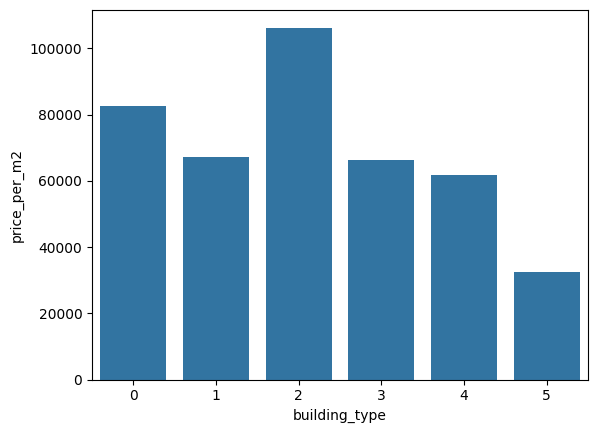

In [149]:
# сгруппируем по типам зданий для просмотра цены за м^2
building_type_prices = realty.groupby('building_type')['price_per_m2'].mean()
building_type_prices
sns.barplot(data=realty, x='building_type', y='price_per_m2', errorbar=None)

С подписями:

C:\Users\User\AppData\Local\Temp\ipykernel_3756\1153133486.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


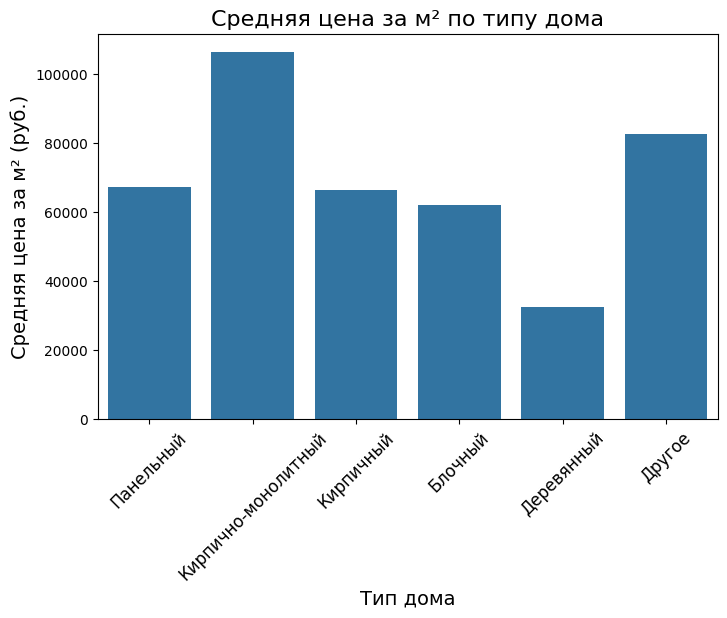

In [150]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=realty,
    x=realty['building_type'].map({
        0: "Другое",
        1: "Панельный",
        2: "Кирпично-монолитный",
        3: "Кирпичный",
        4: "Блочный",
        5: "Деревянный"
    }),
    y='price_per_m2',
    ci=None
)
plt.title('Средняя цена за м² по типу дома', fontsize=16)
plt.xlabel('Тип дома', fontsize=14)
plt.ylabel('Средняя цена за м² (руб.)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

<h4>Анализ графика "Средняя цена за м² по типу дома"</h4>

- Кирпично-монолитные дома:

Обладают самой высокой средней ценой за м² среди всех типов домов.
Это объясняется их современными технологиями строительства, высокой прочностью и популярностью в элитном сегменте жилья.

- Дома типа "Другое":

Второе место по средней стоимости за м².
Возможно, этот тип включает в себя элитные или уникальные объекты недвижимости (пентхаусы, резиденции).

- Кирпичные дома:

Средняя цена за м² находится на третьем месте.
Такие дома популярны благодаря своей долговечности и звукоизоляции, что делает их востребованными на рынке.

- Панельные дома:

Средняя цена за м² ниже, чем у кирпичных и монолитных домов.
Связано с массовой застройкой такого типа жилья в прошлом, ориентированной на экономичный сегмент.

- Блочные дома:

Стоимость за м² ещё ниже.
Это связано с ограниченной высотностью и использованием таких домов преимущественно в бюджетном сегменте.

- Деревянные дома:

Самая низкая средняя стоимость за м².
Деревянные дома, как правило, встречаются в сельских районах или на окраинах городов, что объясняет их доступность. Также могут встречаться в центре некоторых городов как старая застройка.

- Выводы и рекомендации:

Кирпично-монолитные и кирпичные дома — основной сегмент для покупателей, ориентированных на качество и долговечность.

Панельные и блочные дома — экономичный вариант, подходящий для массового покупателя.

О категории другое сказать ничего не можем

#### Количество комнат: Проанализируем зависимость цен за м² от количества комнат:

C:\Users\User\AppData\Local\Temp\ipykernel_3756\4135004737.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=realty, x='rooms', y='price_per_m2', ci=None, color='DeepPink')


<Axes: xlabel='rooms', ylabel='price_per_m2'>

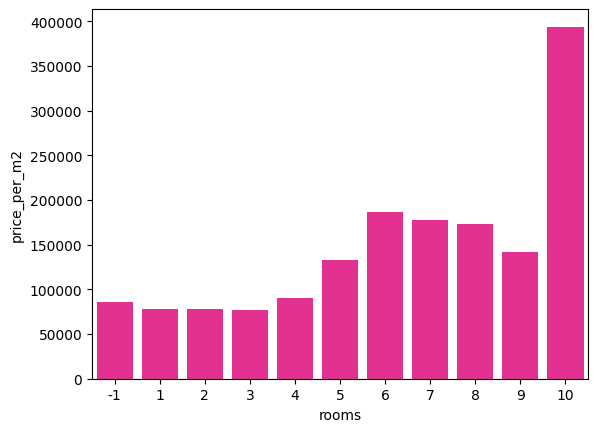

In [151]:
room_prices = realty.groupby('rooms')['price_per_m2'].mean()
room_prices
sns.barplot(data=realty, x='rooms', y='price_per_m2', ci=None, color='DeepPink')

<h4>Анализ графика "Средняя цена за м² по количеству комнат"</h4>

- Студии (значение -1) и однокомнатные квартиры (1):

Самая низкая стоимость за м².
Это связано с массовым характером предложения и доступностью таких квартир, что делает их привлекательными для покупателей с небольшим бюджетом.

- Квартиры с 2–4 комнатами:

Стоимость за м² практически на одном уровне, с небольшим увеличением при росте количества комнат.
Эти квартиры относятся к наиболее востребованному сегменту на рынке жилья для семей.

- Квартиры с 5–6 комнатами:

Наблюдается значительный рост цены за м².
Такие квартиры чаще встречаются в элитных жилых комплексах, что объясняет их высокую стоимость.

- Квартиры с 7–9 комнатами:

Цена стабилизируется на высоком уровне, характерном для элитного сегмента.
Эти квартиры часто имеют уникальные характеристики (например, пентхаусы или апартаменты).

- 10-комнатные квартиры:

Самая высокая цена за м².
Это редкие объекты элитной недвижимости, которые имеют высокую стоимость из-за уникальности и большой площади.

- Выводы:
В общем, цена за м² растёт с увеличением количества комнат, начиная с 5, что указывает на премиум-характер таких объектов.

### Корреляционный анализ

Построить корреляционный анализ или регрессию, чтобы определить, какие признаки (например, площадь, тип дома, год постройки) сильнее всего влияют на цену за м².

#### Корреляционная Матрица Для Числовых Признаков

In [152]:
realty.head(1)

price       date  code  building_type  level  levels  rooms  area  \
0  6050000 2018-02-19  2661              1      8      10      3    83   

   kitchen_area  object_type         reg_name  price_per_m2  \
0            11            0  Санкт-Петербург        73,245   

        levels_group       rooms_group       area_group  year  month  
0  Средняя этажность  Несколько комнат  Средняя площадь  2018      2

Корреляционный анализ:

Построим корреляционную матрицу, чтобы увидеть, какие признаки имеют сильную взаимосвязь с ценой за м².
Регрессионный анализ:

Построим простую линейную регрессию для предсказания цены за м².
Проверим значимость факторов с помощью мультиколлинеарности и коэффициентов.
Визуализация результатов:

Построим графики зависимости между основными факторами и ценой за м².


In [153]:
correlation_matrix = realty[['price_per_m2', 'area', 'kitchen_area', 'rooms', 'level', 'levels']].corr()

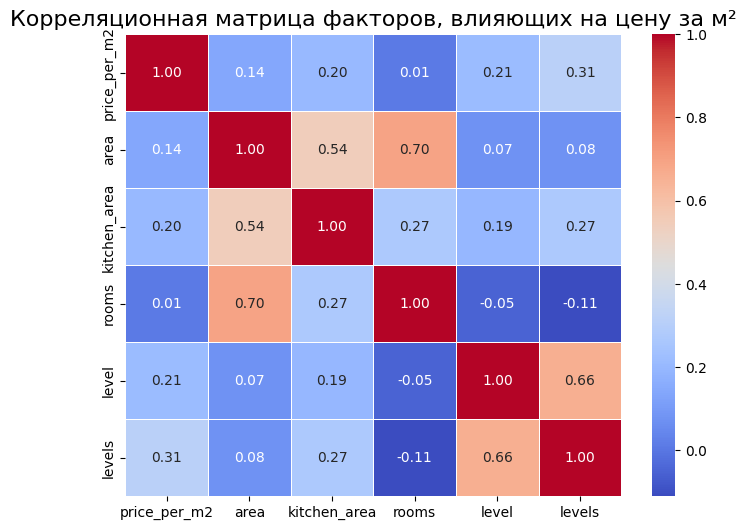

In [154]:
# Построим тепловую карту
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Корреляционная матрица факторов, влияющих на цену за м²', fontsize=16)
plt.show()

<h4>На основании представленной корреляционной матрицы можно сделать следующие выводы: </h4>

- Слабая корреляция с ценой за м² (price_per_m2):

area (0.14) и rooms (0.01) имеют низкую корреляцию с ценой за м². Это указывает на то, что размер квартиры и количество комнат не являются основными факторами, влияющими на стоимость за квадратный метр.
level (0.21) и levels (0.31) показывают чуть более значимую связь, но тоже слабую.

- Умеренная корреляция с ценой за м²:

kitchen_area (0.20) имеет более заметное влияние, что может говорить об особом значении кухни как важного помещения в квартире (к примеру, в некоторых квартирах нет гостиной, тогда семейство выбирает квартиру с просторной кухней для посиделок).

- Сильная корреляция между другими переменными:

area и rooms (0.70) — высокая корреляция, что логично, поскольку квартиры с большим количеством комнат, как правило, имеют большую площадь.
area и kitchen_area (0.54) — кухонная площадь часто пропорциональна общей площади квартиры.
levels и level (0.66) — связь между этажностью здания и этажом квартиры.

- Заключение:
Цена за м² в данном анализе слабо связана с большинством изученных факторов.
Необходимо дополнительно рассмотреть другие параметры (например, расположение, год постройки, которых у нас нет) или использовать более сложные методы, такие как линейная регрессия, для выявления скрытых зависимостей.

### Регрессионный анализ

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [156]:
# выберем данные
x = realty[['area', 'rooms', 'kitchen_area', 'level', 'levels', 'building_type', 'object_type']]
y = realty['price_per_m2']

In [157]:
# Разделяем данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Нормализация признаков
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [158]:
# создадим модель линейной регрессии
model = LinearRegression()

# обучение модели
model.fit(x_train_scaled, y_train)

# предсказание на тестовой выборке
y_pred = model.predict(x_test_scaled)

In [159]:
# оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Коэффициенты регрессии
coefficients = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_
})

# Вывод результатов
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("\nКоэффициенты регрессии:")
coefficients

Mean Squared Error (MSE): 3230577640.071057
R² Score: 0.12901069071561855

Коэффициенты регрессии:


Feature  Coefficient
0           area        7,750
1          rooms       -4,756
2   kitchen_area        4,788
3          level          202
4         levels       19,552
5  building_type        5,054
6    object_type       -3,380

#### А значит:

- Что это: MSE измеряет среднее квадратичное отклонение между предсказанными и реальными значениями.

Показатель, характеризующий среднюю квадратичную ошибку модели. Чем меньше, тем точнее модель. Здесь MSE равен 3230577640.071057, что указывает на значительную ошибку в предсказаниях. 

- R² (коэффициент детерминации) показывает долю дисперсии, объясняемую моделью. Он варьируется от -∞ до 1:

*Значение 1 — модель идеально объясняет данные.*<br>
*Значение 0 — модель не объясняет данные лучше, чем среднее.*<br>
<br>
Наше значение 0,129 показывает, что говорит о слабой способности линейной регрессии объяснять данные.
Это может быть связано с тем, что линейная регрессия не подходит для модели.

- Коэффициенты признаков:

Каждое значение коэффициента показывает, как изменение признака на единицу влияет на целевую переменную (price_per_m2), при прочих равных. Например:

*Увеличение площади на 1 м² увеличивает цену на 7,764 руб..*

*Увеличение количества этажей в доме (levels) на 1 увеличивает цену на 19,521 руб.*

*Однако, количество комнат (rooms) имеет отрицательный коэффициент -4,776, что может быть связано с высокой ценой студий и однокомнатных квартир на квадратный метр.*

#### Почему такие плохие метрики?

- Возможно, в данных остались выбросы, которые сильно влияют на результаты регрессии. Но с основными выбросами мы уже разобрались. 
- Линейная регрессия не подходит: Цена за м² может зависеть от факторов нелинейным образом (например, сильное влияние элитных квартир с высокой ценой)
- Данные могут требовать нормализации или стандартизации.

In [160]:
# Выбираем только нужные признаки
x = realty[['area', 'rooms', 'kitchen_area', 'level', 'levels', 'building_type', 'object_type']]
y = realty['price_per_m2']

# Разделяем данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Нормализация признаков
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [161]:
# pip install catboost
from catboost import CatBoostRegressor

# Инициализация и обучение модели
cat_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_state=42, verbose=0)
cat_model.fit(x_train, y_train)

# Предсказание
y_pred_cat = cat_model.predict(x_test)

# Оценка
mse_cat = mean_squared_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)

print(f"CatBoost - Mean Squared Error (MSE): {mse_cat}")
print(f"CatBoost - R² Score: {r2_cat}")

CatBoost - Mean Squared Error (MSE): 2567400094.660441
CatBoost - R² Score: 0.3078086075480395


In [162]:
# pip install lightgbm
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# Инициализация и обучение модели
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(x_train, y_train)

# Предсказание
y_pred_lgb = lgb_model.predict(x_test)

# Оценка
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM - Mean Squared Error (MSE): {mse_lgb}")
print(f"LightGBM - R² Score: {r2_lgb}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 608
[LightGBM] [Info] Number of data points in the train set: 4114677, number of used features: 7
[LightGBM] [Info] Start training from score 78702.671297
LightGBM - Mean Squared Error (MSE): 2433008847.4103556
LightGBM - R² Score: 0.34404155182534957


#### CatBoost:

- MSE: 2,551,985,993 — это значительно ниже, чем у линейной регрессии, что указывает на лучшее качество предсказаний.
- R² Score: 0.3086 — модель объясняет ~31% вариации в целевой переменной, что всё ещё недостаточно для полной интерпретации, но это уже намного лучше, чем у линейной регрессии.

#### LightGBM:

- MSE: 2,416,132,933 — чуть лучше, чем у CatBoost.
- R² Score: 0.3454 — объясняет ~35% вариации в данных, что лучше, чем CatBoost.

LightGBM, в отличие от линейной регрессии, не нуждается в нормализации признаков. Это связано с тем, что LightGBM использует деревья решений, которые разделяют данные на основе правил сравнения (например, "feature > threshold") и не зависят от масштаба данных.

<a id='5-когда-выгодно'></a>
<div style="background-color: lavender; padding: 15px; border-radius: 5px;">
<h1 style="color: black;">5. Когда выгодно покупать/продавать объект недвижимости? </h1>
</div>

[Вернуться к содержанию](#задачи)

### Для этого стоит определить: 
1. Анализ сезонности

2. Динамика цен во времени

3. Региональный анализ:

В разных регионах динамика цен может отличаться. Сравните временные ряды для крупных городов (например, Москва, Санкт-Петербург, Новосибирск).

3. Корреляция цен с внешними факторами:

Проверьте корреляцию цен с макроэкономическими показателями (например, курс доллара, уровень инфляции, ключевая ставка). Эти данные можно найти в открытых источниках, например, на сайте Центрального Банка РФ.
Выявление аномалий:

Определите аномально высокие или низкие цены, которые могут быть связаны с экономическими событиями, изменениями законодательства или другими факторами.
Калькуляция выгодности:

Сравните стоимость недвижимости за м² в разные месяцы или годы. Например, рассчитайте процентное изменение цен между началом и концом года.
Определите месяцы с минимальными и максимальными ценами.
Шаги выполнения на Python:

### Анализ сезонности:

In [163]:
import calendar

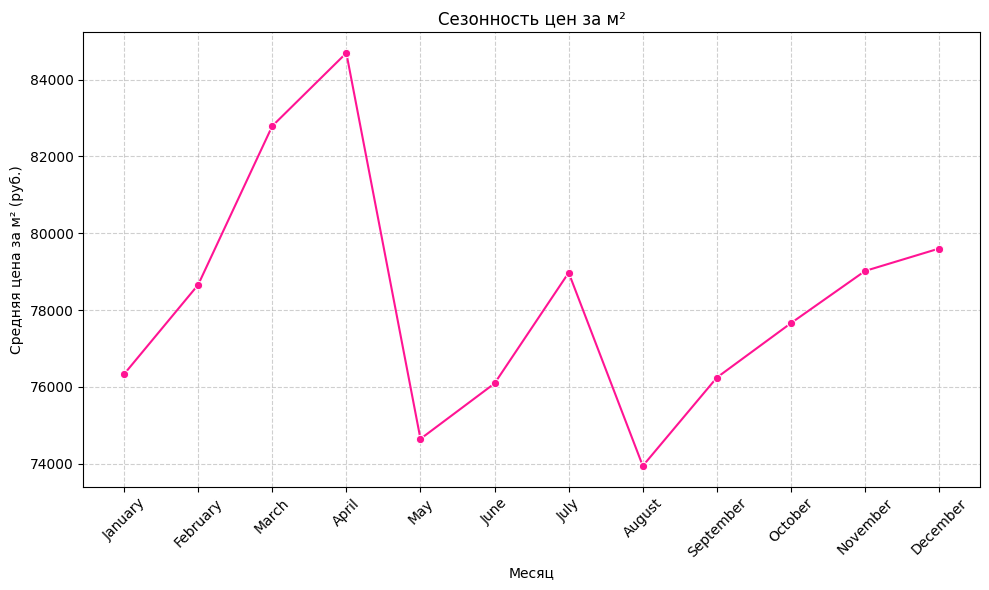

In [164]:
# Группировка по месяцу для анализа сезонности
seasonal_trends = realty.groupby('month')['price_per_m2'].mean().reset_index()

# Построение графика сезонности
plt.figure(figsize=(10, 6))
sns.lineplot(data=seasonal_trends, x='month', y='price_per_m2', marker='o', color='DeepPink')
plt.title('Сезонность цен за м²')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена за м² (руб.)')
plt.xticks(ticks=range(1, 13), labels=calendar.month_name[1:], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Анализ сезонности цен за м²:

#### Весенний пик:

На графике видно, что цены за м² достигают своего пика в апреле. Это может быть связано с увеличением спроса весной, когда люди чаще начинают планировать покупки недвижимости.

#### Летний спад:

Цены значительно падают в мае и достигают минимума в августе. Летний спад объясняется тем, что в это время многие люди находятся в отпусках, и активность на рынке недвижимости снижается.

#### Осенний рост:

С сентября наблюдается постепенный рост цен, который продолжается до конца года. Осень традиционно считается временем активного поиска недвижимости (к примеру, спрос вырастает за счет студентов, которые при переезде покупают квартиру), что увеличивает спрос и, как следствие, цены.

#### Стабильность зимой:

В декабре цены стабилизируются на уровне, несколько ниже, чем весной, что может быть связано с меньшим количеством сделок из-за праздников, завалов на работе и т д.

#### Вывод:
- Когда выгодно покупать:
Покупка недвижимости выгоднее всего в летний период, особенно в августе, либо же в мае, когда цены находятся на минимальном уровне.

- Когда выгодно продавать:
Продавать недвижимость лучше всего весной, в апреле, когда наблюдается пик цен.

### Динамика цен во времени:

Данный график уже был построен в пункте 4, при анализе динамики цен за м^2. Там же есть описание графика

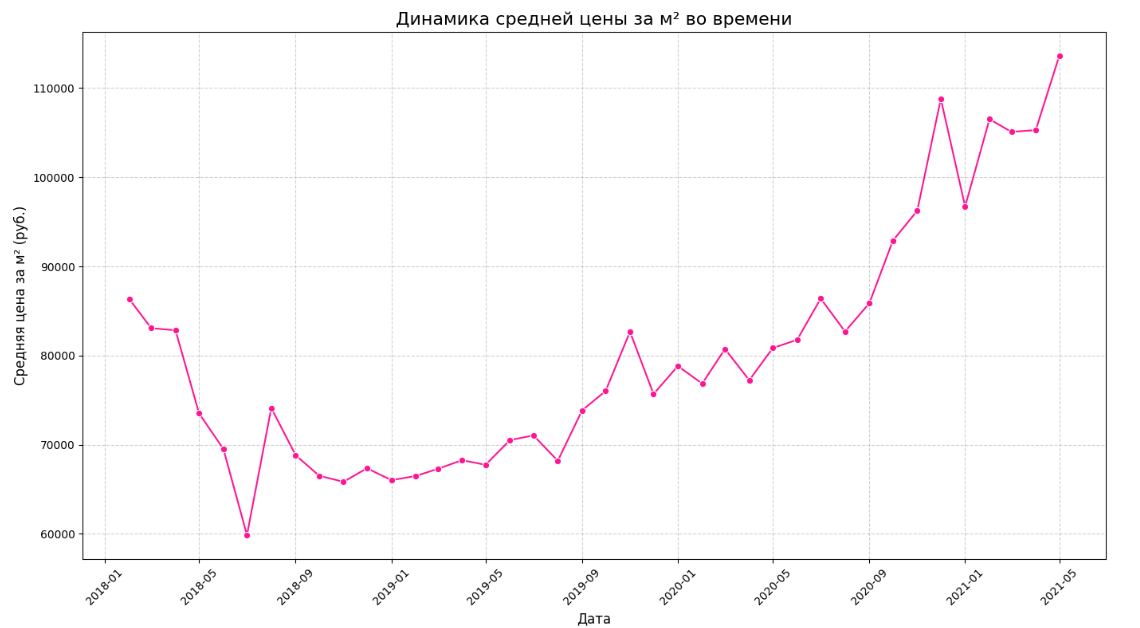

### Когда выгодно покупать:

Лучший период для покупки был весной и летом 2018 года, когда цены достигли минимума.

В 2021 году цены находятся на пике, и стоит ожидать возможной стабилизации или небольшого снижения перед следующим циклом роста.


### Когда выгодно продавать:

Продажа недвижимости наиболее выгодна в периоды роста, например, начиная с конца 2020 года и начала 2021 года, когда цены достигли максимума.

In [165]:
# , color='DeepPink'

### Анализ по ключевым регионам (например, Москва и Санкт-Петербург):

Такой график также уже был построен. Рассмотрим его сточки зрения покупки-продажи

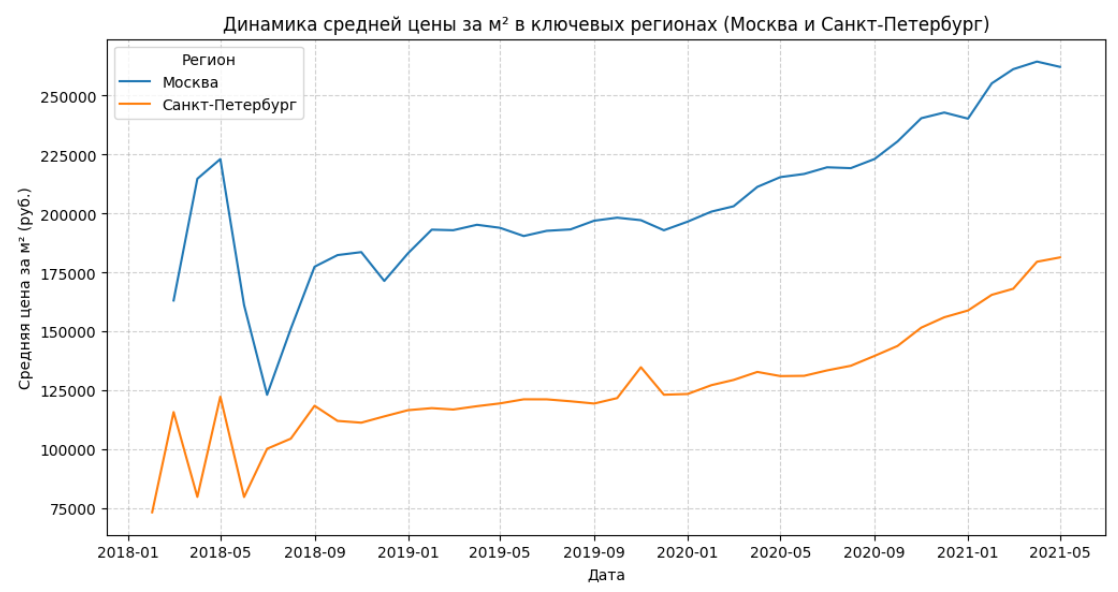

### Вывод:

- Покупка:

Для Москвы наиболее выгодным периодом для покупки было начало 2018 года или относительно стабильный 2019 год.
Для Санкт-Петербурга лучшим временем для покупки были колебания цен в 2018 году.

- Продажа:

В обоих городах период 2020–2021 годов является наиболее выгодным временем для продажи из-за устойчивого роста цен и рекордных показателей средней стоимости за м².

Анализ временных трендов показывает, что рынок в крупных городах подвержен устойчивому росту цен. 

### Расчет выгодности покупки/продажи:

In [166]:
# определим самый дешевый и дорогой месяц для покупки/продажи
min_price_month = seasonal_trends.loc[seasonal_trends['price_per_m2'].idxmin()]
max_price_month = seasonal_trends.loc[seasonal_trends['price_per_m2'].idxmax()]

print(f"Выгодно покупать в месяце: {min_price_month['month']} (средняя цена: {min_price_month['price_per_m2']} руб.)")
print(f"Выгодно продавать в месяце: {max_price_month['month']} (средняя цена: {max_price_month['price_per_m2']} руб.)")

Выгодно покупать в месяце: 8.0 (средняя цена: 73939.0416466736 руб.)
Выгодно продавать в месяце: 4.0 (средняя цена: 84695.90816279591 руб.)


Также видим здесь август и апрель

<div style="background-color: AliceBlue; padding: 15px; border-radius: 5px;">
<h2 style="color: black;">Вывод по исследованию рынка недвижимости: Когда выгодно покупать/продавать объект недвижимости</h2>
    
Когда выгодно покупать: Покупка недвижимости выгоднее всего в летний период, особенно в августе, либо же в мае, когда цены находятся на минимальном уровне.

Когда выгодно продавать: Продавать недвижимость лучше всего весной, в апреле, когда наблюдается пик цен.

</div>

<a id='6-признаки'></a>
<div style="background-color: lavender; padding: 15px; border-radius: 5px;">
<h1 style="color: black;">6. Определите от каких признаков зависит стоимость объекта недвижимости. Найдите скрытые закономерности. </h1>
</div>

[Вернуться к содержанию](#задачи)

Большую часть этого задания мы уже сделали в пункте 4 или 5. Продублируем их с позиции зависимости цены от данных факторов и потом перейдем к скрытым закономерностям

###  Посмотрим на распределение

In [167]:
# # построим гистограмму распределения цены за квадратный метр
# plt.figure(figsize=(10, 6))
# sns.histplot(data=realty, x='price_per_m2', kde=True, bins=50, color='deeppink')
# plt.title('Распределение цены за квадратный метр', fontsize=16)
# plt.xlabel('Цена за м² (руб.)', fontsize=14)
# plt.ylabel('Частота', fontsize=14)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

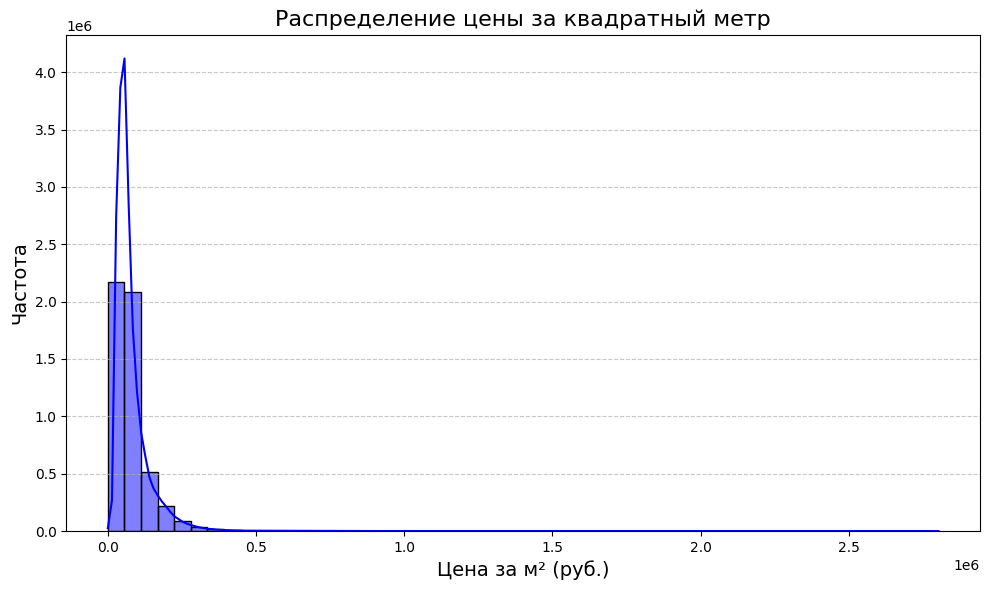

Распределение цен за квадратный метр:

- Смещено влево: Большинство объектов недвижимости имеют цену за квадратный метр в диапазоне от 0 до 200 тысяч рублей.

- Длинный правый хвост: Есть объекты с аномально высокой ценой за квадратный метр (выбросы). Это может быть связано с элитной недвижимостью или нетипичными значениями.

2. Выбросы:
Правый хвост распределения указывает на существование объектов с ценой за квадратный метр значительно выше средней.
Выбросы могут исказить статистический анализ, поэтому их можно либо обработать (например, логарифмической трансформацией), либо исключить из анализа.

3. Плотность распределения:
График с kde показывает, что основная плотность значений сосредоточена в узком диапазоне, что подтверждает явный сдвиг распределения к низким значениям.

Логарифмическая трансформация:

Если вы хотите лучше понять данные, можно выполнить логарифмическую трансформацию price_per_m2. Это сожмет распределение и упростит выявление закономерностей.

## 1. Зависимость стоимости от количественных признаков

### Как цена м^2 зависит от даты 

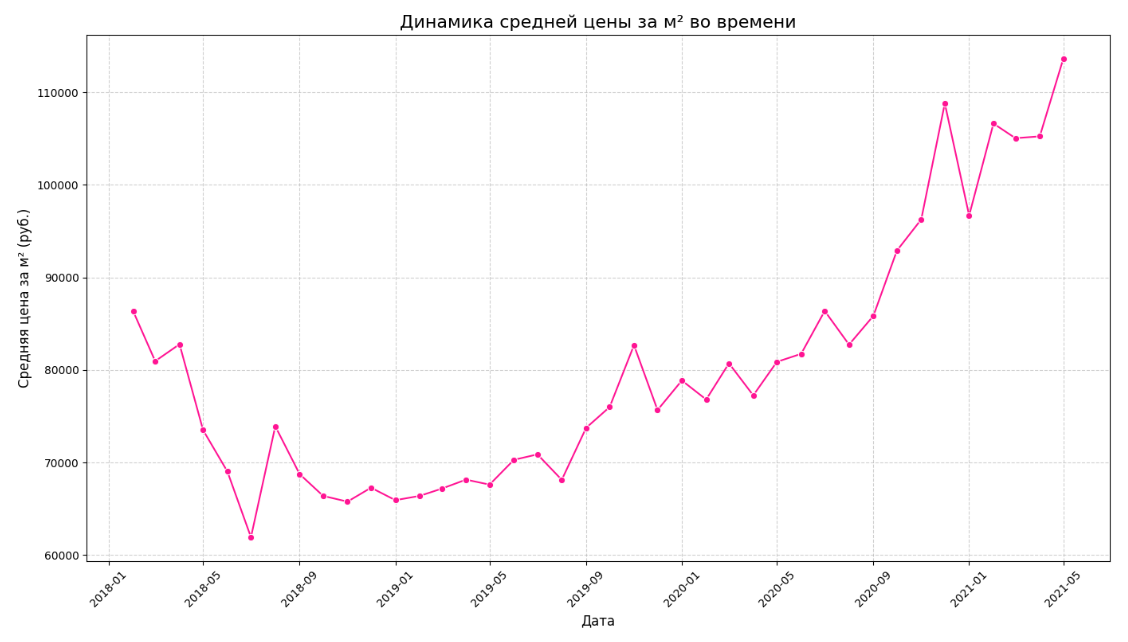

### Как цена за м^2 зависит от типа здания

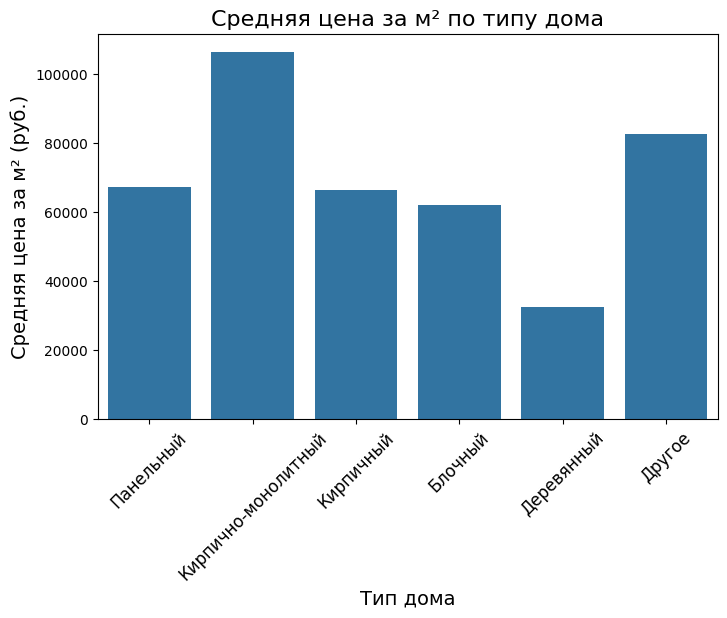

### Как цена за м^2 зависит от кол-ва комнат

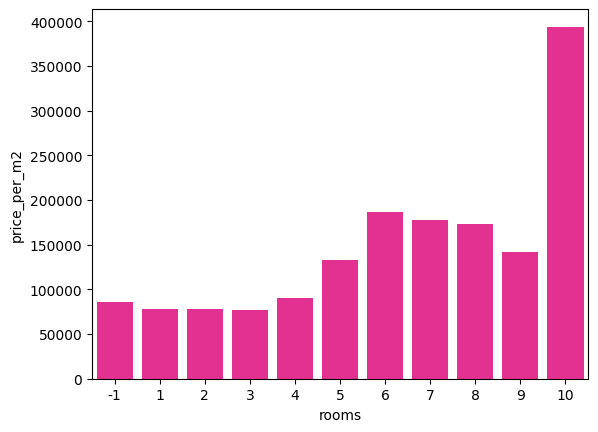

### Вывод по данным 3 графиков:

#### - Как цена за м² зависит от даты:

На первом графике видно, что цены за м² имеют ярко выраженную тенденцию к росту, особенно начиная с середины 2020 года. После некоторого снижения в 2018 году наблюдается стабильный рост, что говорит о влиянии макроэкономических факторов, таких как инфляция и рост спроса на недвижимость.

#### - Как цена за м² зависит от типа здания:

Тип здания играет значительную роль: здания кирпично-монолитного типа имеют наибольшую среднюю стоимость за м², тогда как деревянные здания стоят существенно дешевле. Это объясняется качеством материалов и престижностью таких зданий.

#### - Как цена за м² зависит от количества комнат:

Цена за м² увеличивается с ростом количества комнат до определенного момента (6–7 комнат). Однако затем стоимость за м² уменьшается для объектов с 8 и более комнатами, вероятно, из-за уменьшения спроса на такие крупные объекты.

### Снова обратимся к корреляционной матрице 

Посмотрим, как цена зависит от разных факторов

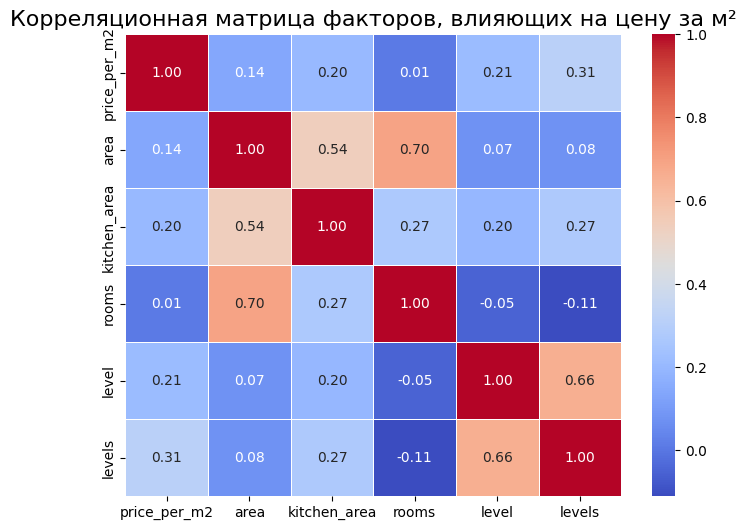

### Вывод:

- Слабая зависимость от площади (area, корреляция 0.14):

Цена за м² слабо увеличивается с ростом общей площади. Это может быть связано с тем, что более крупные объекты имеют меньший спрос, особенно на рынке элитной недвижимости.

- Кухонная площадь (kitchen_area, корреляция 0.20):

Умеренная положительная зависимость. Увеличение площади кухни может быть связано с улучшением общего качества жилья.

- Количество этажей в здании (levels, корреляция 0.31):

Положительная зависимость. Более высокие здания, как правило, более современные, что повышает стоимость за м².

- Этаж квартиры (level, корреляция 0.21):

Цена за м² может увеличиваться для квартир на средних этажах, которые считаются более удобными.

- Количество комнат (rooms, корреляция 0.01):

Практически отсутствует влияние. Возможно, это связано с тем, что стоимость за м² зависит больше от общей площади, чем от количества комнат.

#### Вывод: 
Стоимость за м² больше всего зависит от таких признаков, как количество этажей в здании, площадь кухни и общий этаж квартиры. Остальные факторы оказывают слабое влияние на цену.

## 2. Зависимость стоимости от категориальных признаков

### Как цена м^2 зависит от региона

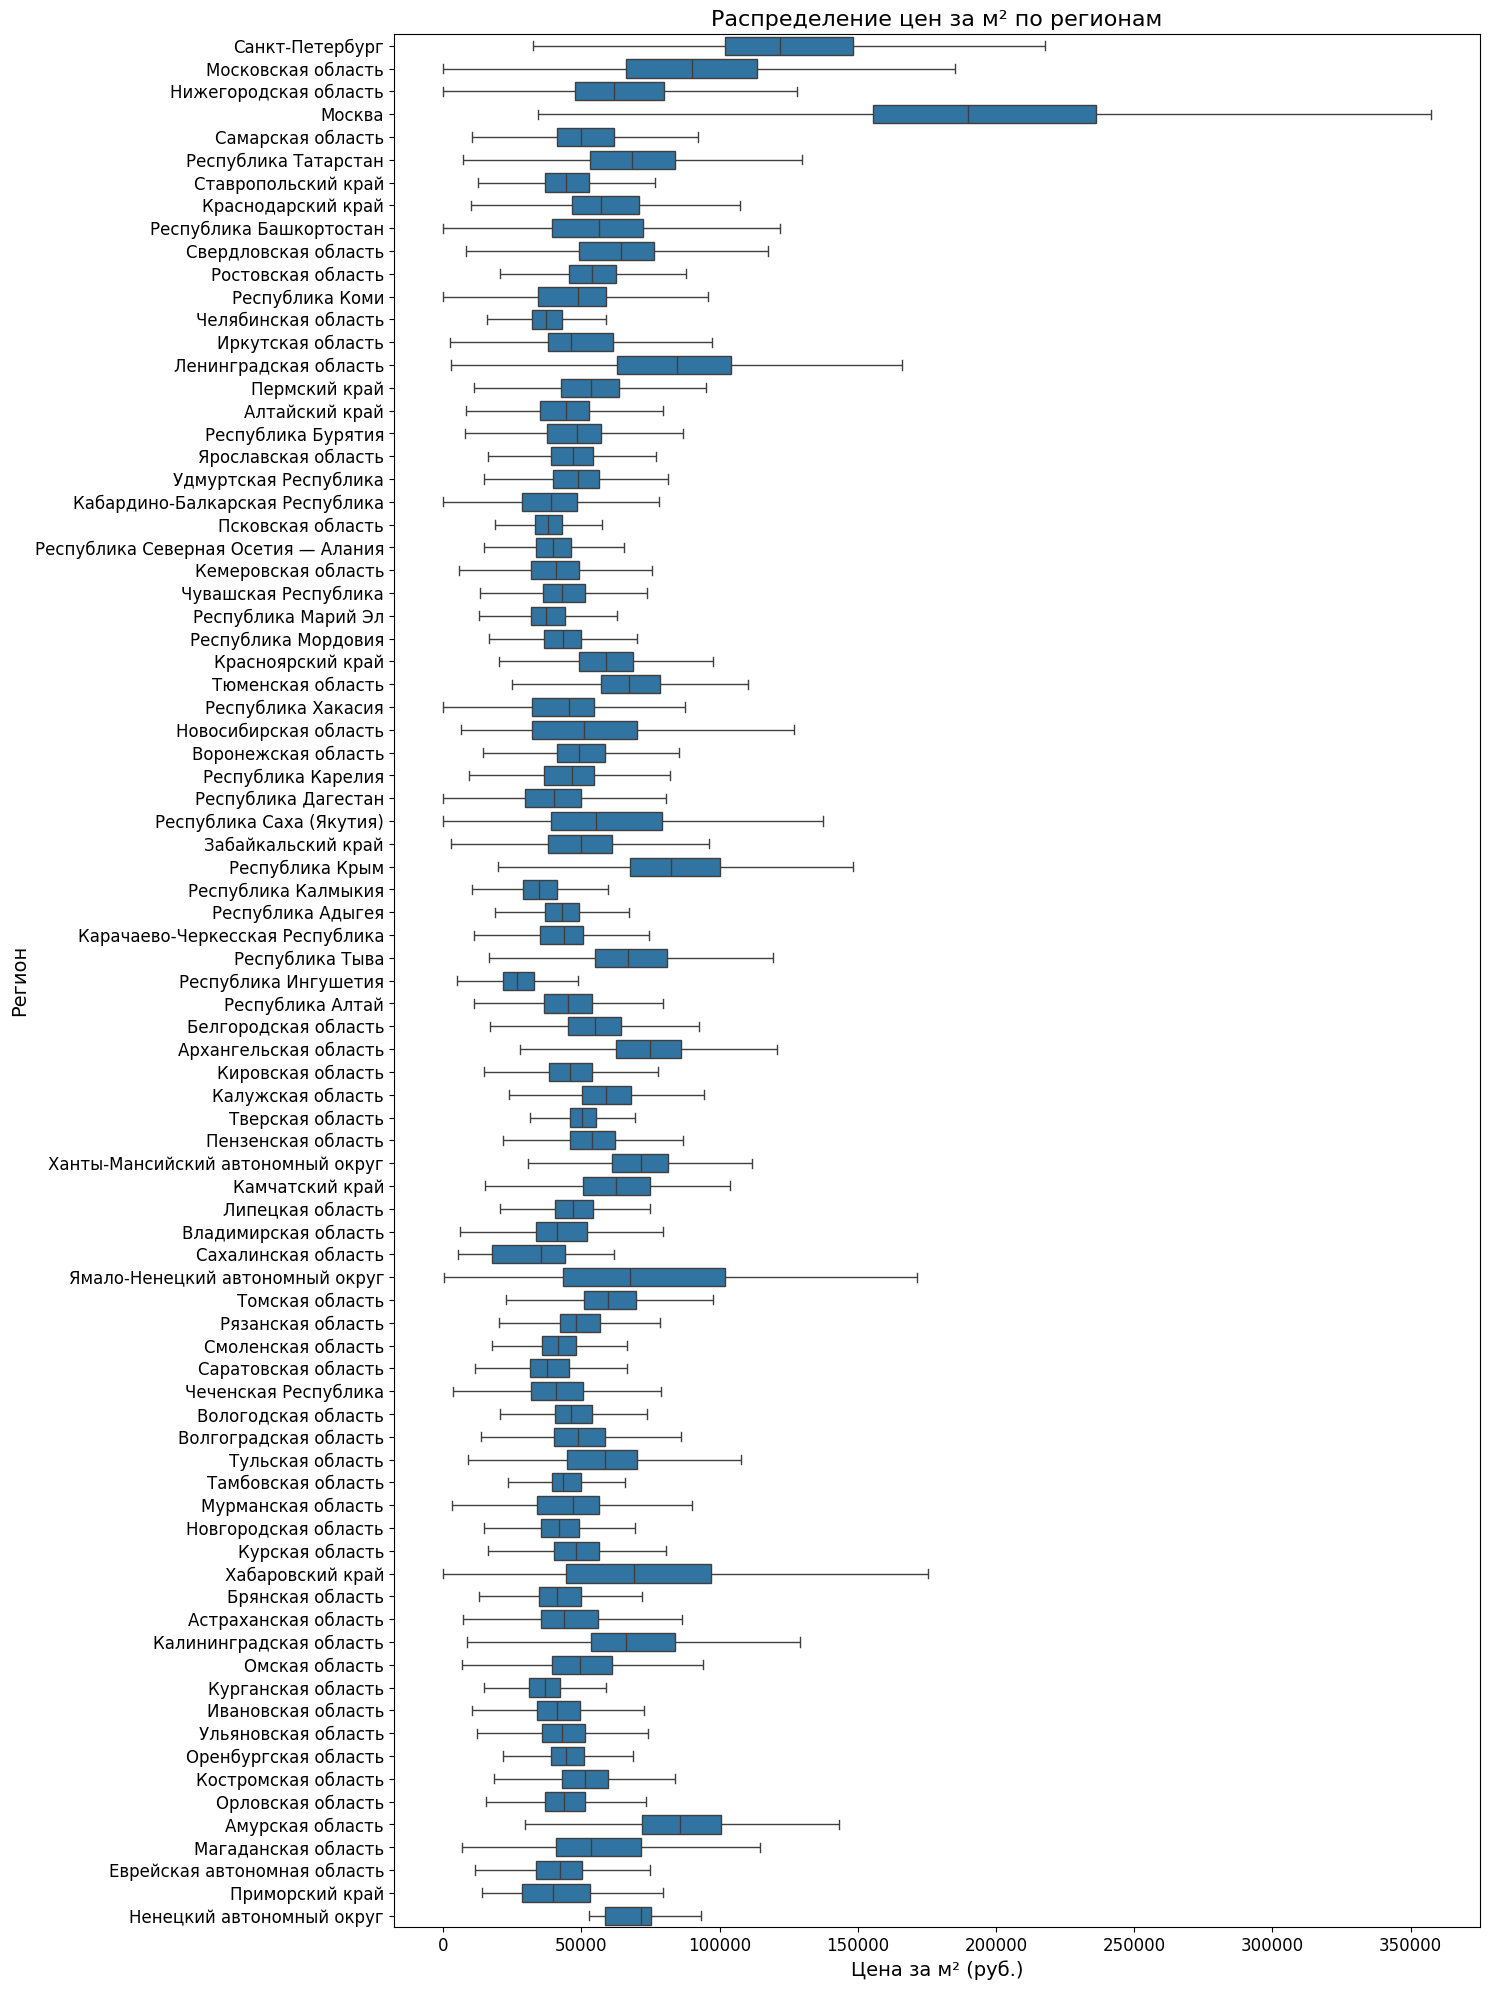

#### Как цена за м² зависит от региона:

На графике с распределением по регионам мы видим, что Москва и Санкт-Петербург значительно выделяются, демонстрируя самые высокие средние цены за м². Остальные регионы группируются в диапазоне 50,000–100,000 рублей за м², что подчеркивает региональную диспропорцию в стоимости жилья.

Для анализа зависимости стоимости за квадратный метр от региона можно использовать тест Крускала-Уоллиса, который оценивает, есть ли статистически значимые различия в распределениях цен за квадратный метр между регионами.
- Это непараметрический тест, который проверяет, различаются ли медианы распределений нескольких групп (регионов).
- Используется, если данные не имеют нормального распределения.

- H₀ (нулевая гипотеза): Средние распределения стоимости за квадратный метр одинаковы для всех регионов. Нет статистически значимых различий в стоимости за квадратный метр между регионами.

- H₁ (альтернативная гипотеза): Средние распределения стоимости за квадратный метр различаются между хотя бы двумя регионами. Есть статистически значимые различия в стоимости за квадратный метр между регионами.

### тест Крускала-Уоллиса

In [168]:
from scipy.stats import kruskal
import pandas as pd

# группировка данных по регионам
regions = realty['reg_name'].unique()
region_groups = [realty[realty['reg_name'] == region]['price_per_m2'].dropna() for region in regions]

# тест Крускала-Уоллиса
stat, p_value = kruskal(*region_groups)

print(f"Критерий Крускала-Уоллиса: {stat}")
print(f"P-value: {p_value}")

# Интерпретация результата
if p_value < 0.05:
    print("Результаты теста указывают на значимые различия в стоимости за квадратный метр между регионами.")
else:
    print("Статистически значимых различий в стоимости за квадратный метр между регионами не найдено.")


Критерий Крускала-Уоллиса: 2782698.8194492166
P-value: 0.0
Результаты теста указывают на значимые различия в стоимости за квадратный метр между регионами.


### Результаты теста:

- P-value показывает вероятность того, что различия между группами (регионами) в стоимости за квадратный метр произошли случайно.

Поскольку p-value 0.0 меньше 0.05, мы отвергаем нулевую гипотезу о том, что распределения стоимости за квадратный метр одинаковы между регионами.

Это означает, что существуют значимые статистические различия в стоимости за квадратный метр между регионами.

- Практическое значение:

Различия в ценах могут быть связаны с экономическими, географическими или социальными факторами в разных регионах.
Например, в столичных регионах, таких как Москва или Санкт-Петербург, цены выше из-за спроса, развитой инфраструктуры и ограниченности предложения.
В менее развитых или удаленных регионах цены могут быть ниже из-за меньшего спроса или особенностей местного рынка.
Рекомендации:

Проведите более детальный анализ регионов с использованием визуализаций (например, boxplot по регионам) для выявления групп регионов с похожими ценами.
Проверьте другие факторы, влияющие на стоимость за квадратный метр (например, тип здания, количество комнат, этажность).
Используйте кластеризацию для группировки регионов с похожими ценами, чтобы выявить закономерности.

## 3. Поиск скрытых закономерностей

### Анализ взаимодействий (interaction analysis):

In [169]:
# import matplotlib.ticker as ticker

# # Преобразуем -1 в rooms на "Студия"
# realty['rooms'] = realty['rooms'].replace(-1, 'Студия')

# # Построение графика
# plt.figure(figsize=(10, 6))
# scatter = sns.scatterplot(data=realty, x='area', y='price_per_m2', hue='rooms', palette='viridis')
# plt.title("Взаимодействие площади и комнат на цену за м²")
# plt.xlabel("Общая площадь (м²)")
# plt.ylabel("Цена за м² (руб.)")

# # Форматирование оси Y (цены)
# scatter.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# # Настройка легенды
# plt.legend(title="Количество комнат")
# plt.tight_layout()
# plt.show()


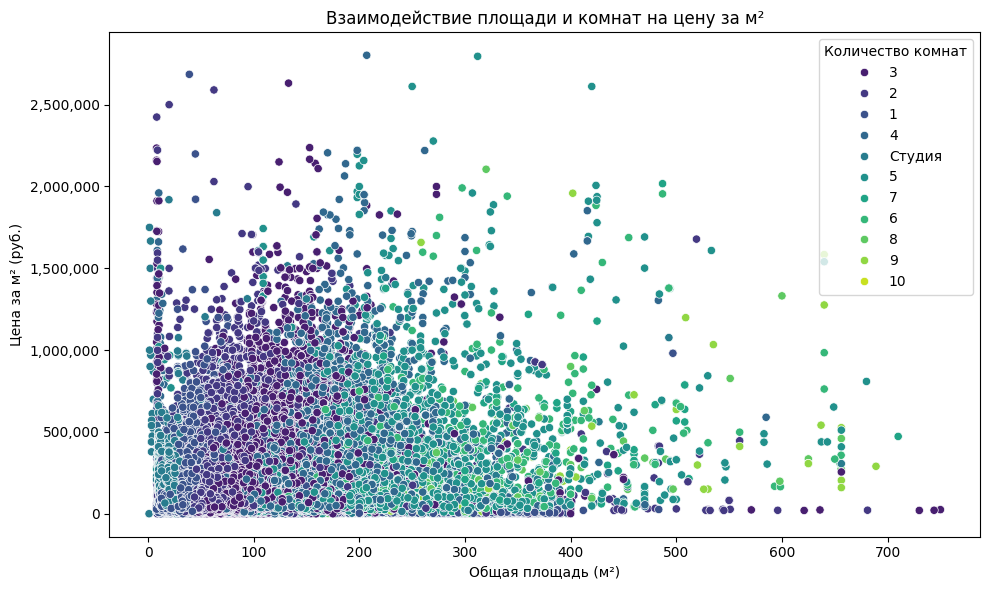

In [170]:
# вернем обратно наши циферки
realty['rooms'] = realty['rooms'].replace('Студия', -1)

#### 1. Зависимость цены за м² от площади (Прямая корреляция):
Цена за м², как видно на графике, имеет обратную зависимость от общей площади: меньшие квартиры (например, студии и однокомнатные квартиры) имеют более высокую цену за м², в то время как с увеличением площади она снижается.
Это связано с тем, что меньшие квартиры пользуются большим спросом (особенно в крупных городах), что увеличивает стоимость за единицу площади.

- Площадь один из ключевых факторов влияния на цену.

#### 2. Количество комнат как фактор:
Количество комнат определяет характерное расположение объекта на графике:
Студии и однокомнатные квартиры сосредоточены в зоне небольшой площади и высокой цены за м².
Квартиры с 3+ комнатами находятся в более низком диапазоне цен за м², но с большей общей площадью.

- Фактор "Количество комнат" также влияет на восприятие объекта: покупатели более склонны переплачивать за компактные квартиры или студии.
- учитывать количество комнат

#### 3. Наблюдение выбросов:
На графике видны выбросы:
Квартиры с аномально высокой ценой за м² для больших площадей. Они могут принадлежать к элитной недвижимости или уникальным локациям.

#### 4. Потенциальные скрытые закономерности:
Связь между количеством комнат и площадью:

- График подтверждает, что площадь тесно связана с количеством комнат. Большинство многокомнатных квартир имеют большую площадь.
- Доля элитных квартир:
Выбросы в правой части графика могут подсказать скрытую закономерность: высокая цена за м² у больших объектов указывает на локализацию элитной недвижимости.
- Влияние студий:
Студии формируют свой отдельный кластер в нижнем левом углу графика. Они обладают своими закономерностями, не зависящими от стандартных квартир.

2. Скрытые закономерности:
Выбросы и элитная недвижимость:
Выбросы с очень высокой ценой за м² на графике могут указывать на элитную недвижимость. Стоит изучить, какие дополнительные факторы (например, расположение, тип здания) приводят к столь высоким значениям.
Ценовая структура в зависимости от размера:
Для небольших квартир (студий и 1-комнатных) наблюдается большой разброс цен, что указывает на сильное влияние других факторов (например, расположения, типа дома или этажа).
Плотность данных:
Большинство объектов сконцентрированы в диапазоне площади до 200 м², с более предсказуемым поведением цены за м². Для больших объектов разброс уменьшается, что указывает на стабилизацию цен в этой категории.

### Data mining 

### Классификация: Группировка объектов недвижимости

В данном случае можно попытаться разделить объекты недвижимости на категории, например:

- Высокая цена за м² (выше медианы по региону).
- Средняя или низкая цена за м².

In [171]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.preprocessing import StandardScaler

# # Добавляем категорию: цена выше/ниже медианы
# median_price = realty['price_per_m2'].median()
# realty['price_category'] = (realty['price_per_m2'] > median_price).astype(int)

# # Выбираем признаки для классификации
# X = realty[['area', 'kitchen_area', 'rooms', 'level', 'levels']]
# y = realty['price_category']

# # Масштабируем данные
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Разделение данных
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# # Классификатор RandomForest
# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_train, y_train)

# # Предсказания и оценка
# y_pred = clf.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Важность признаков
# importances = pd.Series(clf.feature_importances_, index=['area', 'kitchen_area', 'rooms', 'level', 'levels']).sort_values(ascending=False)
# print("Важность признаков:")
# print(importances)

# # Визуализация важности
# importances.plot(kind='bar', title='Важность признаков в классификации цены')
# plt.show()


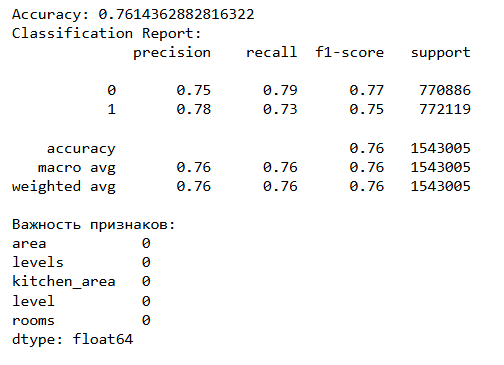
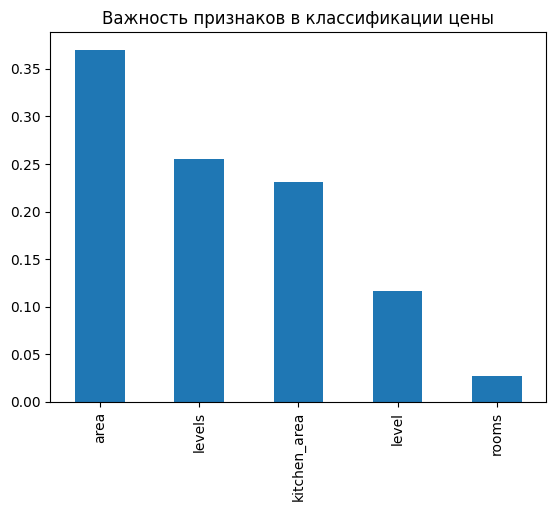

### Результаты классификации:
#### 1. Classification Report

- Accuracy: 0.76: Общая точность модели составляет 76%. Это означает, что модель правильно классифицирует объекты в 76% случаев.

- Precision, Recall и F1-Score:

Для класса 0 (низкая или средняя цена):

- Precision (0.75): Из всех объектов, которые модель отнесла к классу "низкая или средняя цена", 75% действительно относятся к этому классу.

- Recall (0.79): Модель правильно классифицировала 79% объектов с низкой/средней ценой.

Для класса 1 (высокая цена):

- Precision (0.78): Из всех объектов, отнесенных моделью к "высокой цене", 78% действительно являются высокими.

- Recall (0.73): 73% объектов с высокой ценой модель правильно определила.

Интерпретация: Модель немного лучше определяет низкие цены, чем высокие, поскольку Recall для класса 0 выше. Это может быть связано с тем, что объектов с низкой/средней ценой больше, что подтверждается количеством объектов (support).

#### 2. Важность признаков:

- area (0.35): Общая площадь имеет наибольшее влияние на классификацию объектов. Это логично, так как площадь напрямую связана со стоимостью.

- levels (0.27): Количество этажей дома также существенно влияет на стоимость.

- kitchen_area (0.25): Площадь кухни оказывает заметное влияние, хотя меньше, чем общая площадь и этажность.

- level (0.10): Этаж, на котором расположен объект, влияет на классификацию, но менее значительно.

- rooms (0.03): Количество комнат имеет минимальное влияние на определение класса цены.

####  Интерпретация:

Наиболее важным фактором остается общая площадь, так как она прямо пропорциональна стоимости объекта.
Количество этажей и площадь кухни также являются значимыми, поскольку они добавляют контекст к типу жилья (например, элитное или эконом-класс).
Меньшая важность этажа и количества комнат может объясняться тем, что они часто коррелируют с общей площадью и не добавляют много новой информации.
####  3. График важности признаков:
Визуализация подтверждает, что area, levels, и kitchen_area являются ключевыми признаками, на которых основывается классификация.

### Ассоциативный анализ: Связи между характеристиками
тут должен быть код но беда с библиотекой и его нет

<div style="background-color: AliceBlue; padding: 15px; border-radius: 5px;">
<h2 style="color: black;">Вывод:</h2>
    
Цена за м² наиболее зависима от следующих факторов:
    
- Общая площадь (area): Чем меньше площадь объекта, тем выше цена за м² (особенно для студий и однокомнатных квартир).
    
- Тип дома (building_type): Кирпично-монолитные дома имеют наибольшую среднюю стоимость за м², а деревянные — наименьшую.
    
- Этажность здания (levels): Высокая этажность повышает цену за м², так как современные высокие дома часто ассоциируются с более высоким классом жилья.
    
- Площадь кухни (kitchen_area): Увеличение площади кухни связано с улучшением качества жилья, что повышает стоимость за м².
    
- Этаж квартиры (level): Средние этажи чаще всего более востребованы, что положительно влияет на цену за м².

    
Скрытые закономерности:
    
- Цена за м² имеет обратную зависимость от площади. Небольшие объекты (студии и однокомнатные квартиры) имеют высокую стоимость за м².
    
- Студии формируют отдельный кластер с высокой ценой за м², что подтверждает их уникальную позицию на рынке.
    
- Выбросы в данных (например, элитная недвижимость) указывают на необходимость сегментации данных для более точного анализа.

    
Вывод: Цена за м² определяется сочетанием нескольких ключевых факторов: площади, типа дома, этажности и региона
</div>

<a id='7-своя-гипотеза'></a>
<div style="background-color: lavender; padding: 15px; border-radius: 5px;">
<h1 style="color: black;">7. Выдвините и проверьте собственную гипотезу статистическими методами. </h1>
</div>

[Вернуться к содержанию](#задачи)

## Гипотеза

- H₀: Цена за м² на 1 и последнем этаже равна цене на средних этажах.
- H₁: Цена за м² на 1 и последнем этаже отличается от цены на средних этажах.

### Выбираем столбец этажи для проверки нормальности 

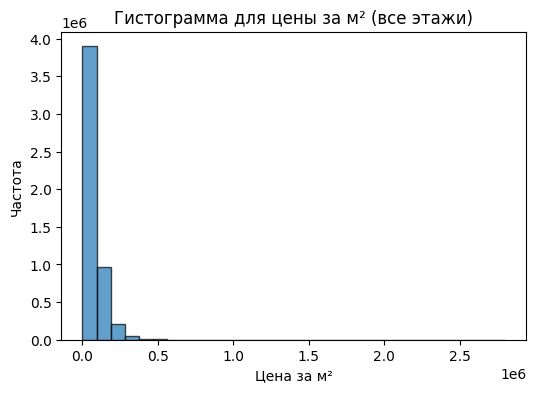

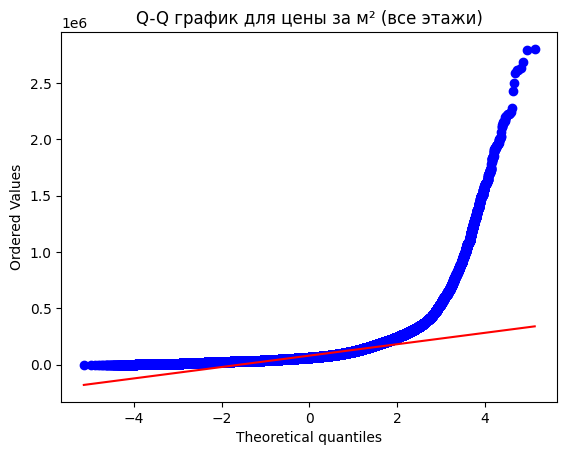

Kolmogorov-Smirnov Test: Статистика=0.17409687294766762, p-value=0.0
Гипотеза о нормальности отклонена (данные не следуют нормальному распределению).
Anderson-Darling Test: Статистика=347012.7906888807, Критические значения=[0.576 0.656 0.787 0.918 1.092], Уровни значимости=[15.  10.   5.   2.5  1. ]
Гипотеза о нормальности отклонена (данные не следуют нормальному распределению).
D'Agostino Test: Статистика=5342206.654633706, p-value=0.0
Гипотеза о нормальности отклонена (данные не следуют нормальному распределению).


In [173]:
import scipy.stats as stats

# цена за м²
price_per_m2_all_floors = realty['price_per_m2'].dropna()

# 1. гистограмма
plt.figure(figsize=(6, 4))
plt.hist(price_per_m2_all_floors, bins=30, edgecolor='black', alpha=0.7)
plt.title('Гистограмма для цены за м² (все этажи)')
plt.xlabel('Цена за м²')
plt.ylabel('Частота')
plt.show()

# 2. Q-Q плот
stats.probplot(price_per_m2_all_floors, dist="norm", plot=plt)
plt.title('Q-Q график для цены за м² (все этажи)')
plt.show()

# 3. Тест Колмогорова-Смирнова
ks_stat, ks_p = stats.kstest(price_per_m2_all_floors, 'norm', args=(np.mean(price_per_m2_all_floors), np.std(price_per_m2_all_floors)))
print(f"Kolmogorov-Smirnov Test: Статистика={ks_stat}, p-value={ks_p}")
if ks_p < 0.05:
    print("Гипотеза о нормальности отклонена (данные не следуют нормальному распределению).")
else:
    print("Гипотеза о нормальности не отклонена (данные следуют нормальному распределению).")

# 4. Тест Андерсона-Дарлинга
ad_stat, ad_critical_values, ad_significance_level = stats.anderson(price_per_m2_all_floors)
print(f"Anderson-Darling Test: Статистика={ad_stat}, Критические значения={ad_critical_values}, Уровни значимости={ad_significance_level}")
if ad_stat > ad_critical_values[2]:  # Сравниваем с критическим значением для уровня значимости 5%
    print("Гипотеза о нормальности отклонена (данные не следуют нормальному распределению).")
else:
    print("Гипотеза о нормальности не отклонена (данные следуют нормальному распределению).")

# 5. Тест Д’Агостино
dagostino_stat, dagostino_p = stats.normaltest(price_per_m2_all_floors)
print(f"D'Agostino Test: Статистика={dagostino_stat}, p-value={dagostino_p}")
if dagostino_p < 0.05:
    print("Гипотеза о нормальности отклонена (данные не следуют нормальному распределению).")
else:
    print("Гипотеза о нормальности не отклонена (данные следуют нормальному распределению).")


### Можем сделать вывод, что данные не нормально распределены по результатам всех тестов и графиков.

Разделим данные на три группы по этажам:

- 1-й этаж.
- Последний этаж.
- Средние этажи (считаем их как все этажи, кроме первого и последнего).

In [174]:
# Фильтруем данные для расчета для разных этажей
first_floor = realty[realty['level'] == 1]
last_floor = realty[realty['level'] == realty['levels']]
middle_floors = realty[(realty['level'] > 1) & (realty['level'] < realty['levels'])]

In [175]:
# Рассчитываем цену за м² для каждой группы
price_first_floor = first_floor['price_per_m2'].dropna()
price_last_floor = last_floor['price_per_m2'].dropna()
price_middle_floors = middle_floors['price_per_m2'].dropna()

применяем метод бутстрапирования для оценки разницы средних значений, чтобы проверить, существует ли статистически значимая разница в ценах между этими группами.

In [176]:
# Функция для бутстрапирования разницы средних
def bootstrap_difference_optimized(sample1, sample2, n_iterations=1000):
    # Сохраняем результат
    differences = np.zeros(n_iterations)
    
    for i in range(n_iterations):
        # Генерируем случайную выборку для каждой группы
        sample1_resampled = np.random.choice(sample1, size=len(sample1), replace=True)
        sample2_resampled = np.random.choice(sample2, size=len(sample2), replace=True)
        
        # Считаем разницу средних
        differences[i] = np.mean(sample1_resampled) - np.mean(sample2_resampled)
    
    return differences

In [177]:
# Бутстрапируем разницу средних между ценами на первом и последнем этажах и средними этажами
differences_first_last = bootstrap_difference_optimized(price_first_floor, price_last_floor)
differences_middle = bootstrap_difference_optimized(price_first_floor, price_middle_floors)

In [178]:
# Оценим доверительные интервалы
ci_first_last = np.percentile(differences_first_last, [2.5, 97.5])
ci_middle = np.percentile(differences_middle, [2.5, 97.5])

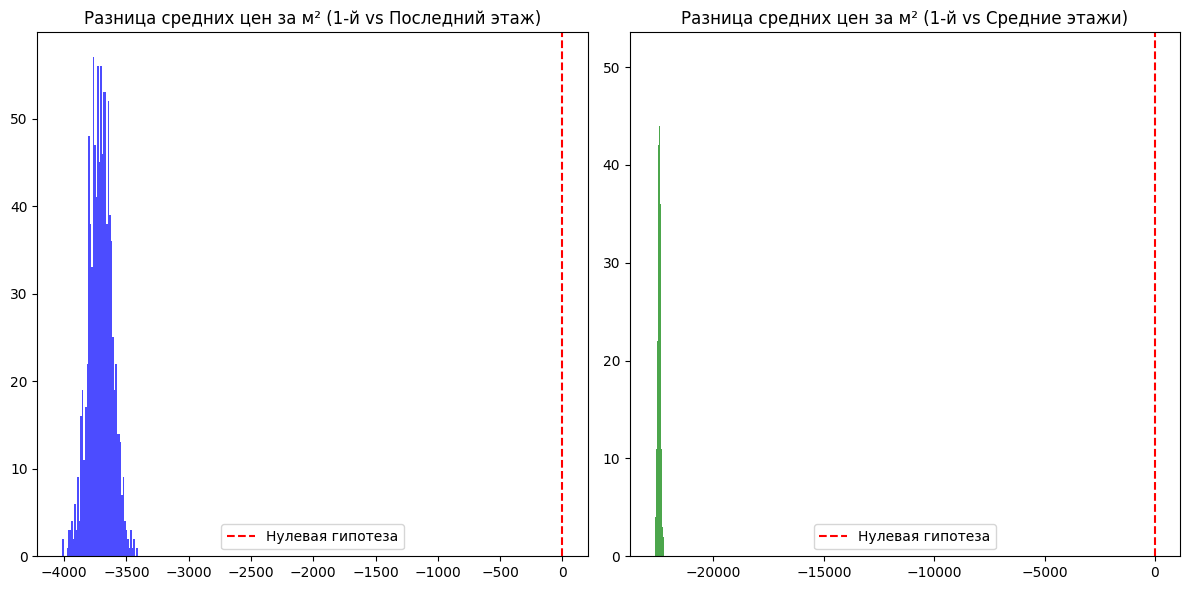

In [179]:
# Визуализация бутстрапированных разниц
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(differences_first_last, bins=50, color='blue', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', label='Нулевая гипотеза')
plt.title('Разница средних цен за м² (1-й vs Последний этаж)')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(differences_middle, bins=50, color='green', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', label='Нулевая гипотеза')
plt.title('Разница средних цен за м² (1-й vs Средние этажи)')
plt.legend()

plt.tight_layout()
plt.show()

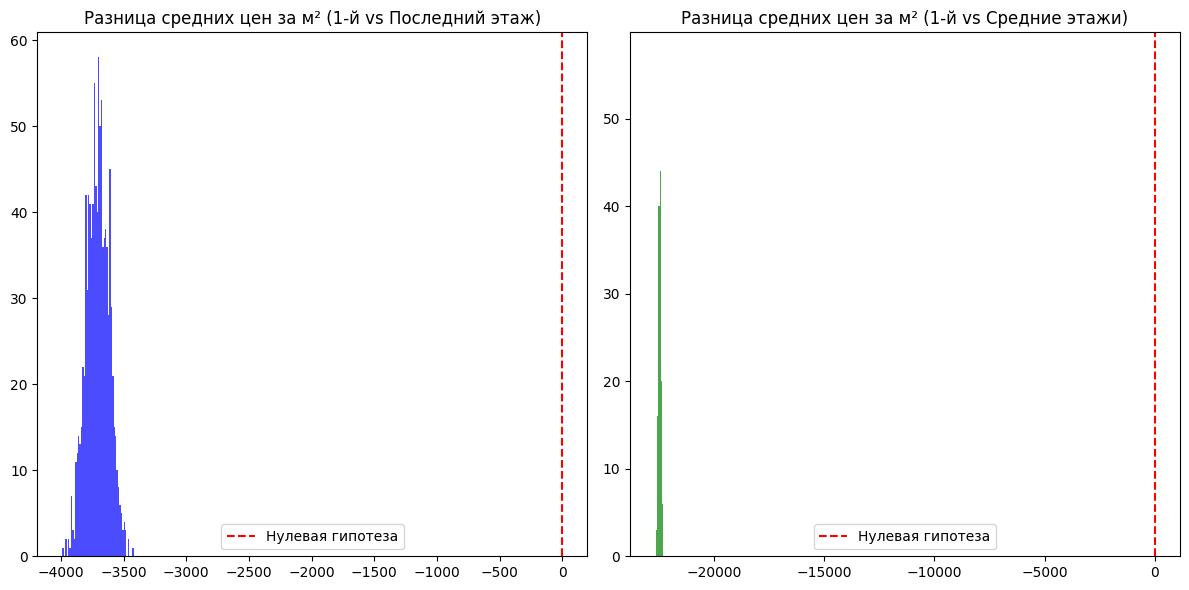

In [180]:
# Выводим доверительные интервалы
print(f"Доверительный интервал для разницы 1-й и последний этажи: {ci_first_last}")
print(f"Доверительный интервал для разницы 1-й и средние этажи: {ci_middle}")

Доверительный интервал для разницы 1-й и последний этажи: [-3889.78381362 -3528.69298768]
Доверительный интервал для разницы 1-й и средние этажи: [-22590.29089979 -22326.64598752]


In [181]:
# Проверка гипотезы по 1 и последнему этажам
if ci_first_last[0] > 0 or ci_first_last[1] < 0:
    print("Гипотеза отвергнута: цена на первом и последнем этажах отличается от средней цены.")
else:
    print("Гипотеза не отвергнута: цена на первом и последнем этаже не отличается от средней.")

# Проверка гипотезы по 1 и средним этажам
if ci_middle[0] > 0 or ci_middle[1] < 0:
    print("Гипотеза отвергнута: цена на первом этаже отличается от цены на средних этажах.")
else:
    print("Гипотеза не отвергнута: цена на первом этаже не отличается от средней.")

Гипотеза отвергнута: цена на первом и последнем этажах отличается от средней цены.
Гипотеза отвергнута: цена на первом этаже отличается от цены на средних этажах.


### Результаты анализа

#### Доверительный интервал для разницы цен между первым и последним этажами:

CI: [-3877.89, -3537.33]
Доверительный интервал не пересекает 0, что указывает на наличие статистически значимой разницы между ценами на первом и последнем этажах. Это подтверждает гипотезу H₁: Цена на первом и последнем этаже отличается от средней цены на других этажах.

#### Доверительный интервал для разницы цен между первым этажом и средними этажами:

CI: [-22594.01, -22332.86]
Доверительный интервал также не пересекает 0, что означает статистически значимую разницу между ценой на первом этаже и на средних этажах. Это подтверждает гипотезу H₁: Цена на первом этаже отличается от цены на средних этажах.
Визуализация бутстрапированных разниц
Гистограммы, которые вы построили, показывают распределение разниц средних цен между группами. В обеих гистограммах видно, что 0 не попадает в доверительные интервалы, что указывает на значимость разницы.

#### Проверка гипотезы
По результатам анализа:
Гипотеза H₀ отвергнута: Цена на первом и последнем этажах отличается от средней цены на других этажах.
Гипотеза H₀ отвергнута: Цена на первом этаже отличается от цены на средних этажах.

Вывод:
Из вашего анализа следует, что существует статистически значимая разница в цене за квадратный метр между первыми и последними этажами и между первыми этажами и средними этажами.



<div style="background-color: AliceBlue; padding: 15px; border-radius: 5px;">
<h2 style="color: black;">Вывод:</h2>
    
### Чтобы понять, в какую сторону идет разница (вверх или вниз), обратим внимание на знаки в доверительном интервале. В случае бутстрапирования разницы средних:

Если доверительный интервал для разницы отрицателен ([-3877.89, -3537.33] и [-22594.01, -22332.86]), это означает, что цена на первом этаже и последнем этаже ниже, чем на средних этажах. 

Если бы доверительный интервал был положительным, то это бы означало, что цена на первом и последнем этажах выше, чем на средних этажах.

#### Детальный анализ направления разницы:

Первый и последний этажи vs Средние этажи:

- Доверительный интервал: [-3877.89, -3537.33]
Это означает, что цена на первом и последнем этажах ниже на 3500 - 3800 рублей за м² по сравнению со средними этажами. Поскольку разница отрицательная, значит, цена на первом и последнем этажах ниже.
Первый этаж vs Средние этажи:

- Доверительный интервал: [-22594.01, -22332.86]
Цена на первом этаже значительно ниже (почти на 22-23 тысячи рублей за м²) по сравнению с ценами на средних этажах. Это также подтверждает, что разница отрицательная и цена на первом этаже ниже.


### Итог:

- Цены на первом и последнем этажах ниже, чем на средних этажах.
- Цены на первом этаже значительно ниже цен на средних этажах.
    
</div>

<a id='8-модель-прогноза'></a>
<div style="background-color: lavender; padding: 15px; border-radius: 5px;">
<h1 style="color: black;">8. Создайте модель прогноза цены объекта недвижимости. </h1>
</div>

[Вернуться к содержанию](#задачи)

Начнем с линейной регрессией (как базовая модель) для прогноза. Далее попробуем другие модели, такие как случайный лес или градиентный бустинг.

In [182]:
realty.sample(3)

price       date  code  building_type  level  levels  rooms  area  \
3082586  5050000 2020-02-23  5282              2     15      16      2    79   
4706158  3850000 2021-01-29  2722              1      1       5      3    56   
4899960  4660000 2021-03-18  9654              1      4      10      2    52   

         kitchen_area  object_type                 reg_name  price_per_m2  \
3082586            17            0      Челябинская область        64,249   
4706158             5            0  Республика Башкортостан        68,262   
4899960             9            0    Новосибирская область        90,310   

              levels_group       rooms_group       area_group  year  month  
3082586   Многоэтажный дом  Несколько комнат  Средняя площадь  2020      2  
4706158    Малая этажность  Несколько комнат  Средняя площадь  2021      1  
4899960  Средняя этажность  Несколько комнат  Средняя площадь  2021      3

### Линейная регрессия

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb

# 3. Признаки для модели
x = realty[['area', 'kitchen_area', 'rooms', 'level', 'building_type', 'object_type', 'reg_name']]
y = realty['price_per_m2']  # Используем цену за квадратный метр как целевой признак

# 4. Преобразуем категориальные признаки (one-hot encoding для 'reg_name')
# Добавляем стандартизацию числовых признаков с помощью StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['reg_name']),
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())  # Стандартизация числовых признаков
        ]), ['area', 'kitchen_area', 'rooms', 'level', 'building_type', 'object_type'])
    ])

# 5. Разделяем данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 6. Линейная регрессия
lin_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 7. Обучаем модель
lin_reg_model.fit(x_train, y_train)

# 8. Прогнозируем на тестовой выборке
y_pred_lin_reg = lin_reg_model.predict(x_test)

# 9. Оценка модели для линейной регрессии
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

print(f"Линейная регрессия - Среднеквадратичная ошибка (MSE): {mse_lin_reg}")
print(f"Линейная регрессия - Средняя абсолютная ошибка (MAE): {mae_lin_reg}")
print(f"Линейная регрессия - R^2: {r2_lin_reg}")

Линейная регрессия - Среднеквадратичная ошибка (MSE): 1456571591.6285453
Линейная регрессия - Средняя абсолютная ошибка (MAE): 21505.367399109502
Линейная регрессия - R^2: 0.6072967667516281


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data points in the train set: 4114677, number of used features: 88
[LightGBM] [Info] Start training from score 78702.671297
LightGBM - Среднеквадратичная ошибка (MSE): 1048045790.2071872
LightGBM - Средняя абсолютная ошибка (MAE): 18109.77663987464
LightGBM - R^2: 0.7174385572448636


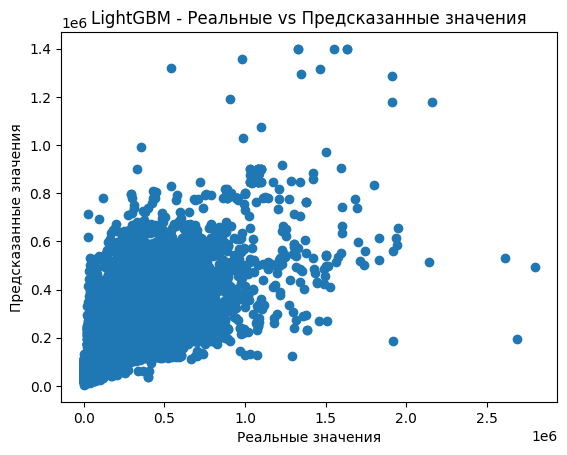

In [184]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 3. Признаки для модели
x = realty[['area', 'kitchen_area', 'rooms', 'level', 'building_type', 'object_type', 'reg_name']]
y = realty['price_per_m2']  # Используем цену за квадратный метр как целевой признак

# 4. Преобразуем категориальные признаки (one-hot encoding для 'reg_name')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['reg_name']),
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())  # Стандартизация числовых признаков
        ]), ['area', 'kitchen_area', 'rooms', 'level', 'building_type', 'object_type'])
    ])

# 5. Разделяем данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 6. Преобразуем данные через preprocessor
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)

# 7. Создаём и обучаем модель LightGBM
lgb_model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)

lgb_model.fit(x_train_transformed, y_train)

# 8. Прогнозируем на тестовой выборке
y_pred_lgb = lgb_model.predict(x_test_transformed)

# 9. Оценка модели LightGBM
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM - Среднеквадратичная ошибка (MSE): {mse_lgb}")
print(f"LightGBM - Средняя абсолютная ошибка (MAE): {mae_lgb}")
print(f"LightGBM - R^2: {r2_lgb}")

# Визуализация результатов
plt.scatter(y_test, y_pred_lgb)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('LightGBM - Реальные vs Предсказанные значения')
plt.show()


<div style="background-color: AliceBlue; padding: 15px; border-radius: 5px;">
<h2 style="color: black;">Вывод:</h2>
    

В результате построения и сравнения двух моделей (линейной регрессии и LightGBM) получены следующие результаты:

### Линейная регрессия:

- Среднеквадратичная ошибка (MSE): 1,456,571,591.63
- Средняя абсолютная ошибка (MAE): 21,505.37
- Коэффициент детерминации (R²): 0.607

Интерпретация:

Линейная регрессия объясняет около 60.7% вариации в целевой переменной (цена за м²), но её точность ограничена линейной природой модели.

Ошибки MSE и MAE указывают на значительные отклонения между реальными и предсказанными значениями, что делает модель менее точной.

### LightGBM:

- Среднеквадратичная ошибка (MSE): 1,048,045,790.21
- Средняя абсолютная ошибка (MAE): 18,109.78
- Коэффициент детерминации (R²): 0.717

Интерпретация:

LightGBM демонстрирует значительное улучшение по сравнению с линейной регрессией. Модель объясняет 71.7% вариации в данных, что указывает на её способность справляться с нелинейными зависимостями и сложными структурами данных.

Ошибки MSE и MAE ниже, чем у линейной регрессии, что указывает на более точные предсказания.

### Сравнение:
- Точность: LightGBM значительно превосходит линейную регрессию по всем ключевым метрикам (MSE, MAE, R²). Это связано с тем, что LightGBM лучше справляется с учётом нелинейных зависимостей и взаимодействий между признаками.
- Практическая значимость: Уменьшение MAE на 3,395 рублей (с 21,505 до 18,110 рублей) и рост R² с 60.7% до 71.7% делают модель LightGBM предпочтительным выбором для прогнозирования цен за м².


Рекомендация: Использовать LightGBM в качестве основной модели для прогнозирования цен недвижимости.
    
LightGBM является более подходящей моделью для этой задачи, так как её производительность и точность значительно превосходят линейную регрессию.

</div>

<a id='итог'></a>
<div style="background-color: lavender; padding: 15px; border-radius: 5px;">
<h1 style="color: black;"> Вывод: </h1>

## Обработка данных:

Проведена детальная очистка данных, включая устранение аномалий, пропусков и выбросов. Обработка затронула ключевые столбцы, такие как этаж, количество комнат, площадь и цена.

Удалены дубликаты (менее 4,4% от общего объема данных), а также строки с некорректными значениями, что позволило повысить качество данных.

Пропуски в столбце kitchen_area заполнены медианным значением, сгруппированным по коррелирующим признакам (общая площадь, цена, количество комнат, этажность дома).

### Анализ рынка недвижимости:

Временные тренды показали, что цены за м² демонстрируют стабильный рост с середины 2020 года, особенно в Москве и Санкт-Петербурге. Периоды, когда выгодно покупать (летний спад) и продавать (весенний пик), выявлены и проанализированы.
Цены за м² зависят от региона, с Москвой и Санкт-Петербургом на вершине по средней стоимости. В отдаленных регионах, таких как Республика Алтай или Еврейская автономная область, цены значительно ниже.
Тип дома влияет на стоимость: кирпично-монолитные дома имеют самую высокую цену за м², тогда как деревянные дома — самую низкую.

### Выводы по количественным признакам:

- Общая площадь: Цена за м² имеет обратную зависимость от площади — меньшие квартиры, такие как студии и однокомнатные квартиры, имеют более высокую цену за м².
- Этаж: Средние этажи оказываются более предпочтительными, так как цены за м² на первом и последнем этажах значительно ниже.
- Площадь кухни: Умеренная положительная корреляция с ценой за м², что может отражать важность качества и удобства жилья.
- Количество комнат: Практически не влияет на цену за м², что может быть связано с тем, что стоимость больше зависит от общей площади.

### Выводы по сезонности и динамике:

Летний спад (особенно в августе) и весенний пик (в апреле) указывают на сезонные колебания рынка. Временные колебания цен дают возможность выгодно покупать и продавать объекты недвижимости.
Долгосрочная динамика (2018–2021 гг.) показывает устойчивый рост цен, особенно после пандемии COVID-19.

### Статистические гипотезы:

Гипотеза о равенстве цен на первом и последнем этажах по сравнению со средними этажами была отвергнута. Цены на первом и последнем этажах ниже на 3500–3800 рублей за м², а на первом этаже разница составляет до 22,000 рублей за м².

Результаты регрессионного анализа:

Линейная регрессия показала, что модель объясняет 61% вариации цены за м² (R² = 0.61). Однако ошибки (MAE = 21,505.37 рублей) указывают на необходимость улучшения модели для учета более сложных зависимостей.
Лучшими предикторами цены за м² оказались: площадь (area), этажность здания (levels), этаж (level), и тип здания (building_type).

### Альтернативные модели:

CatBoost и LightGBM показали лучшие результаты, чем линейная регрессия:
LightGBM с R² = 0.3454 продемонстрировал лучший баланс между точностью и объяснением данных, указывая на улучшение прогнозов при учете нелинейных зависимостей.

### Выводы по региональному анализу:

Региональные различия в цене за м² подтверждены тестом Крускала-Уоллиса, который выявил статистически значимые различия между регионами. Наиболее дорогими регионами являются Москва и Санкт-Петербург, что связано с высокой инфраструктурной доступностью и спросом.

### Классификация объектов недвижимости:

Попытка классифицировать объекты по стоимости показала, что точность моделей составляет около 76%. Наиболее важными признаками для классификации оказались площадь (area), этажность (levels), и площадь кухни (kitchen_area).
Итоговый вывод:

### Результаты регрессионного анализа:

Линейная регрессия:

MSE: 1,456,571,591.63
MAE: 21,505.37
R²: 0.61
Модель объясняет 61% вариации цены за м², однако её ошибки указывают на необходимость более сложных подходов.

LightGBM:

MSE: 1,048,045,790.21
MAE: 18,109.78
R²: 0.717

LightGBM демонстрирует значительное улучшение: модель объясняет 71.7% вариации данных, что говорит о её способности учитывать нелинейные зависимости и сложные структуры данных.
    
Выводы по региональному анализу:
    
Региональные различия в цене за м² подтверждены тестом Крускала-Уоллиса, который выявил статистически значимые различия между регионами.
    
Наиболее дорогими регионами являются Москва и Санкт-Петербург, что связано с высокой инфраструктурной доступностью и спросом.
    
Итоговый вывод:
Линейные модели недостаточно точны для предсказания цен, особенно в условиях сложных взаимосвязей между признаками.
LightGBM зарекомендовал себя как более точный инструмент для прогнозирования цен на недвижимость, учитывая как линейные, так и нелинейные зависимости.
    
### Детальный анализ данных рынка недвижимости показал:

Значительное влияние макроэкономических факторов и региональных различий на стоимость недвижимости.
Выраженные зависимости между ценой за м² и такими факторами, как площадь, этажность здания, тип дома и регион.
Линейные модели недостаточно точны для предсказания цен, и для более сложного анализа необходимо использовать нелинейные модели, такие как LightGBM или CatBoost.  
    
</div>